<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">SHOE BRAND CAPSTONE PROJECT: EDA and Machine Learning </b>
 </div>

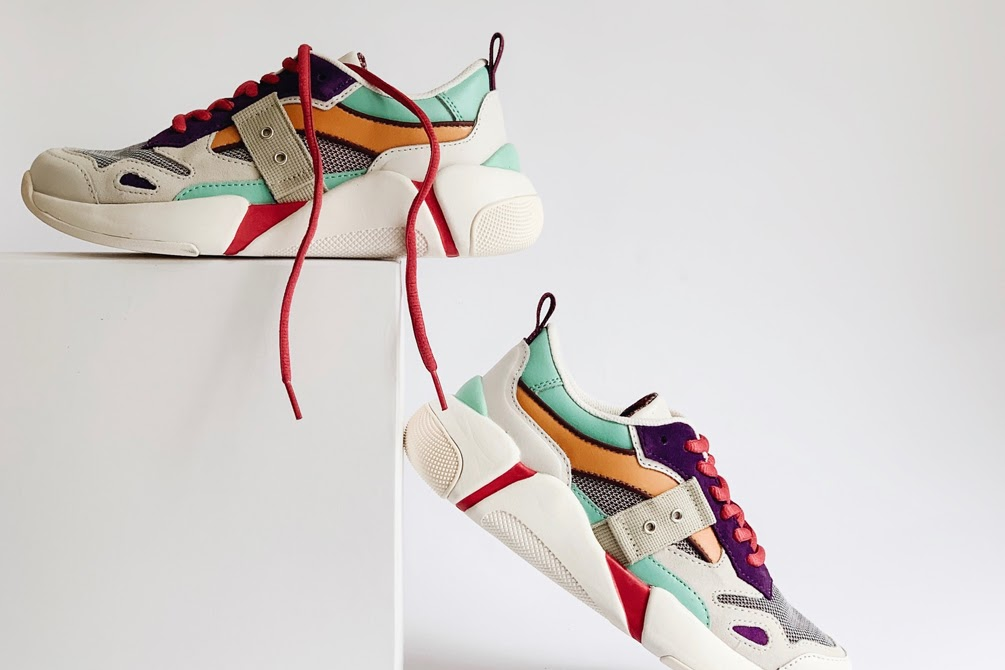

## **Project Description**


I have efficiently collected data from six major websites—Nike, Adidas, Puma, Skechers, Columbia, and Woodland. The corresponding SQL queries have been successfully executed. Subsequently, I have initiated on a machine learning project with the primary objective of conducting a thorough analysis of the collected data from these websites.

The project involves a detailed examination of various aspects, including product categories, pricing structures, distribution strategies, reviews distribution, marketing methods, customer sentiments, and the impact of different factors on customer satisfaction. This in-depth analysis aims to provide valuable insights for the ongoing machine learning project.







## **Procedure for Data Extraction and extracted Data Details**

I applied Python's Selenium and BeautifulSoup to retrieve data through direct scraping from the six websites. The program systematically navigated through the men's and women's shoe sections, capturing pertinent details along the way.

I have retrieved data including 'shoe_name', 'original_price', 'discounted_price', 'url', 'category', 'review_count', 'star', 'product_code', 'shoe_type', 'durability', 'comfort', 'size', 'size_count', 'color_count', 'brand', 'color_1', 'color_2', 'color_3', 'color_4', and 'color_5'.

**I obtained the 'shoe_type' data to enhance my understanding of market demand. Consequently, I will utilize the initially extracted dataset for more effective data analysis and further machine learning tasks.**


<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Bringing in Vital Libraries</b>
 </div>

In [180]:
# Data Manipulation
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations

# Data Visualization
import seaborn as sns  # Statistical Data Visualization
import matplotlib.pyplot as plt  # Plotting
# Jupyter Notebook Integration # Inline plotting in the notebook environment
%matplotlib inline

# Visualizing Missing Data
import missingno as msno  # Visualizing Missing Data

# Suppressing Warnings
import warnings  # Suppressing warnings
warnings.filterwarnings("ignore")  # Ignore warnings

# Data Preprocessing
from scipy.stats import zscore  # Z-Score transformation
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder, label_binarize  # Data preprocessing tools
from imblearn.over_sampling import SMOTE  # Over-sampling for imbalanced datasets


# Statistical Analysis
import scipy.stats as stats  # Statistical functions and tests
from statsmodels.stats.outliers_influence import variance_inflation_factor # Detect multicollinearity with VIF



# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV  # Model selection and evaluation tools
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, precision_recall_fscore_support,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
) # For model evaluation metrics

# Models
#classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier # Ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC   # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB
#Regressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




# Model Persistence - Save and load machine learning models
import joblib
from joblib import dump

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Fetching the Dataset</b>
 </div>

In [ ]:
df=pd.read_csv('final_shoe_details_dataset.csv')
df

shoe_name original_price  \
0      Deviate Nitro 2 Winterised women's Trail Runni...          9,599   
1                             Cilia Lux women's Sneakers          3,299   
2                            Fier Nitro women's Sneakers          4,799   
3                            Fier Nitro women's Sneakers          4,799   
4                 Cali Dream Brand Love women's Sneakers          4,499   
...                                                  ...            ...   
11028                                   FORUM BOLD SHOES      10 999.00   
11029                                         ADIZERO SL      11 999.00   
11030                                         ADIZERO SL      11 999.00   
11031                                     CONTEM X SHOES       3 999.00   
11032                                     CONTEM X SHOES       3 999.00   

      discounted_price                                                url  \
0               15,999  https://in.puma.com/in/en/pd/deviate-nitro-2-w...   
1                5,999  https://in.puma.com/in/en/pd/cilia-lux-womens-...   
2                7,999  https://in.puma.com/in/en/pd/fier-nitro-womens...   
3                7,999  https://in.puma.com/in/en/pd/fier-nitro-womens...   
4                8,999  https://in.puma.com/in/en/pd/cali-dream-brand-...   
...                ...                                                ...   
11028              NaN  https://www.adidas.co.in/forum-bold-shoes/IG02...   
11029         7 199.50    https://www.adidas.co.in/adizero-sl/ID6921.html   
11030         7 199.50    https://www.adidas.co.in/adizero-sl/ID6926.html   
11031         2 599.50  https://www.adidas.co.in/contem-x-shoes/IQ8887...   
11032         2 599.50  https://www.adidas.co.in/contem-x-shoes/IQ8888...   

      category review_count star product_code            shoe_type durability  \
0        women          NaN  NaN    376857_01  Trail Running Shoes        NaN   
1        women          NaN  NaN    370282_09             Sneakers        NaN   
2        women          NaN  NaN    389932_01             Sneakers        NaN   
3        women          NaN  NaN    389932_02             Sneakers        NaN   
4        women          NaN  NaN    394757_01             Sneakers        NaN   
...        ...          ...  ...          ...                  ...        ...   
11028    women           28  NaN       IG0285            Originals         85   
11029      men          492  NaN       ID6921              Running         86   
11030      men          492  NaN       ID6926              Running         86   
11031    women            3  NaN       IQ8887              Running         91   
11032    women            3  NaN       IQ8888              Running         91   

      comfort  size  size_count  color_count   brand  \
0         NaN   NaN         4.0            1    Puma   
1         NaN   NaN         1.0            1    Puma   
2         NaN   NaN         3.0            2    Puma   
3         NaN   NaN         2.0            2    Puma   
4         NaN   NaN         1.0            2    Puma   
...       ...   ...         ...          ...     ...   
11028      75  49.0         NaN            2  adidas   
11029      82  46.0         NaN            2  adidas   
11030      82  46.0         NaN            2  adidas   
11031      91  50.0         NaN            2  adidas   
11032      91  50.0         NaN            2  adidas   

                                                color_1  \
0                                                   NaN   
1                                                   NaN   
2                                            PUMA Black   
3                                            PUMA Black   
4                                   PUMA White-Hot Heat   
...                                                 ...   
11028             Off White / Wonder Clay / Wonder Blue   
11029  Arctic Night F23 / Cloud White / Wonder Blue F23   
11030  Arctic Night F23 / Cloud White / Wond

In [ ]:
df.head()

shoe_name original_price  \
0  Deviate Nitro 2 Winterised women's Trail Runni...          9,599   
1                         Cilia Lux women's Sneakers          3,299   
2                        Fier Nitro women's Sneakers          4,799   
3                        Fier Nitro women's Sneakers          4,799   
4             Cali Dream Brand Love women's Sneakers          4,499   

  discounted_price                                                url  \
0           15,999  https://in.puma.com/in/en/pd/deviate-nitro-2-w...   
1            5,999  https://in.puma.com/in/en/pd/cilia-lux-womens-...   
2            7,999  https://in.puma.com/in/en/pd/fier-nitro-womens...   
3            7,999  https://in.puma.com/in/en/pd/fier-nitro-womens...   
4            8,999  https://in.puma.com/in/en/pd/cali-dream-brand-...   

  category review_count star product_code            shoe_type durability  \
0    women          NaN  NaN    376857_01  Trail Running Shoes        NaN   
1    women          NaN  NaN    370282_09             Sneakers        NaN   
2    women          NaN  NaN    389932_01             Sneakers        NaN   
3    women          NaN  NaN    389932_02             Sneakers        NaN   
4    women          NaN  NaN    394757_01             Sneakers        NaN   

  comfort  size  size_count  color_count brand              color_1  \
0     NaN   NaN         4.0            1  Puma                  NaN   
1     NaN   NaN         1.0            1  Puma                  NaN   
2     NaN   NaN         3.0            2  Puma           PUMA Black   
3     NaN   NaN         2.0            2  Puma           PUMA Black   
4     NaN   NaN         1.0            2  Puma  PUMA White-Hot Heat   

                     color_2 color_3 color_4 color_5  
0                        NaN     NaN     NaN     NaN  
1                        NaN     NaN     NaN     NaN  
2                  Rose Dust     NaN     NaN     NaN  
3                  Rose Dust     NaN     NaN     NaN  
4  PUMA White-Peach Smoothie     NaN     NaN     NaN

In [ ]:
df.tail()

shoe_name original_price discounted_price  \
11028  FORUM BOLD SHOES      10 999.00              NaN   
11029        ADIZERO SL      11 999.00         7 199.50   
11030        ADIZERO SL      11 999.00         7 199.50   
11031    CONTEM X SHOES       3 999.00         2 599.50   
11032    CONTEM X SHOES       3 999.00         2 599.50   

                                                     url category  \
11028  https://www.adidas.co.in/forum-bold-shoes/IG02...    women   
11029    https://www.adidas.co.in/adizero-sl/ID6921.html      men   
11030    https://www.adidas.co.in/adizero-sl/ID6926.html      men   
11031  https://www.adidas.co.in/contem-x-shoes/IQ8887...    women   
11032  https://www.adidas.co.in/contem-x-shoes/IQ8888...    women   

      review_count star product_code  shoe_type durability comfort  size  \
11028           28  NaN       IG0285  Originals         85      75  49.0   
11029          492  NaN       ID6921    Running         86      82  46.0   
11030          492  NaN       ID6926    Running         86      82  46.0   
11031            3  NaN       IQ8887    Running         91      91  50.0   
11032            3  NaN       IQ8888    Running         91      91  50.0   

       size_count  color_count   brand  \
11028         NaN            2  adidas   
11029         NaN            2  adidas   
11030         NaN            2  adidas   
11031         NaN            2  adidas   
11032         NaN            2  adidas   

                                                color_1  \
11028             Off White / Wonder Clay / Wonder Blue   
11029  Arctic Night F23 / Cloud White / Wonder Blue F23   
11030  Arctic Night F23 / Cloud White / Wonder Blue F23   
11031                             Bordeaux / Core Black   
11032                             Bordeaux / Core Black   

                                                 color_2 color_3 color_4  \
11028                Off White / Clear Sky / Cloud White     NaN     NaN   
11029           Core Black / Iron Metallic / Cloud White     NaN     NaN   
11030           Core Black / Iron Metallic / Cloud White     NaN     NaN   
11031  Shadow Violet F23 / Silver Violet S23 / Semi I...     NaN     NaN   
11032  Shadow Violet F23 / Silver Violet S23 / Semi I...     NaN     NaN   

      color_5  
11028     NaN  
11029     NaN  
11030     NaN  
11031     NaN  
11032     NaN

In [ ]:
df.sample()

shoe_name original_price  \
5654  Skechers Slip-ins: Ultra Flex 3.0 - Viewpoint       7,999.00   

     discounted_price                                                url  \
5654              NaN  https://www.skechers.in/skechers-slip-ins%3A-u...   

     category review_count star product_code shoe_type durability comfort  \
5654      men           82  4.9  232451-CCLM       NaN        NaN     NaN   

      size  size_count  color_count     brand    color_1      color_2  \
5654  60.0         3.0            3  skechers  BLACK/RED  NAVY/ORANGE   

            color_3 color_4 color_5  
5654  CHARCOAL/LIME     NaN     NaN

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">A Comprehensive Analysis of the Dataset</b>
 </div>

**Features/Attribute/Independent Variables:**

**shoe_name:** Name of the shoe.

**discounted_price:** Discounted price of the shoe.

**url:** URL link to the product.

**category:** Category of the shoe (e.g., men, women).

**review_count:** Number of reviews for the shoe.

**product_code:** Product code or identifier.

**shoe_type:** Type of shoe (e.g., Running Shoes, Sneakers).

**durability:** Durability rating of the shoe.

**comfort:** Comfort rating of the shoe.

**size:** Product fit and dimensions indication. (given feedback percentage by buyers)

**size_count:** Count of available sizes.

**color_count:** Count of available colors.

**brand:**  website name

**color_1, color_2, color_3, color_4, color_5:** Different color options for
 the shoe.

 **Label/Target/Dependent Variables:**

**original_price:** Original price of the shoe.

**star:** Star rating of the shoe.

**Let's undersatnd the requirements:-**

> **Requirements is given:-**

**Write the complete Machine learning code to make predictions of price and star rating .Use appropriate models on their label basis. Remember you need to make 2 different predictions: price  and star rating.**



**Observation from the Target Variable data**

### Objective 1:-

**Target Variable: original_price (Regression)**

**Explanation:**

When anticipating the initial cost of a shoe, the target variable, labeled as "Original_Price," denotes the starting price before any discounts or promotions. This task falls under regression, focusing on predicting the numerical value of the original price.

### Objective 2:-

**Target Variable: star (star_rating) (Classification)**

**Explanation:**

When aiming to forecast specific discrete categories or bins of star ratings (e.g., 1 star, 2 stars, 3 stars), then it is treated as a classification problem. In this context, the algorithm is dedicated to categorizing each rating into a predefined class, placing it within a specific group. The aim is to precisely predict the qualitative category of a star rating, emphasizing broader qualitative distinctions rather than exact numerical values. This strategy proves valuable for comprehending and organizing ratings based on broader qualitative criteria.

**I will validate my dataset assumptions by conducting comprehensive exploratory data analysis, utilizing data visualizations, and performing various analytical processes to confirm my understanding.**


**workflow instructions:** The preliminary exploratory data analysis (EDA) will be nearly identical for both tasks. As a result, I will initiate the process with EDA, complete it, proceed to Objective 1, and subsequently move on to Objective 2."

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>

In [ ]:
df.shape

(11033, 20)

In [ ]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 11033 rows and 20 columns.


In [ ]:
df.columns.tolist()

['shoe_name',
 'original_price',
 'discounted_price',
 'url',
 'category',
 'review_count',
 'star',
 'product_code',
 'shoe_type',
 'durability',
 'comfort',
 'size',
 'size_count',
 'color_count',
 'brand',
 'color_1',
 'color_2',
 'color_3',
 'color_4',
 'color_5']

In [ ]:
print(f"Data Types of DataFrame Columns:\n {df.dtypes}")

Data Types of DataFrame Columns:
 shoe_name            object
original_price       object
discounted_price     object
url                  object
category             object
review_count         object
star                 object
product_code         object
shoe_type            object
durability           object
comfort              object
size                float64
size_count          float64
color_count           int64
brand                object
color_1              object
color_2              object
color_3              object
color_4              object
color_5              object
dtype: object


* Based on the provided data details, it's evident that addressing data type formatting and handling missing values are essential tasks.

**DataFrame Information Display**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shoe_name         11033 non-null  object 
 1   original_price    11033 non-null  object 
 2   discounted_price  6018 non-null   object 
 3   url               11033 non-null  object 
 4   category          11033 non-null  object 
 5   review_count      7445 non-null   object 
 6   star              5509 non-null   object 
 7   product_code      11033 non-null  object 
 8   shoe_type         8362 non-null   object 
 9   durability        3864 non-null   object 
 10  comfort           4328 non-null   object 
 11  size              4875 non-null   float64
 12  size_count        9003 non-null   float64
 13  color_count       11033 non-null  int64  
 14  brand             11033 non-null  object 
 15  color_1           9420 non-null   object 
 16  color_2           9415 non-null   object

**Observations:**

> **Data Types:**

* The data types of columns like original_price, discounted_price, review_count, star, and others are currently 'object,' indicating potential non-numeric characters. These columns need conversion to appropriate numeric types for numerical analysis.

> **Missing Values:**

* Several columns, including discounted_price, review_count, star, and others, have varying counts of non-null values, It indicates the presence of missing data. Handling missing values is essential, and the extent varies across columns.

> **Categorical Columns:**

* Columns like category, shoe_type, brand, and color-related columns have 'object' data type, indicating categorical information.

> **Numeric Columns:**

* Columns like size_count are of type 'float64,' suitable for numerical analysis.

> **URL Column:**

* The url column is of 'object' type and might not provide meaningful numerical information. Consider specific handling based on analysis needs.

> **product_code**

* The producr_code is of 'object' type and might not require a numeric conversion if it serves identification purposes.

> **Color Columns:**

* Color-related columns (color_1, color_2, etc.) have varying counts of non-null values, indicating potential missing data. Consider appropriate handling based on analysis needs.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">
Checking Duplicate & Null Values</b>
 </div>

In [ ]:
df.duplicated().sum()

0

* Let's examine the presence of null values to gain a clearer understanding of the dataset's data

In [ ]:
# Checking the Null Values
df.isna().sum()

shoe_name              0
original_price         0
discounted_price    5015
url                    0
category               0
review_count        3588
star                5524
product_code           0
shoe_type           2671
durability          7169
comfort             6705
size                6158
size_count          2030
color_count            0
brand                  0
color_1             1613
color_2             1618
color_3             4859
color_4             7439
color_5             8684
dtype: int64

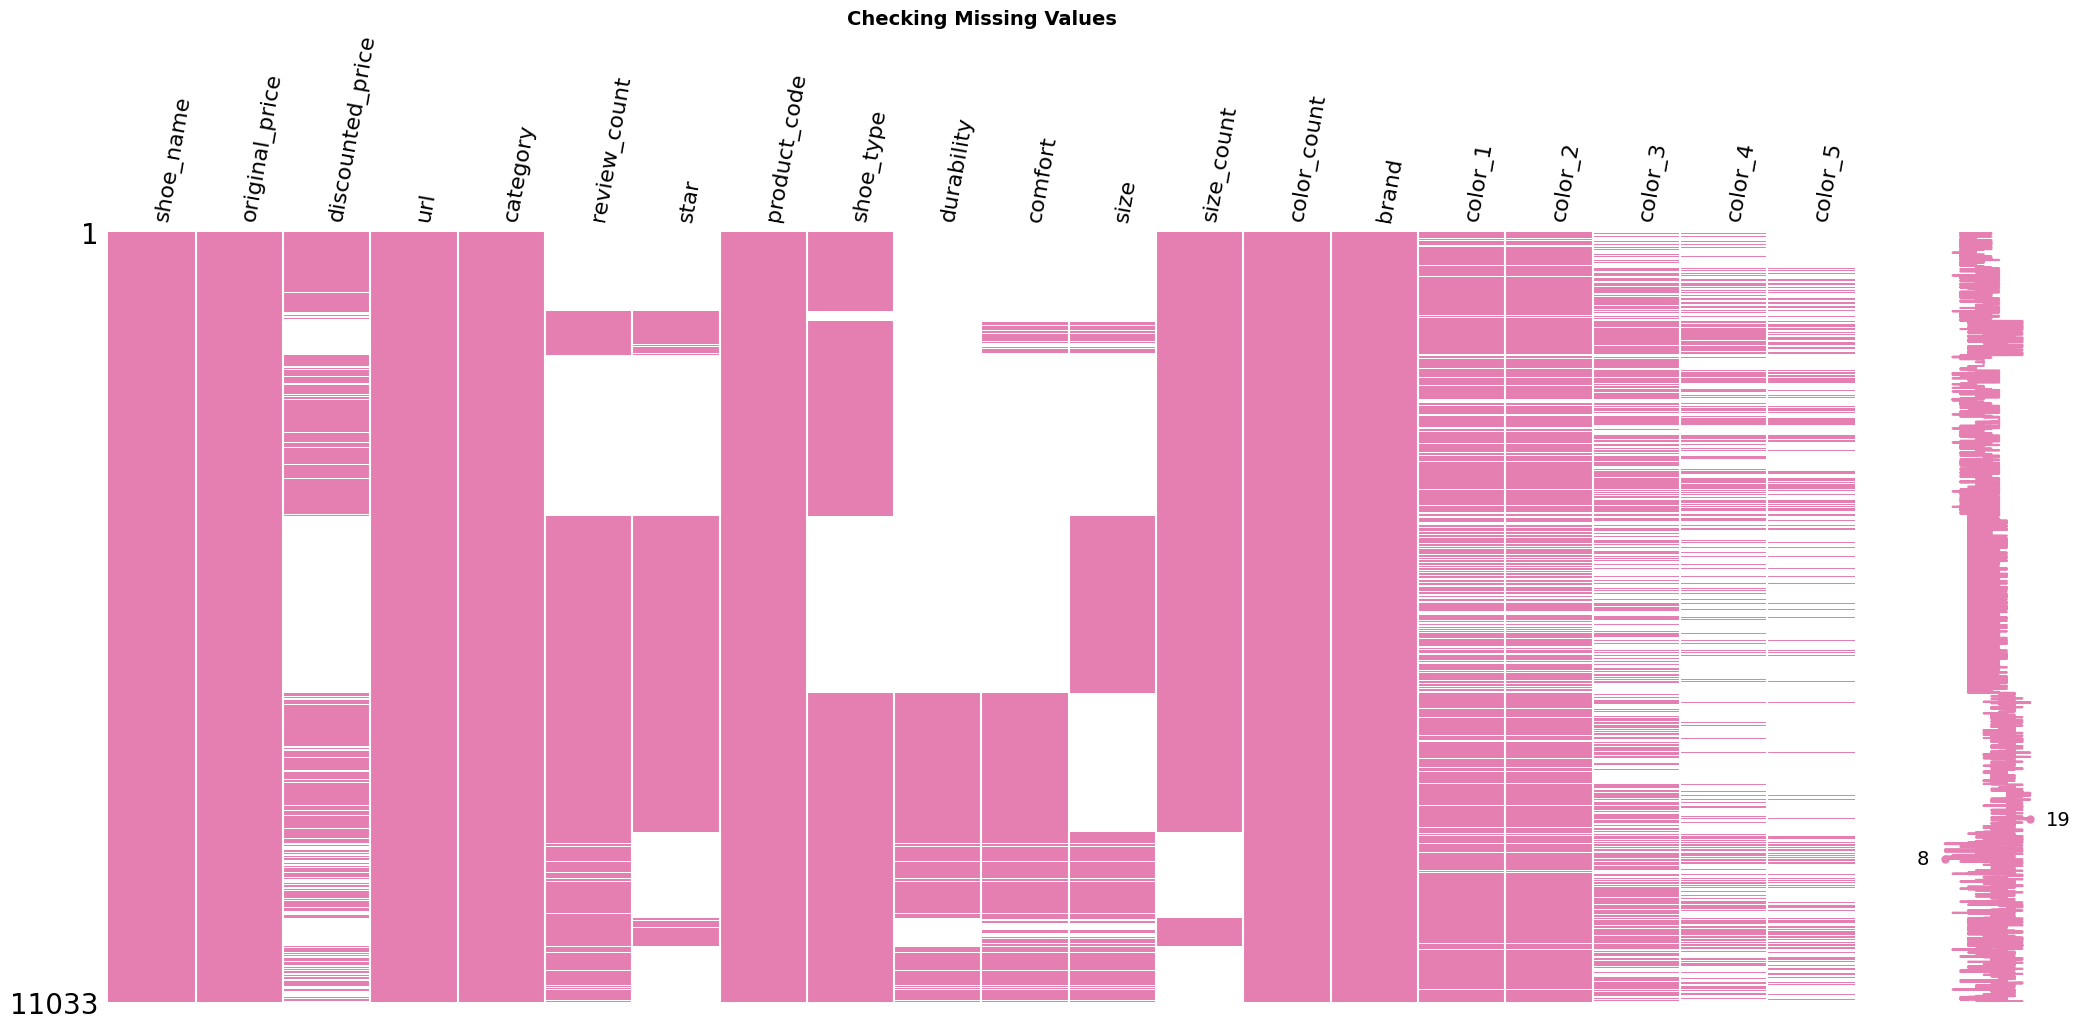

In [ ]:
# Visiualizing missing data in DataFrame
msno.matrix(df, color=(0.9, 0.5, 0.7))
plt.title('Checking Missing Values', fontsize=14, fontweight='bold')
plt.xticks(rotation=80)
plt.show()

In [ ]:
columns_with_missing_values = [column for column in df.columns if df[column].isna().any()]

print(len(columns_with_missing_values), (columns_with_missing_values))

13 ['discounted_price', 'review_count', 'star', 'shoe_type', 'durability', 'comfort', 'size', 'size_count', 'color_1', 'color_2', 'color_3', 'color_4', 'color_5']


In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100

print(null_percentage)

shoe_name            0.000000
original_price       0.000000
discounted_price    45.454545
url                  0.000000
category             0.000000
review_count        32.520620
star                50.067978
product_code         0.000000
shoe_type           24.209191
durability          64.977794
comfort             60.772229
size                55.814375
size_count          18.399347
color_count          0.000000
brand                0.000000
color_1             14.619777
color_2             14.665096
color_3             44.040605
color_4             67.424998
color_5             78.709327
dtype: float64


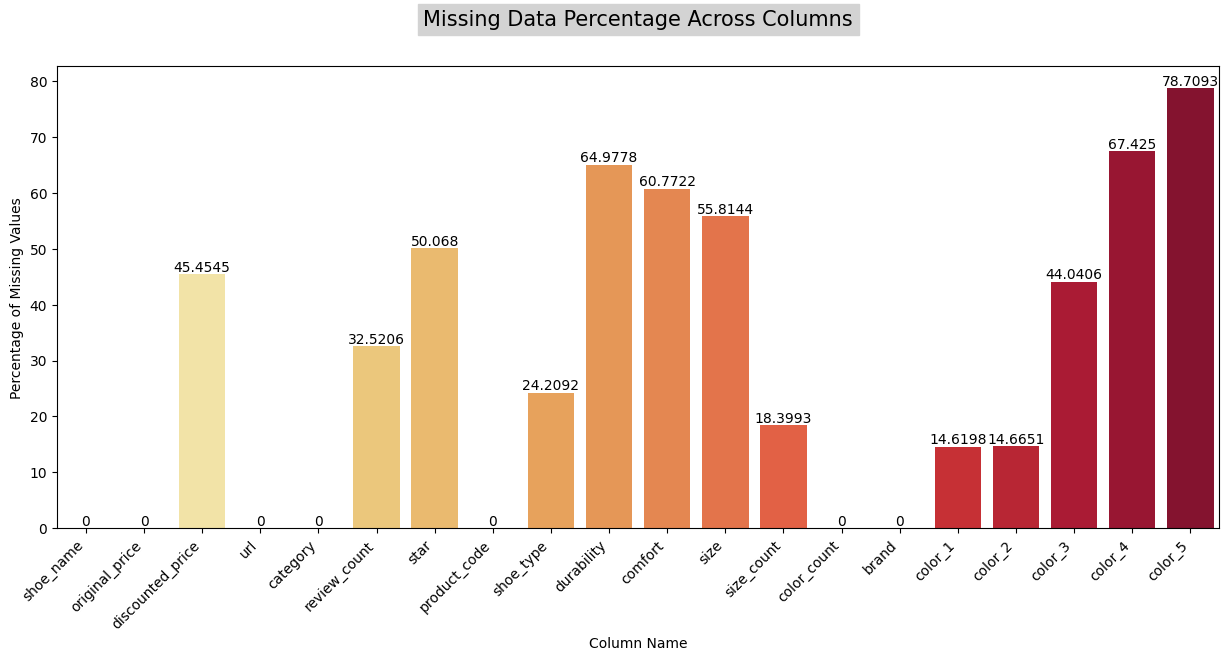

In [ ]:
# bar plot to visualize missing data
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="YlOrRd")
ax.bar_label(ax.containers[0])
ax.set(xlabel='Column Name', ylabel='Percentage of Missing Values')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Missing Data Percentage Across Columns", fontsize=15, backgroundcolor='Lightgray', color='black', y=1.07)
plt.show()

The dataset encompasses information specific to the Indian region. I am examining which website exhibits higher demand, pricing, and quality in the Indian market.

### **Reason for missing data in Dataset:-**

> **discounted_price:** The absence of discounted prices in all website products results in missing values for the discounted_price column.

> **review_count and star (star_rating):** The review count and star rating sections are absent on several websites, including Woodland, Puma, and Columbia. Additionally, certain products across all websites lack information in both these categories, contributing to significant missing data.

> **shoe_type:** Shoe type information is unavailable on certain websites, specifically Columbia and Woodland. Additionally, there are products across various websites where the shoe type is not specified.

> **Durabilty/Comfot/Size:** The information pertains to buyer or customer feedback categories. However, these categories are unavailable for the websites Puma, Woodland, and Columbia. Furthermore, certain products exhibit either complete absence or partial missing values in these categories.

> **size_count:** Certain products may lack specific information or applicability regarding the count of available sizes.

> **color_1, color_2, color_3, color_4, and color_5:** Limited color options for certain products can result in null values in the corresponding color columns for colors that are not applicable. Additionally, some items may not come in multiple color variations, contributing to missing values in columns related to color information.


**I will begin by changing the data types of certain columns that require attention, and I will proceed to fill in any missing values.**

In [ ]:
# Checking the data types to ensure consistency and compatibility.
df.dtypes

shoe_name            object
original_price       object
discounted_price     object
url                  object
category             object
review_count         object
star                 object
product_code         object
shoe_type            object
durability           object
comfort              object
size                float64
size_count          float64
color_count           int64
brand                object
color_1              object
color_2              object
color_3              object
color_4              object
color_5              object
dtype: object

In [ ]:
# Checking Unique Values in Columns
for column in df.columns:

    print(f"\033[1m{column}:\033[0m")

    unique_values = df[column].unique()
    print(unique_values)

    print('========' * 25)

shoe_name:
["Deviate Nitro 2 Winterised women's Trail Running Shoes"
 "Cilia Lux women's Sneakers" "Fier Nitro women's Sneakers" ...
 'PRIMIERTO SHOES' 'COS SUPERNOVA SHOES' 'PARK ST. SHOES']
original_price:
['9,599' '3,299' '4,799' '4,499' '3,569' '3,769' '5,399' '3,999' '3,759'
 '5,999' '7,999' '2,019' '2,999' '2,249' '2,159' '5,199' '3,849' '3,119'
 '4,229' '4,949' '4,049' '6,599' '2,339' '3,639' '3,709' '3,499' '9,099'
 '7,199' '2,879' '3,899' '4,459' '3,599' '4,399' '1,929' '4,899' '2,749'
 '4,119' '2,499' '3,149' '6,399' '6,749' '6,299' '4,769' '4,199' '3,749'
 '5,499' '3,839' '5,599' '6,999' '4,319' '2,819' '1,999' '3,969' '1,719'
 '2,109' '3,049' '2,699' '2,199' '2,319' '1,949' '0' '8,999' '11,399'
 '10,799' '11,999' '14,999' '1,749' '2,099' '1,919' '8,799' '9,349'
 '13,599' '11,199' '2,859' '10,399' '2,469' '2,119' '8,399' '12,799'
 '3,249' '5,219' '2,579' '3,019' '9,999' '10,999' '11,249' '16,999'
 '19,999' '12,599' '4,639' '7,799' '2,919' '3,009' '2,399' '3,369' '1,249'
 '1,

Before filling missing values, it is important to check unique values in each column. This step helps to understand data distribution, choose the right strategies for filling missing values, avoid unintended changes to data patterns, maintain consistency, and handle categorical data effectively.

In [ ]:
# Remove commas and handle spaces as well, then convert to float
df['original_price'] = df['original_price'].str.replace(',', '').str.replace(' ', '').astype(float)
df["original_price"].dtype

dtype('float64')

In [ ]:
# Replace 0.0 with NaN
df['original_price'] = df['original_price'].replace(0.0, np.nan)

# Calculate the median of the 'original_price' column
median_price = df['original_price'].median()
median_price

# Fill NaN values with the median
df['original_price'].fillna(median_price, inplace=True)


* To address the issue of some original prices being recorded as 0.0, I have resolved this by imputing the median value. This correction aims to mitigate the impact of the scraping issue on the original_price column.

* Original_price column contains values of 0.0, it signifies missing or invalid data rather than a genuine price. A value of 0.0 in the price column could be a placeholder or an error.

In [ ]:
# Remove commas and handle spaces as well, then convert to float
df["discounted_price"] = df["discounted_price"].str.replace(',', '').str.replace(' ', '').astype(float)
df["discounted_price"].dtype

dtype('float64')

The data types of "discounted_price" and "original_price" were modified to float in order to manage decimal values, ease numerical calculations, and ensure consistency with other numeric data in the dataset.

In [ ]:
# Define the list of values to consider as NaN
nan_values = [np.nan, 'N/A', 'na', 'NaN', 'nan', 'Nan']

In [ ]:
# Replace NaN values with 0 and convert to float
df['review_count'].replace(nan_values, 0, inplace=True)
df['review_count']=df['review_count'].astype(float)
df['review_count'].dtype

dtype('float64')

In [ ]:
# Replace 'Nan' with a default value (0) and convert to float
df['star'].replace(nan_values, 0, inplace=True)
df['star'] = df['star'].astype(float)
df['star'].dtype

dtype('float64')

The use of 'NaN' is meant to signify the absence or undefined status of review counts and star ratings.

Opting to fill these values with zero is a sound choice in such a scenario, as a review count and star rating of zero serve as valid and meaningful indicators, signifying the absence of reviews or star ratings for the corresponding item.

In [ ]:
# Replace 'Nan' with a default value (0) and convert to float
df['durability'].replace(nan_values, 0, inplace=True)
df['durability']=df['durability'].astype(float)
df['durability'].dtype

dtype('float64')

In [ ]:
# Replace 'Nan' with a default value (0) and convert to float
df['comfort'].replace(nan_values, 0, inplace=True)
df['comfort']=df['comfort'].astype(float)
df['comfort'].dtype

dtype('float64')

In [ ]:
# Replace 'Nan' with a default value (0)
df['size'].replace(nan_values, 0.0, inplace=True)

Buyer feedback influences comfort, durability, and size. Opting for 0 to fill missing values proves useful for maintaining a neutral and consistent approach.

This approach clearly indicates the absence of feedback, thereby ensuring numerical consistency throughout the analysis.

In [ ]:
# Replace 0.0 with NaN
df['size_count'] = df['size_count'].replace(0.0, np.nan)


# Calculate the median of the 'size_count' column
median_size_count = df['size_count'].median()
print(median_size_count)

# Fill NaN values with the median
df['size_count'].fillna(median_size_count, inplace=True)


5.0


In [ ]:
# Replace 0.0 with NaN
df['color_count'] = df['color_count'].replace(0.0, np.nan)

# Calculate the median of the 'color_count' column
median_color_count = df['color_count'].median()
print(median_color_count)

# Fill NaN values with the median
df['color_count'].fillna(median_color_count, inplace=True)



3.0


In [ ]:
# Address the missing "shoe_type" values by filling them :Kept this column just for EDA
print (df["shoe_type"].mode()[0])
df["shoe_type"] = df["shoe_type"].fillna(df["shoe_type"].mode()[0])

Sneakers


In [ ]:
# Address the missing "color_1" values by filling them
print (df["color_1"].mode()[0])
df["color_1"] = df["color_1"].fillna(df["color_1"].mode()[0])

Puma Black-Puma White


In [ ]:
# Address the missing "color_2" values by filling them
print (df["color_2"].mode()[0])
df["color_2"] = df["color_2"].fillna(df["color_2"].mode()[0])

CAMEL


In [ ]:
# Address the missing "color_3" values by filling them
print (df["color_3"].mode()[0])
df["color_3"] = df["color_3"].fillna(df["color_3"].mode()[0])

Puma Black-High Risk Red


In [ ]:
df.dtypes

shoe_name            object
original_price      float64
discounted_price    float64
url                  object
category             object
review_count        float64
star                float64
product_code         object
shoe_type            object
durability          float64
comfort             float64
size                float64
size_count          float64
color_count         float64
brand                object
color_1              object
color_2              object
color_3              object
color_4              object
color_5              object
dtype: object

* The 'original_price', 'discounted_price', 'review_count', 'star', 'durability', and 'comfort' columns have been successfully converted to float64 data type from their initial object type.

* The 'size', 'size_count', and 'color_count' columns remain as float64 and int64 types, respectively.

* Other columns, such as 'shoe_name', 'url', 'category', 'product_code', 'shoe_type', 'brand', 'color_1', 'color_2', 'color_3', 'color_4', and 'color_5', are unchanged in their data types.

In [ ]:
# dropping the unnecessary for analysis.
df.drop(["discounted_price", "url", "color_4", "color_5"], axis=1, inplace=True)


In [ ]:
df.isna().sum()

shoe_name         0
original_price    0
category          0
review_count      0
star              0
product_code      0
shoe_type         0
durability        0
comfort           0
size              0
size_count        0
color_count       0
brand             0
color_1           0
color_2           0
color_3           0
dtype: int64

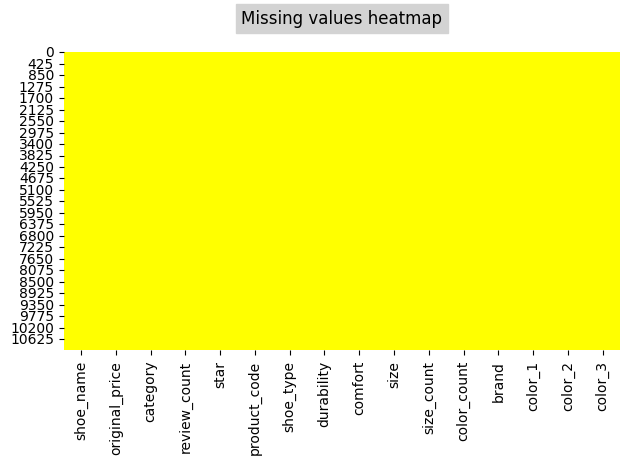

In [ ]:
# # Lets visualize it using heatmap
sns.heatmap(df.isnull(), cmap="spring_r", cbar = False).set_title("Missing values heatmap", backgroundcolor='Lightgray', y=1.07)
plt.tight_layout()
plt.show()

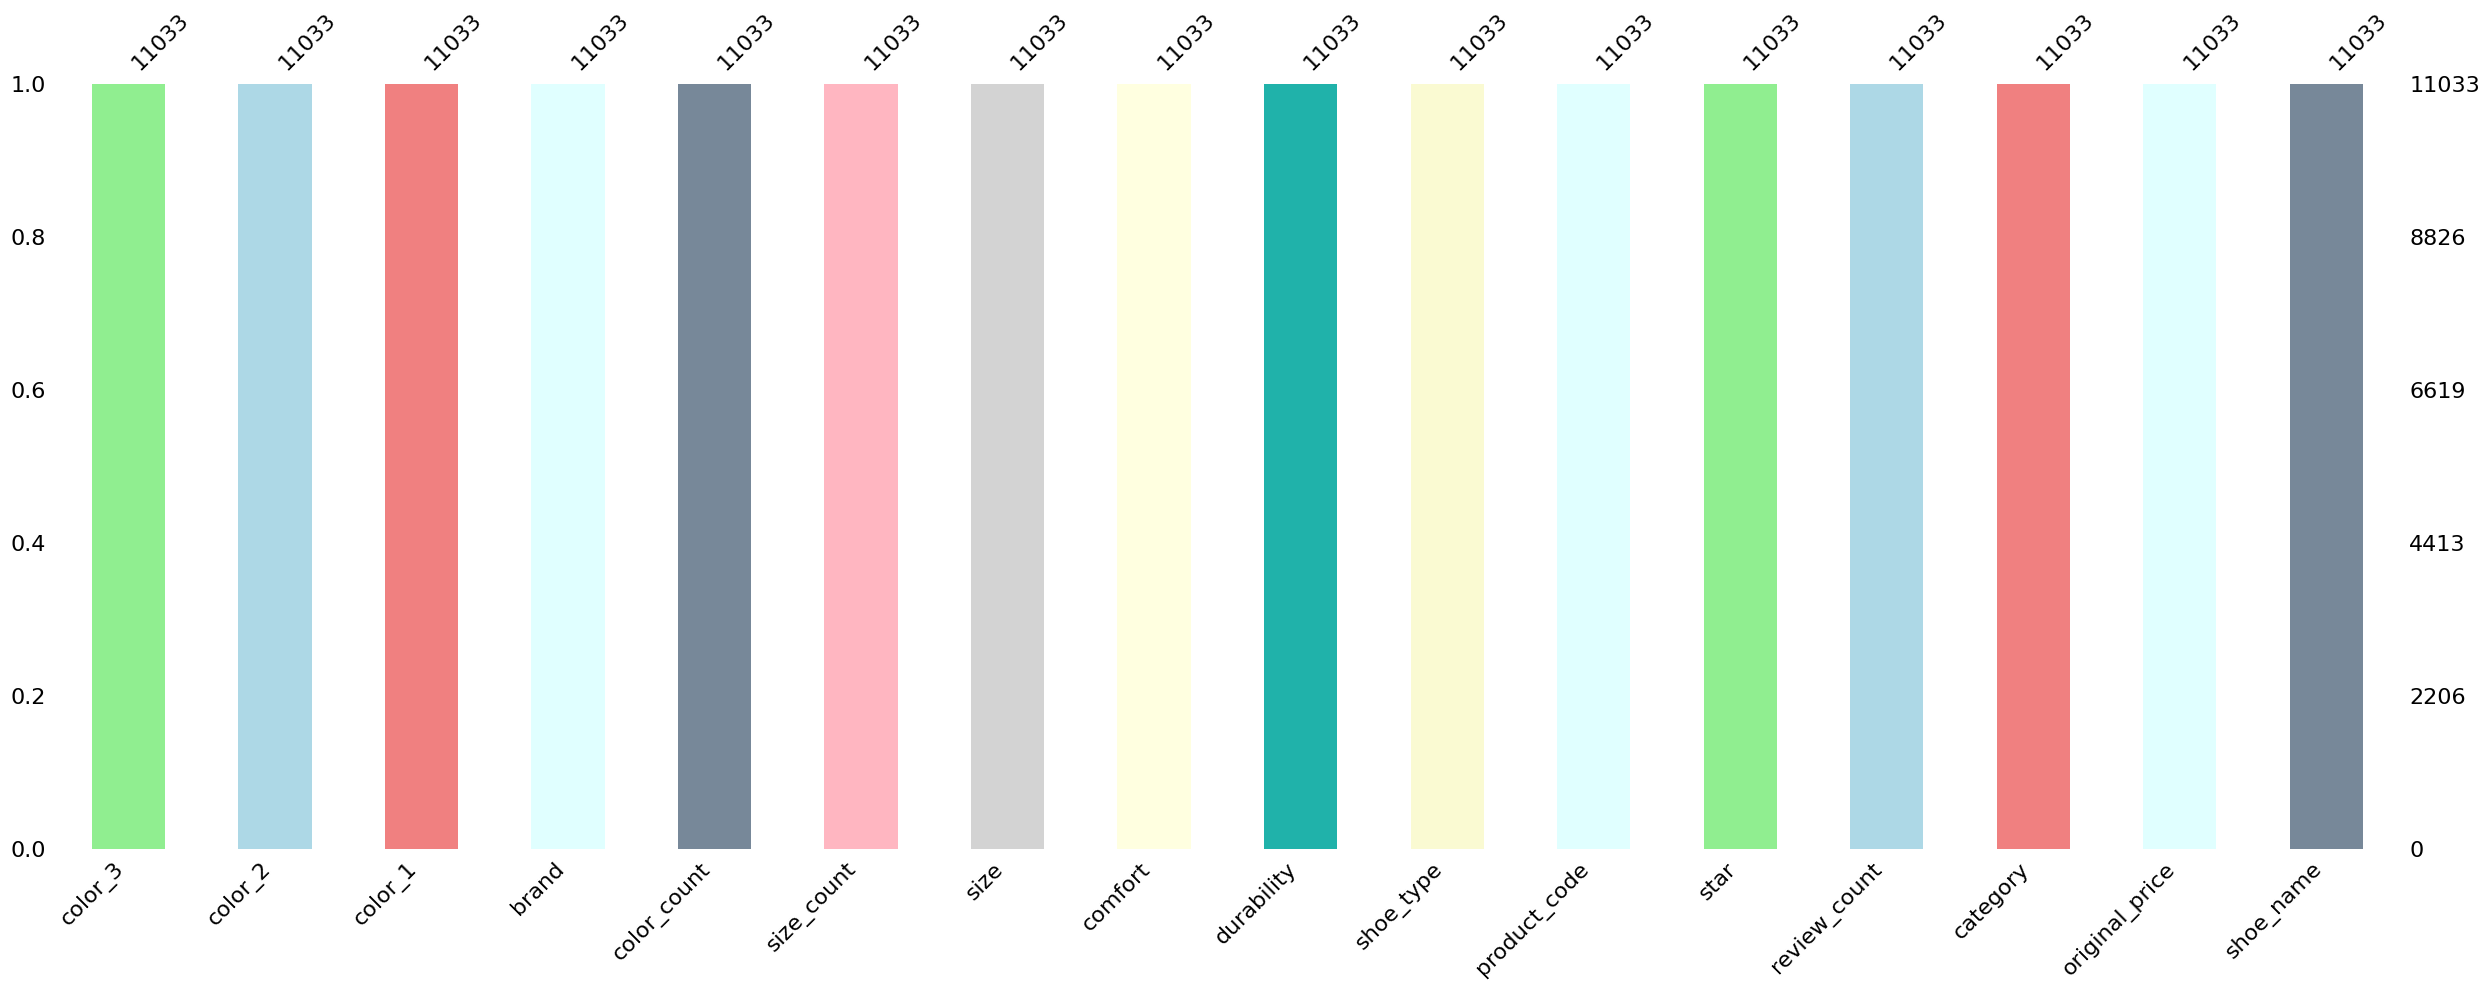

In [ ]:
figsize=(4, 4)
light_colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightcyan', 'lightslategray', 'lightpink', 'lightgray', 'lightyellow', 'lightseagreen', 'lightgoldenrodyellow', 'lightcyan']
msno.bar(df, color=light_colors, sort='descending')
plt.tight_layout()
plt.show()

Following the replacement of missing values, in few columns, such as  review_count, star, shoe_type, durability, comfort, size, size_count and  color_count showcase completeness without any remaining null entries. This indicates the dataset has successfully addressed and eliminated missing data, enhancing its overall integrity for further analysis.

**Let's check the DataFrame Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shoe_name       11033 non-null  object 
 1   original_price  11033 non-null  float64
 2   category        11033 non-null  object 
 3   review_count    11033 non-null  float64
 4   star            11033 non-null  float64
 5   product_code    11033 non-null  object 
 6   shoe_type       11033 non-null  object 
 7   durability      11033 non-null  float64
 8   comfort         11033 non-null  float64
 9   size            11033 non-null  float64
 10  size_count      11033 non-null  float64
 11  color_count     11033 non-null  float64
 12  brand           11033 non-null  object 
 13  color_1         11033 non-null  object 
 14  color_2         11033 non-null  object 
 15  color_3         11033 non-null  object 
dtypes: float64(8), object(8)
memory usage: 1.3+ MB


**Derived from the provided information post-appropriate adjustments to the data:**

**Data Size:** The dataset contains 11,033 entries and 14 columns.

**Data Types:** data types include float64 (7 columns), int64 (1 column), and object (6 columns), reflecting a diverse mix of numerical and categorical data.

**Completeness:** All columns have non-null counts matching the total number of entries (11,033).

**Numeric Values:** Numeric columns, such as 'original_price', 'review_count', 'star', 'durability', 'comfort', 'size', 'size_count', and 'color_count', feature appropriate float or integer data types.

**Categorical Values:** Categorical columns like 'shoe_name', 'url', 'category', 'product_code', 'shoe_type', and 'brand' are classified as object data types, suitable for handling categorical information.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">
Assessing dataset's categorical and numerical columns</b>
 </div>

In [ ]:
# Identifying Categorical Columns
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns]
print("\033[1mNumber of Categorical Columns:\033[0m", len(categorical_columns))
print("\033[1mCategorical Columns:\033[0m", categorical_columns)

Number of Categorical Columns: 8
Categorical Columns: ['shoe_name', 'category', 'product_code', 'shoe_type', 'brand', 'color_1', 'color_2', 'color_3']


In [ ]:
# Identifying Numerical Columns
numerical_columns = [col for col in df.select_dtypes(exclude=['object']).columns]
print("\033[1mNumber of Numerical Columns:\033[0m", len(numerical_columns))
print("\033[1mNumerical Columns:\033[0m", numerical_columns)

Number of Numerical Columns: 8
Numerical Columns: ['original_price', 'review_count', 'star', 'durability', 'comfort', 'size', 'size_count', 'color_count']


<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">
Data Visualization/Analysis</b>
 </div>

### Let's examine the dataset's statistical information:

In [ ]:
# For numerical columns exclusively
df.describe().T

count         mean          std    min     25%     50%  \
original_price  11033.0  5854.390465  4035.564389  159.0  2999.0  4799.0   
review_count    11033.0   102.244086   615.640715    0.0     0.0     0.0   
star            11033.0     1.377894     2.089673    0.0     0.0     0.0   
durability      11033.0    14.286685    31.954427    0.0     0.0     0.0   
comfort         11033.0    16.903199    33.325521    0.0     0.0     0.0   
size            11033.0    24.354754    28.059160    0.0     0.0     0.0   
size_count      11033.0     4.852624     2.646169    1.0     3.0     5.0   
color_count     11033.0     3.416025     2.460943    1.0     2.0     3.0   

                   75%      max  
original_price  7599.0  29999.0  
review_count      31.0  19780.0  
star               4.3      5.0  
durability         0.0    100.0  
comfort            0.0    100.0  
size              56.0    100.0  
size_count         6.0     21.0  
color_count        4.0     15.0

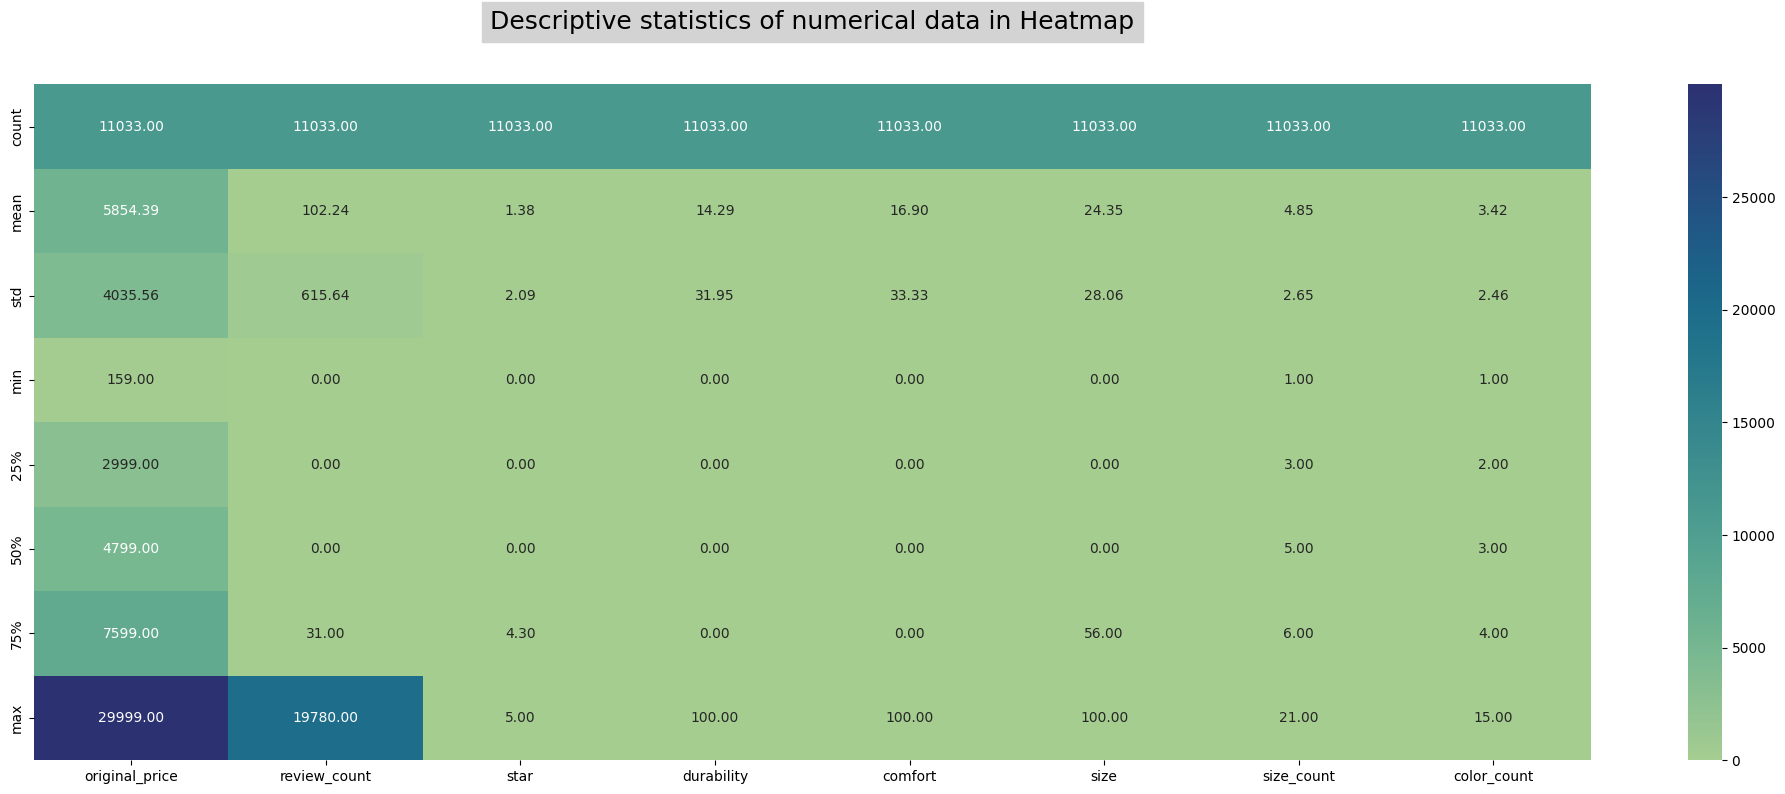

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.describe(), annot=True, cmap='crest', fmt=".2f")
plt.title("Descriptive statistics of numerical data in Heatmap", backgroundcolor='Lightgray', y=1.07, fontsize=18)
plt.tight_layout()
plt.show()

**Summary of Key Observations:**

**Original Price:**

* Prices range widely from 159.0 to 29,999.0, indicating a diverse pricing structure.
* The mean price is 5,854.39, with a significant standard deviation (4,035.56), suggesting notable price dispersion.

**Review Count:**

* Review counts vary greatly, ranging from 0 to 19,780.
* The mean review count is 102.24, but the high standard deviation (615.64) indicates potential outliers.

**Star Rating:**

* Star ratings range from 0.0 to 5.0, with the majority concentrated around lower values.
* The mean star rating is 1.38, and there is notable variability (standard deviation = 2.09).

**Durability and Comfort:**

* Durability and comfort scores both exhibit significant variability.
* Durability scores range from 0.0 to 100.0, with a mean of 14.29.
Comfort scores range from 0.0 to 100.0, with a mean of 16.90.

**Size:**
* Size ratings vary widely from 0.0 to 100.0, showing substantial diversity.
* The mean size rating is 24.35, with a notable standard deviation (28.06).

**Size Count and Color Count:**
* Size count values range from 1.0 to 21.0, with a mean of 4.85.
* Color count values range from 1.0 to 15.0, with a mean of 3.42.
* Both size count and color count exhibit moderate variability.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>

### **Univariant Analysis**

In [ ]:
# Checking Unique values of all the columns in our dataframe
for col in df.columns.values:
    print("Number of unique values of  \033[1m{} : {}\033[0m ".format(col,df[col].nunique()))

Number of unique values of  shoe_name : 2674 
Number of unique values of  original_price : 563 
Number of unique values of  category : 3 
Number of unique values of  review_count : 309 
Number of unique values of  star : 28 
Number of unique values of  product_code : 7343 
Number of unique values of  shoe_type : 164 
Number of unique values of  durability : 46 
Number of unique values of  comfort : 50 
Number of unique values of  size : 43 
Number of unique values of  size_count : 21 
Number of unique values of  color_count : 15 
Number of unique values of  brand : 6 
Number of unique values of  color_1 : 1166 
Number of unique values of  color_2 : 1298 
Number of unique values of  color_3 : 721 


**Let's analyze the target or Dependent Variables:**

**Star:-**

0.0    7655
4.7     578
4.5     483
4.6     430
5.0     373
4.8     313
4.4     269
4.3     238
4.0     158
4.9     137
4.2      97
4.1      72
3.8      62
3.9      42
3.0      22
2.0      17
2.7      17
3.6      14
3.7      11
2.3      11
3.5       9
1.5       9
3.4       5
3.2       3
2.6       3
3.1       3
2.5       1
1.0       1
Name: star, dtype: int64


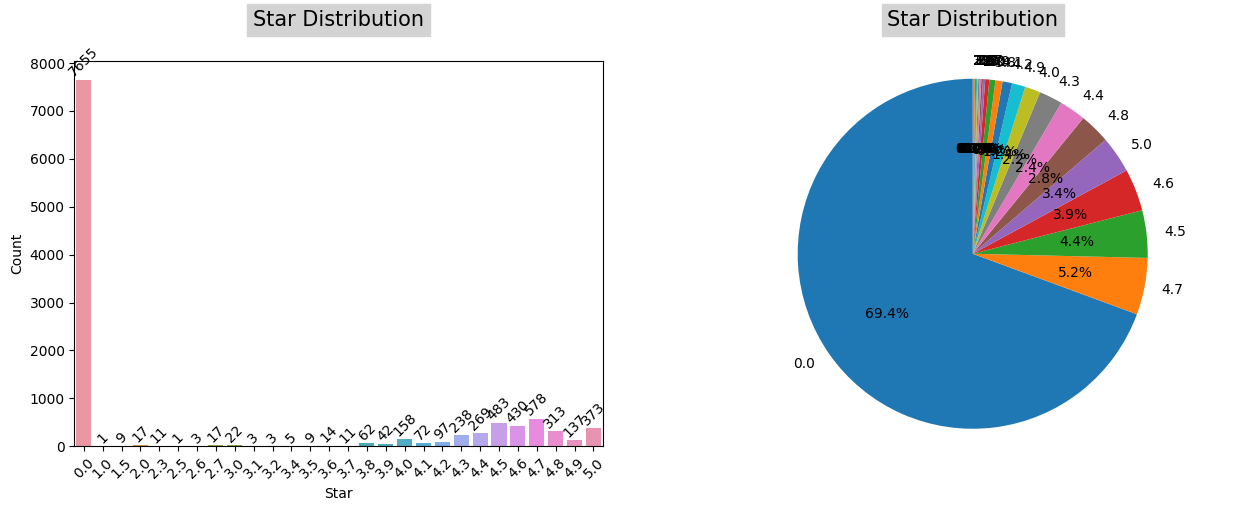

In [ ]:
# Count plot for the 'star' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_palette('Spectral')
sns.countplot(x="star", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="Star", ylabel="Count")
ax1.set_title("Star Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'star'
star_counts = df["star"].value_counts()
print(star_counts)

# Count plot for the 'star' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("Star Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()

**Observation:**

* The 'star' column has ratings ranging from 1.0 to 5.0.

* The most common rating is 0.0, occurring 7655 times, indicating shoes without assigned ratings.

* Higher ratings such as 3.5 , 3.6, 3.7, 3.8, 3.9, 4.0 and so on are quite common, suggesting a good number of well-rated shoes.

* Ratings below 3.0 are less frequent, with the lowest being 1.0.

* The ratings show a diverse range, reflecting different customer preferences and satisfaction levels.

**original_price:-**

In [ ]:
df[df['original_price']==0.0]

Empty DataFrame
Columns: [shoe_name, original_price, category, review_count, star, product_code, shoe_type, durability, comfort, size, size_count, color_count, brand, color_1, color_2, color_3]
Index: []

In [ ]:
df['original_price'].value_counts()

5999.0     442
6999.0     410
4799.0     331
7999.0     302
3599.0     283
          ... 
4699.0       1
1399.0       1
3399.0       1
23999.0      1
1607.0       1
Name: original_price, Length: 563, dtype: int64

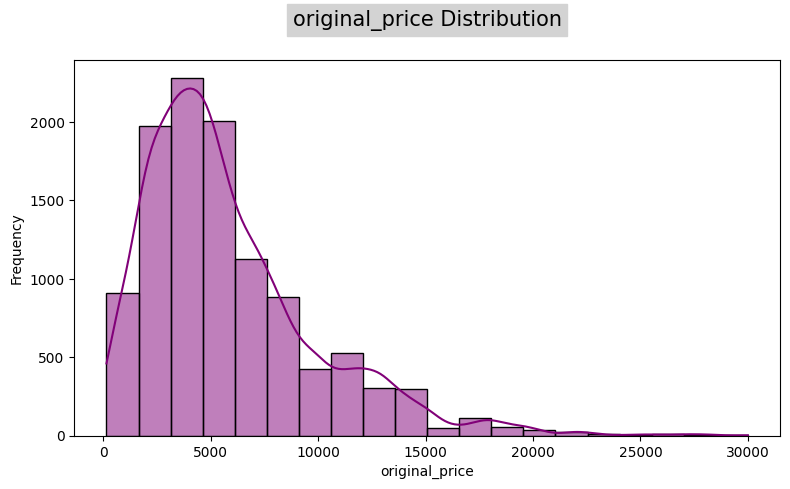

In [ ]:
# Histogram for the 'original_price' variable
plt.figure(figsize=(8, 5))
sns.set_palette('RdPu_r')

sns.histplot(data=df, x="original_price", bins=20, kde=True)
plt.xlabel("original_price")
plt.ylabel("Frequency")
plt.title("original_price Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)

plt.tight_layout()
plt.show()

* The 'original_price' column exhibits a diverse range of price points, with various products falling into different price categories.

* The most frequently occurring original prices include 5999.0 (442 occurrences), 6999.0 (410 occurrences), 4799.0 (322 occurrences), 7999.0 (302 occurrences), and 3599.0 (283 occurrences), showcasing a distribution that spans multiple price levels. Additionally, there are less common prices, such as 4699.0, 1399.0, 3399.0, 23999.0, and 1607.0, with only one occurrence each. This suggests a wide spectrum of pricing within the dataset.

**Let's analyze the Independent vaariables:-**

**shoe_name:-**

In [ ]:
df['shoe_name'].value_counts()

Transport unisex Running Shoes                            150
UNO - STAND ON AIR                                        138
Reflect Lite unisex Running Shoes                          64
Disperse XT 3 unisex Training Shoes                        52
ULTRABOUNCE SHOES                                          49
                                                         ... 
BLACK Comfort Floaters                                      1
Daze V2 unisex Sneakers                                     1
Woodland DENIM Back Strap Floater Sandals                   1
Clyde's Closet All-Pro NITRO unisex Basketball Shoes        1
Deviate Nitro 2 Winterised women's Trail Running Shoes      1
Name: shoe_name, Length: 2674, dtype: int64

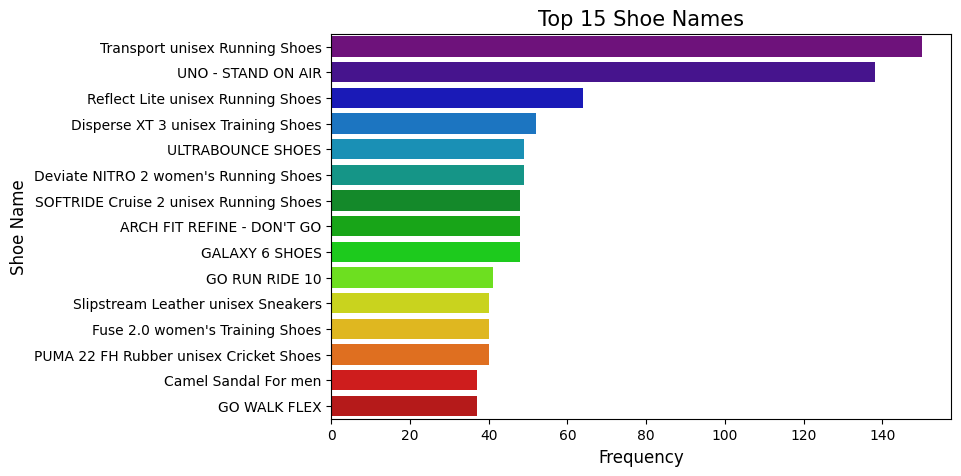

In [ ]:
# barplot for the 'shoe_name' variable
plt.figure(figsize=(8, 5))
sns.barplot(y=df['shoe_name'].value_counts().index[:15], x=df['shoe_name'].value_counts()[:15], palette='nipy_spectral')
plt.title('Top 15 Shoe Names', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Shoe Name', fontsize=12)
plt.show()

* The 'shoe_name' column features a diverse collection of shoe models, where "Transport unisex Running Shoes" takes the lead with 150 occurrences.

* Other popular models include "UNO - STAND ON AIR" (138 occurrences), "Reflect Lite unisex Running Shoes" (64 occurrences), and "Disperse XT 3 unisex Training Shoes" (52 occurrences). The dataset encompasses a total of 2,674 unique shoe names, reflecting a wide range of footwear options.

* Notably, unique names like "BLACK Comfort Floaters," "Daze V2 unisex Sneakers," "Woodland DENIM Back Strap Floater Sandals," and "Deviate Nitro 2 Winterised women's Trail Running Shoes" each appear only once in the dataset.

**product_code:-**

In [ ]:
df['product_code'].value_counts()

377028_23               10
377028_27               10
377028_01               10
377028_02               10
377028_03               10
                        ..
FGC031039112A-NAVY       1
FGC028030281A-BLACK      1
FGC028030281A-DGREEN     1
370282_09                1
IQ8888                   1
Name: product_code, Length: 7343, dtype: int64

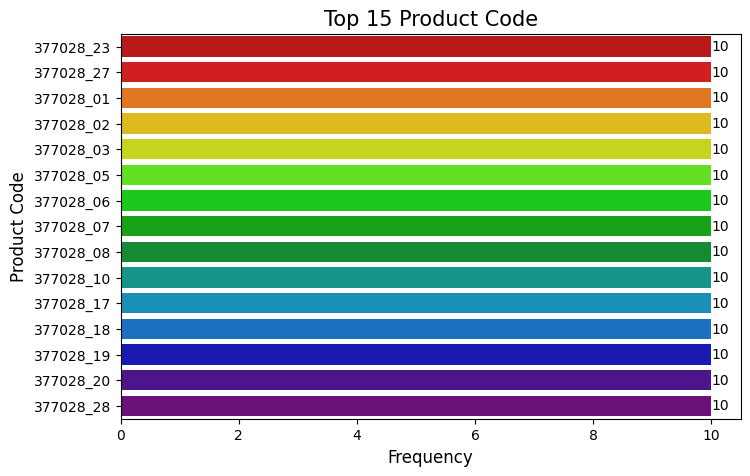

In [ ]:
# barplot for the 'product_code' variable
plt.figure(figsize=(8, 5))
ax = sns.barplot(y=df['product_code'].value_counts().index[:15], x=df['product_code'].value_counts()[:15], palette='nipy_spectral_r')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 15 Product Code', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Product Code', fontsize=12)
plt.show()

* product codes such as '377028_23', '377028_27', '377028_01', '377028_02', and '377028_03' each occur 10 times. The dataset comprises a total of 7,343 unique product codes, showcasing the variety of products available. Additionally, there are product codes like 'FGC031039112A-NAVY', 'FGC028030281A-BLACK', 'FGC028030281A-DGREEN', '370282_09', and 'IQ8888', each occurring only once.

**category:-**

men       5652
women     3173
unisex    2208
Name: category, dtype: int64


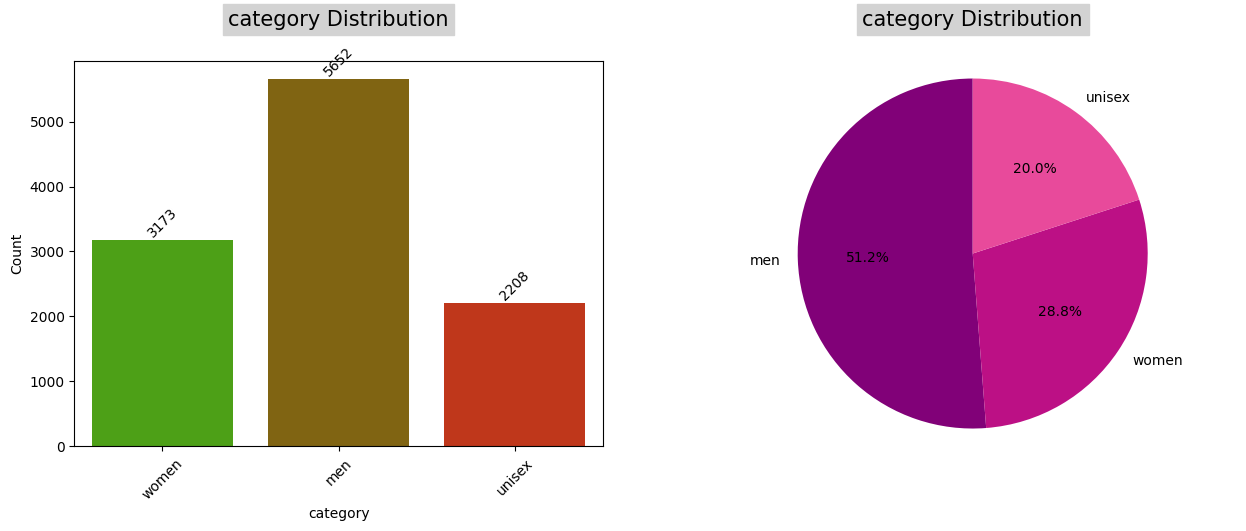

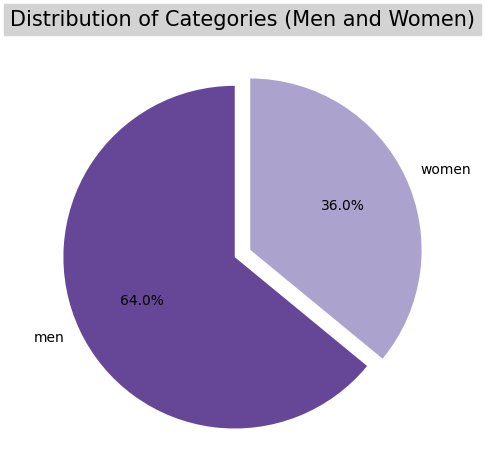

In [ ]:
# Count plot for the 'category' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_palette('brg_r')
sns.countplot(x="category", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="category", ylabel="Count")
ax1.set_title("category Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'star'
star_counts = df["category"].value_counts()
print(star_counts)

# Count plot for the 'star' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("category Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)


subset_df = df[df['category'].isin(['men', 'women'])]

# Count plot for the 'category' variable
plt.figure(figsize=(5, 5))
sns.set_palette('PuOr_r')
category_counts = subset_df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.axis('equal')
plt.title("Distribution of Categories (Men and Women)", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()


* The majority of entries belong to the 'men' category, totaling 5,652 occurrences. The 'women' category follows with 3,173 occurrences, and the 'unisex' category has 2,208 occurrences.

**The presence of the 'unisex' category in the shoe dataset indicates that there are shoes designed to be suitable for both men and women. Unisex footwear is designed to be worn by individuals of any gender, emphasizing a universal fit.**

**review_count:-**

In [ ]:
df['review_count'].value_counts()

0.0      5779
1.0       326
2.0       205
3.0       191
7.0       125
         ... 
182.0       1
196.0       1
206.0       1
263.0       1
110.0       1
Name: review_count, Length: 309, dtype: int64

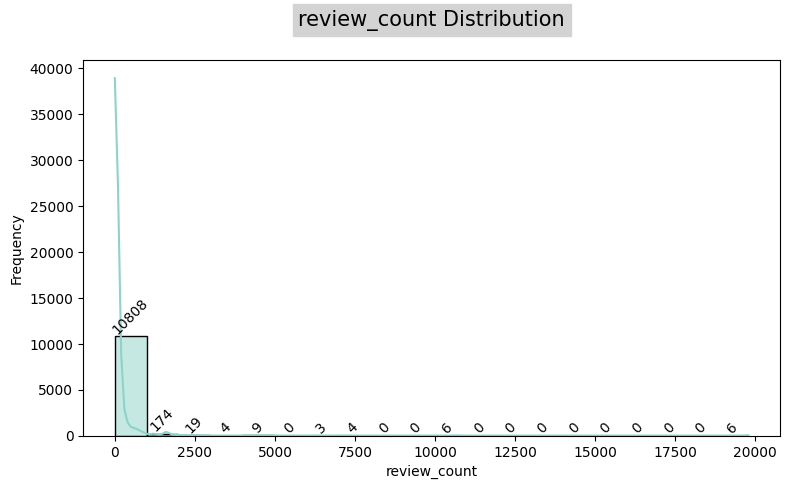

In [ ]:
# Histogram for the 'review_count' variable
plt.figure(figsize=(8, 5))
sns.set_palette('Set3')

ax=sns.histplot(data=df, x="review_count", bins=20, kde=True)
for i in ax.containers:
     ax.bar_label(i, rotation=45)
#plt.xlim(0, 20000)
plt.xlabel("review_count")
plt.ylabel("Frequency")
plt.title("review_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)

plt.tight_layout()
plt.show()

* The majority of shoes (5,779) have zero reviews, followed by 326 shoes with one review and 205 shoes with two reviews.

* The distribution shows a decreasing trend, with fewer shoes having higher review counts.

**shoe_type:-**

In [ ]:
df['shoe_type'].value_counts()

Sneakers                      3900
Running Shoes                 1101
Shoes                          858
Running                        790
Sportswear                     564
                              ... 
FG Low-Top Football Boot         1
Athletics Sprinting Spikes       1
Cool Cat 2.0 Youth Slides        1
MG High-Top Football Boot        1
Custom Workout Shoes             1
Name: shoe_type, Length: 164, dtype: int64

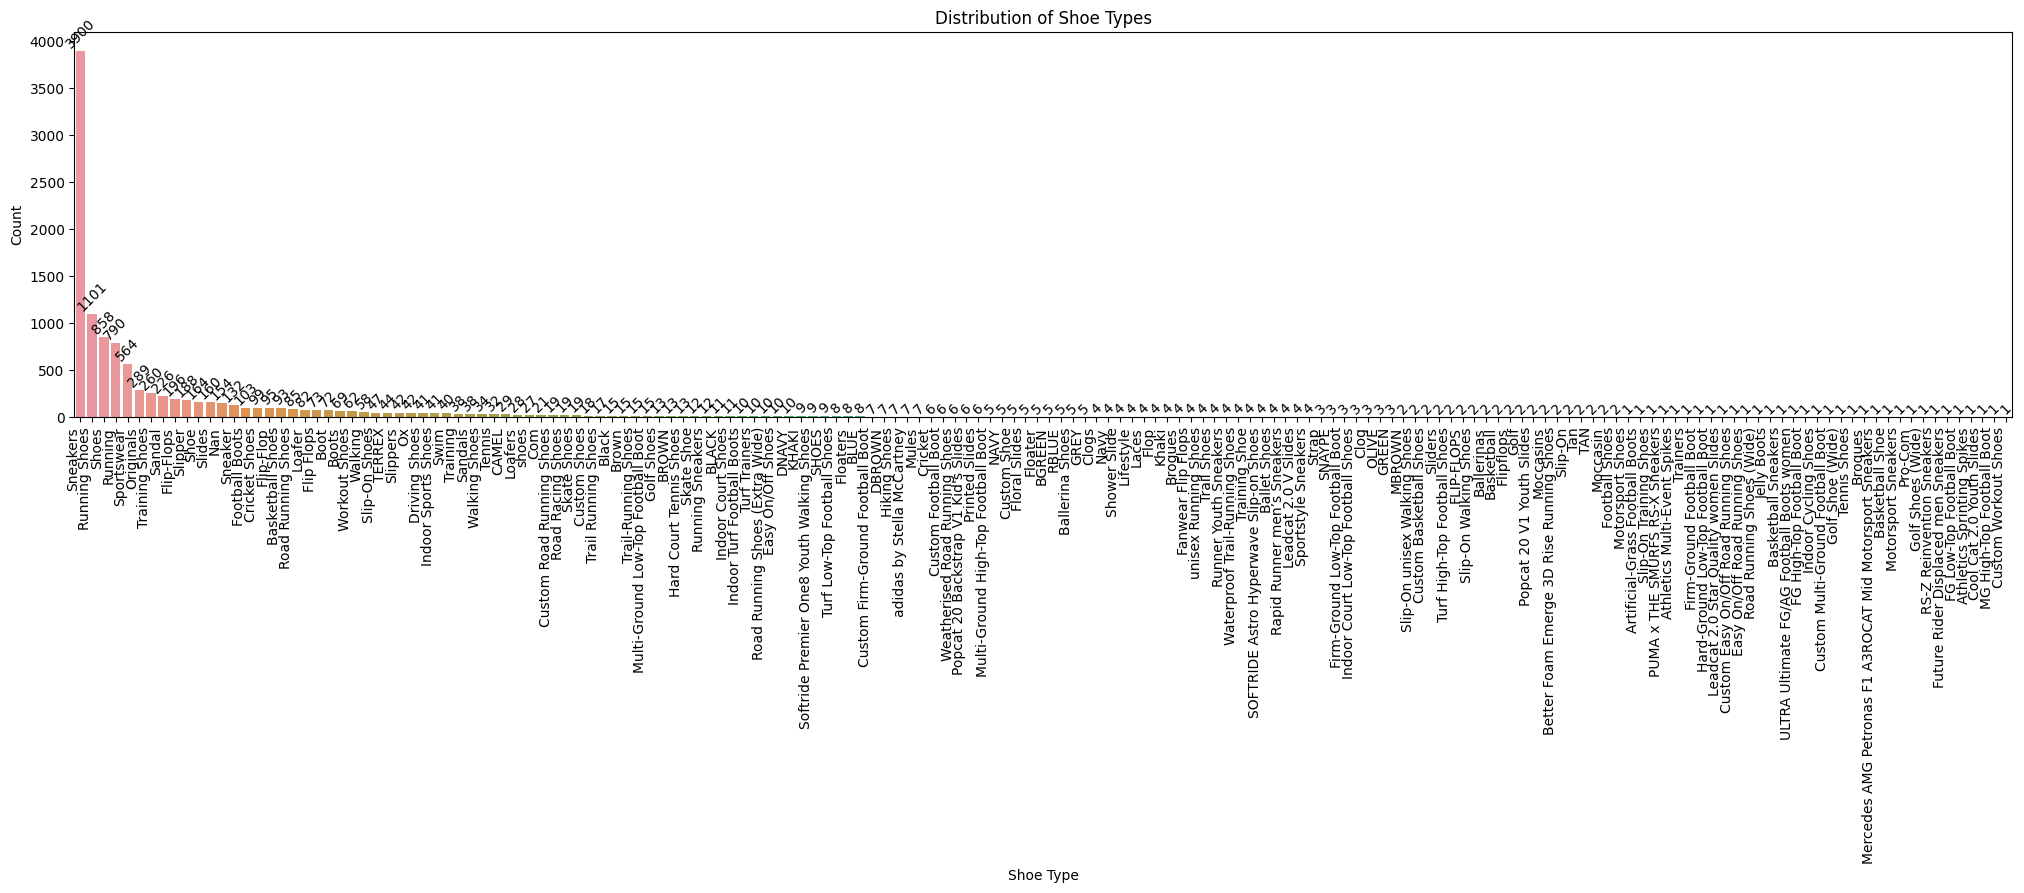

In [ ]:
# count plot for the 'shoe_type' variable
plt.figure(figsize=(25,5))
sns.set_palette('viridis')
ax=sns.countplot(x='shoe_type', data=df, order=df['shoe_type'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i, rotation=45)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Shoe Type')
plt.ylabel('Count')
plt.title('Distribution of Shoe Types')
plt.show()

* The 'shoe_type' variable provides insight into the distribution of different types of shoes in the dataset. The most prevalent category is "Sneakers" with 3900 occurrences, followed by "Running Shoes" with 1101 occurrences and "Shoes" with 858 occurrences.

* The dataset encompasses a total of 164 unique shoe types, showcasing a diverse range of footwear styles.

**durability:-**

0.0      9173
87.0      175
85.0      156
89.0      140
86.0      133
88.0      116
91.0      115
83.0      114
84.0      111
100.0     110
90.0      103
81.0       72
75.0       60
77.0       49
82.0       45
93.0       41
78.0       41
80.0       31
95.0       27
72.0       23
79.0       22
76.0       21
92.0       18
62.0       17
70.0       13
74.0       12
66.0       10
71.0       10
97.0        9
50.0        7
68.0        6
25.0        6
73.0        5
37.0        5
64.0        5
65.0        4
94.0        4
96.0        4
60.0        3
63.0        3
8.0         3
54.0        3
67.0        2
58.0        2
61.0        2
98.0        2
Name: durability, dtype: int64


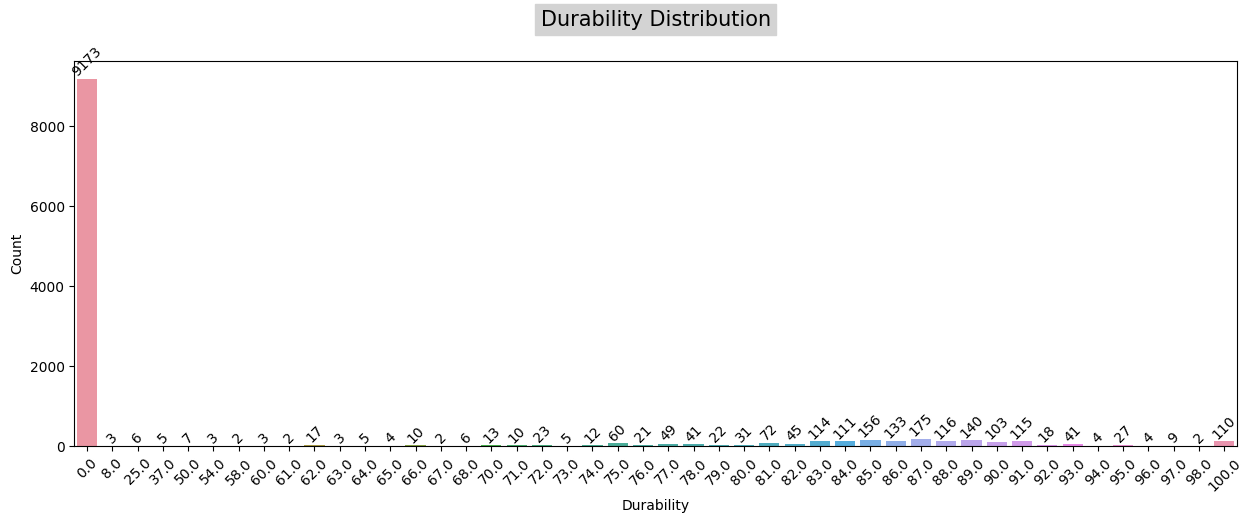

In [ ]:
# Count plot for the 'durability' variable
plt.figure(figsize=(15, 5))
sns.set_palette('crest')
ax = sns.countplot(x="durability", data=df)
for i in ax.containers:
    ax.bar_label(i, rotation=45)

ax.set(xlabel="Durability", ylabel="Count")
ax.set_title("Durability Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'durability'
durability_counts = df["durability"].value_counts()
print(durability_counts)

plt.show()

* The 'durability' column exhibits a diverse distribution, with the majority of shoes having a durability rating of 0.0. A rating of 0.0 signifies that the data is unavailable on the respective websites, and in some cases, the categorization for shoe size ratings are missing or undefined.

* durability ratings are spread across various values, with notable occurrences at 87.0, 85.0, 89.0, and 86.0. The dataset includes a range of durability ratings, with a peak at 100.0. There are also instances of lower ratings such as 8.0, 25.0, and 37.0.

**comfort:-**

0.0      8726
100.0     266
84.0      175
75.0      150
82.0      139
85.0      131
83.0      128
79.0      113
80.0       98
86.0       98
81.0       90
88.0       87
50.0       82
78.0       78
87.0       68
77.0       56
89.0       50
67.0       48
90.0       43
65.0       39
73.0       37
70.0       32
74.0       31
76.0       30
71.0       23
91.0       22
66.0       21
92.0       20
68.0       17
72.0       17
69.0       16
62.0       11
58.0       11
93.0       11
63.0       10
25.0        9
64.0        8
60.0        7
34.0        5
56.0        5
95.0        4
97.0        3
33.0        3
59.0        3
52.0        3
54.0        3
98.0        2
61.0        2
96.0        1
43.0        1
Name: comfort, dtype: int64


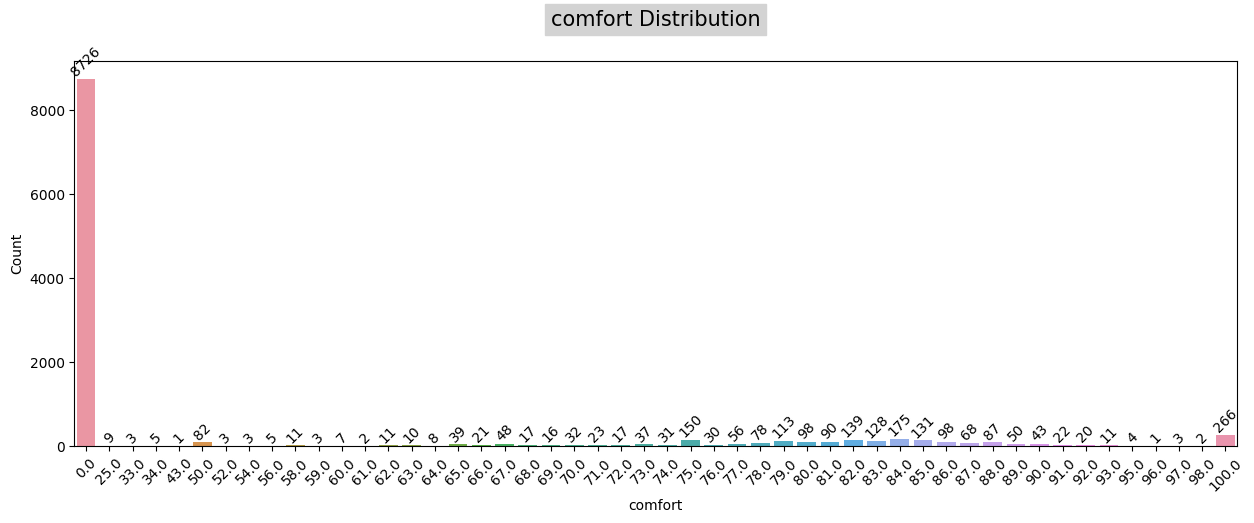

In [ ]:
# Count plot for the 'comfort' variable
plt.figure(figsize=(15, 5))
sns.set_palette('copper_r')
ax = sns.countplot(x="comfort", data=df)
for i in ax.containers:
    ax.bar_label(i, rotation=45)

ax.set(xlabel="comfort", ylabel="Count")
ax.set_title("comfort Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'comfort'
comfort_counts = df["comfort"].value_counts()
print(comfort_counts)

plt.show()

* The 'comfort' column displays a range of comfort ratings, with a significant number of shoes having a comfort rating of 0.0. Additionally, there are shoes with higher comfort ratings, including a peak at 100.0. The distribution includes various comfort ratings, with notable occurrences at 84.0, 75.0, 82.0, and 85.0.

**size:-**

0.0      6186
60.0     2465
50.0      691
51.0      222
53.0      135
47.0      123
48.0      108
49.0       99
52.0       85
54.0       82
46.0       79
44.0       75
80.0       62
55.0       56
41.0       45
56.0       42
57.0       42
45.0       41
75.0       38
43.0       38
25.0       37
40.0       36
42.0       31
67.0       26
38.0       24
58.0       19
100.0      17
62.0       17
63.0       14
34.0       12
59.0       11
69.0       10
37.0       10
17.0       10
65.0        9
61.0        9
20.0        8
29.0        6
12.0        5
39.0        3
68.0        2
32.0        2
30.0        1
Name: size, dtype: int64


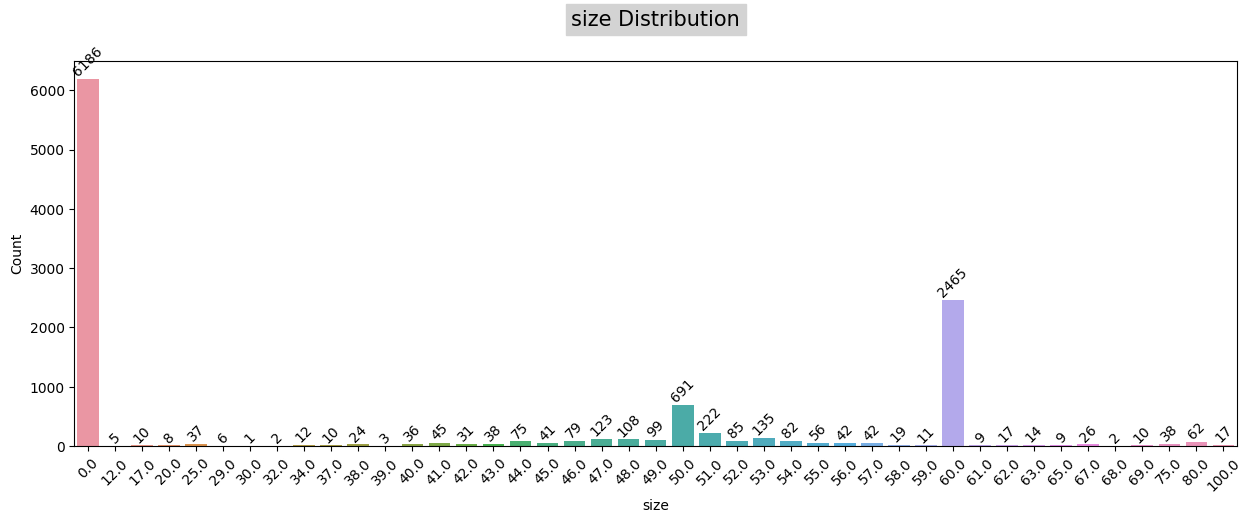

In [ ]:
# Count plot for the 'size' variable
plt.figure(figsize=(15, 5))
sns.set_palette('copper')
ax = sns.countplot(x="size", data=df)
for i in ax.containers:
    ax.bar_label(i, rotation=45)

ax.set(xlabel="size", ylabel="Count")
ax.set_title("size Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'size'
size_rating_counts = df["size"].value_counts()
print(size_rating_counts)

plt.show()

* The 'size' column represents size ratings for shoes, with the most common rating being 0.0. A rating of 0.0 signifies that the data is unavailable on the respective websites, and in some cases, the categorization for shoe size ratings are missing or undefined.

* The dataset includes a range of size ratings, such as 60.0, 50.0, 51.0, and others. These size ratings likely correspond to different categories, such as small, regular, and so on, rather than numerical shoe sizes.

**size_count:-**

5.0     4321
6.0     1791
1.0     1081
2.0      979
4.0      846
3.0      801
7.0      482
13.0     201
12.0     110
11.0      95
9.0       61
8.0       60
10.0      51
17.0      45
15.0      45
14.0      25
16.0      17
18.0      15
19.0       3
21.0       2
20.0       2
Name: size_count, dtype: int64


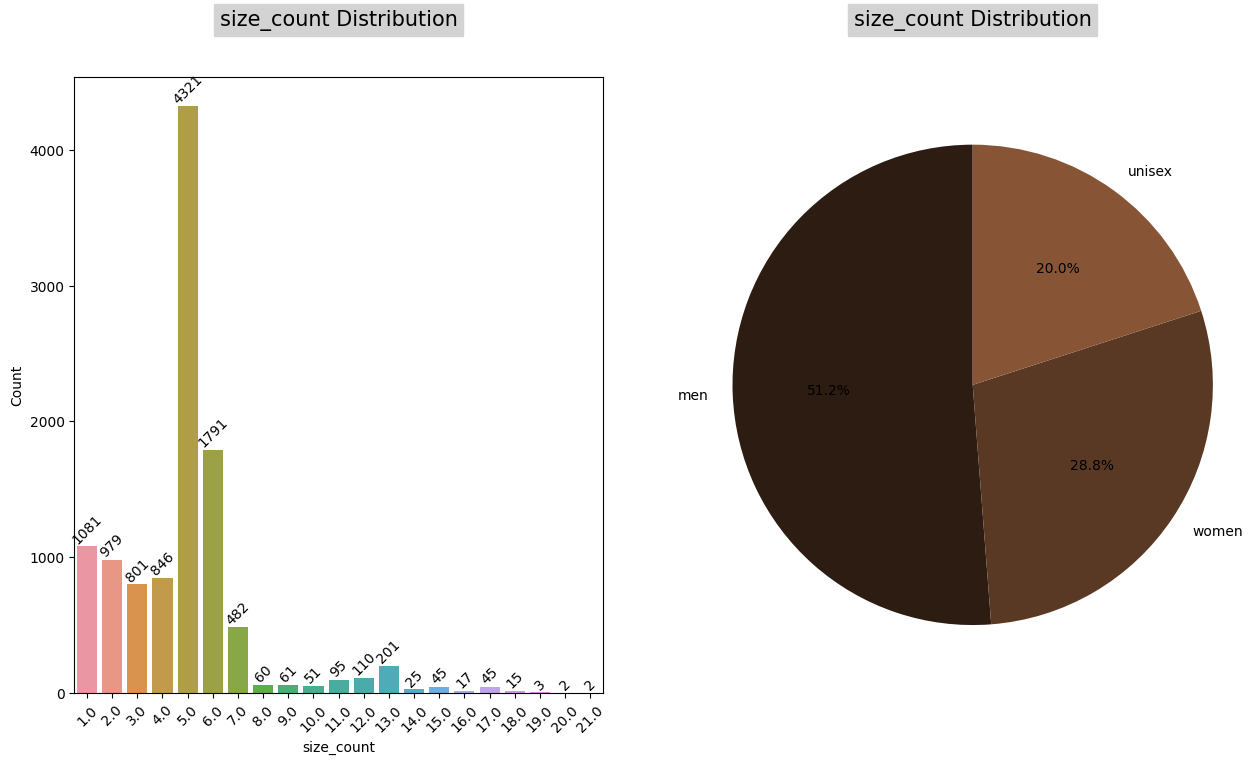

In [ ]:
# Count plot for the 'size_count' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.set_palette('PiYG_r')
sns.countplot(x="size_count", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="size_count", ylabel="Count")
ax1.set_title("size_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'size_count'
size_counts = df["size_count"].value_counts()
print(size_counts)

# Count plot for the 'size_count' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("size_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()

* The majority of 'size_count' data are falling into the range of 0.0 to 7.0.

* Size 0.0 is the most common, occurring 3230 times, followed by size 6.0 with 1791 occurrences and size 5.0 with 1091 occurrences.

* The distribution continues with sizes 1.0 to 7.0, and there are fewer instances of larger sizes, with sizes 13.0, 12.0, and 11.0 having 201, 110, and 95 occurrences, respectively.

**color_count:-**

2.0     3241
3.0     2602
1.0     1596
4.0     1253
5.0      717
6.0      549
8.0      390
7.0      320
15.0     165
9.0       80
11.0      40
10.0      39
12.0      19
14.0      15
13.0       7
Name: color_count, dtype: int64


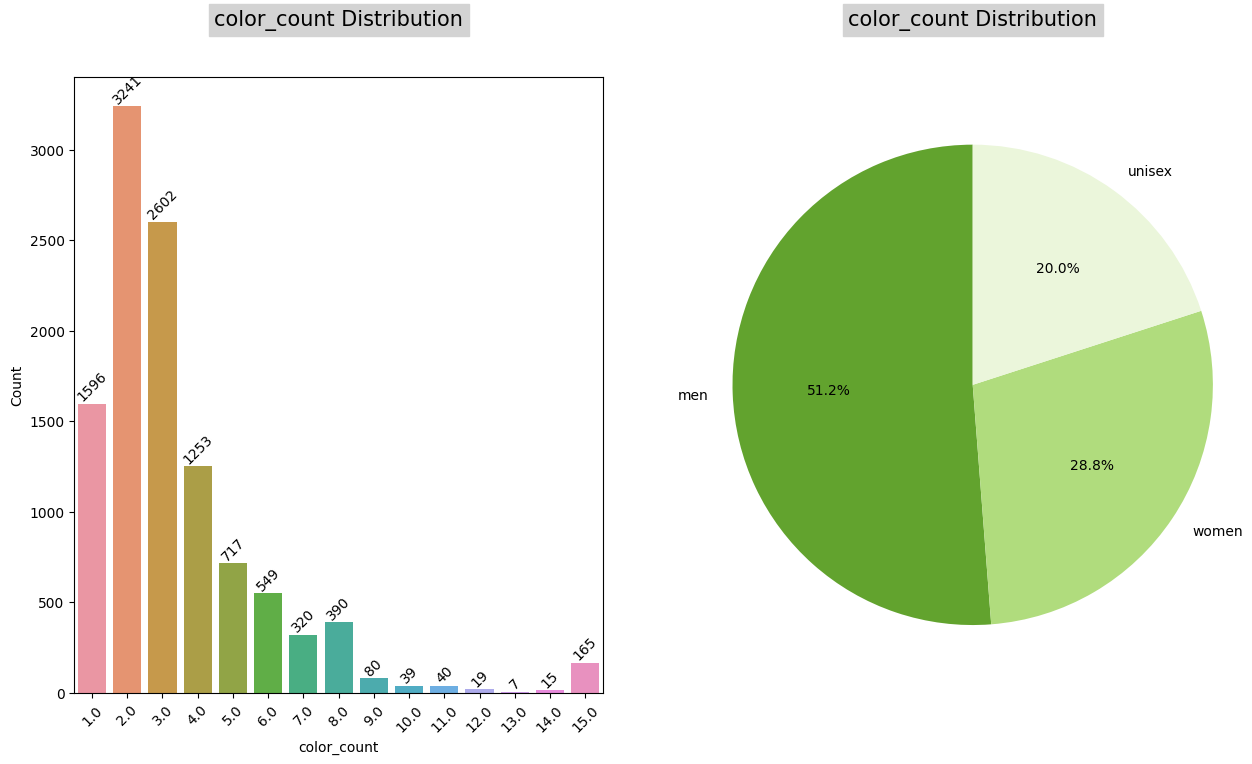

In [ ]:
# Count plot for the 'color_count' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.set_palette('hot_r')
sns.countplot(x="color_count", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="color_count", ylabel="Count")
ax1.set_title("color_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'color_count'
color_counts = df["color_count"].value_counts()
print(color_counts)

# Count plot for the 'color_count' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("color_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()

* Color category 2 has the highest occurrence, appearing 3241 times, followed by category 3 with 2580 occurrences and category 1 with 1596 occurrences.

* The distribution continues with colors 4 to 15, where the frequency gradually decreases. Colors 13, 12, 14, and 15 have relatively lower occurrences, each appearing only a few times in the dataset.

**brand:-**

Puma        3434
skechers    2537
adidas      2030
Woodland    1990
Nike         908
columbia     134
Name: brand, dtype: int64


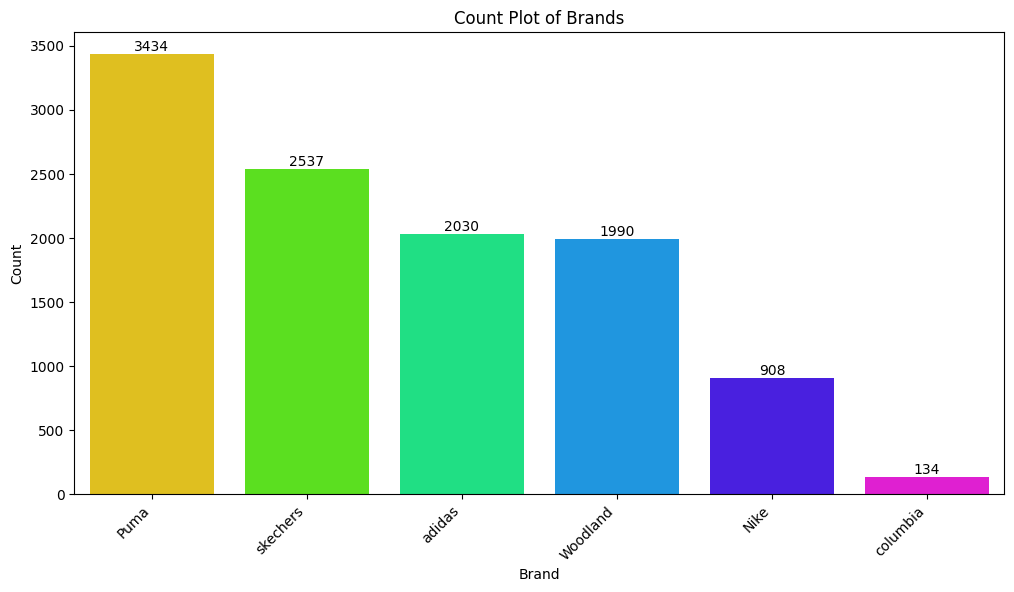

In [ ]:
# count plot for 'brand' variable
plt.figure(figsize=(12, 6))
ax=sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index, palette='hsv')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count Plot of Brands')

# Unique value_counts for column 'brand'
brand_counts = df["brand"].value_counts()
print(brand_counts)

plt.show()

* The brand distribution in the dataset is led by Puma, which has the highest frequency of 3434 occurrences. Skechers and Adidas follow with 2537 and 2030 occurrences, respectively. Woodland and Nike also contribute significantly, with 1990 and 908 occurrences, while Columbia is less represented with 134 occurrences.

**color_1:-**

Puma Black-Puma White                    1920
BLACK                                     234
PUMA Black-PUMA White                     196
CAMEL                                     188
BBLACK                                    154
                                         ... 
Black, Owl                                  1
Wonder Blue / Chalk White / Blue Dawn       1
WHITE/PURPLE                                1
GGREEN                                      1
BLACK/WHITE/LIME                            1
Name: color_1, Length: 1166, dtype: int64


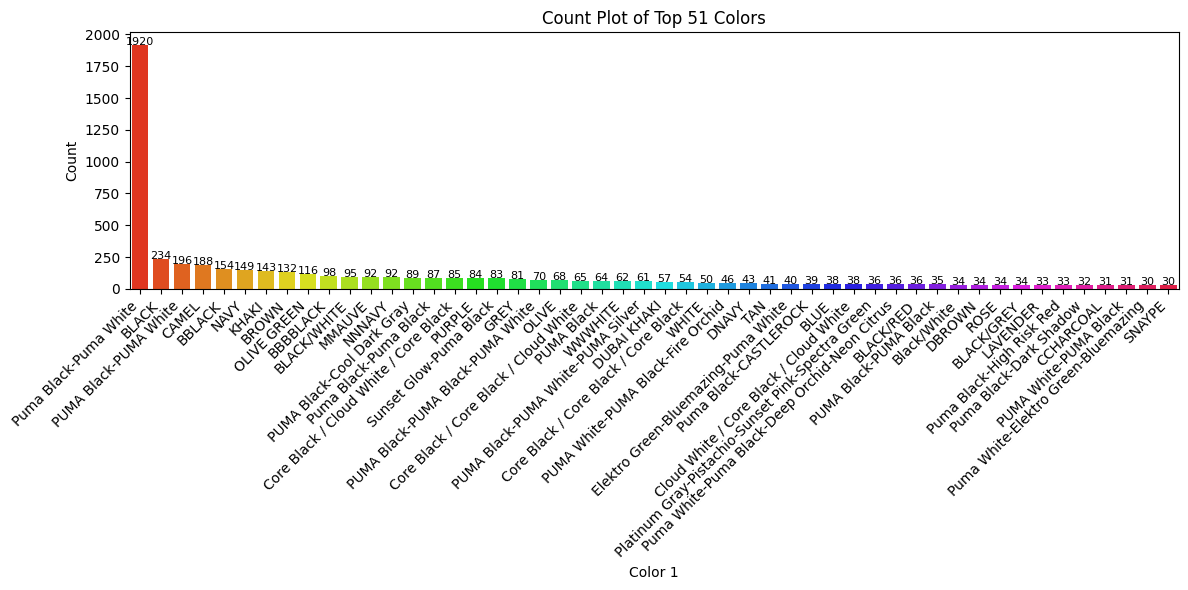

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='color_1', order=df['color_1'].value_counts().index[:50], palette='hsv')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Color 1')
plt.ylabel('Count')
plt.title('Count Plot of Top 51 Colors')

# Unique value_counts for column 'color_1'
color_counts = df["color_1"].value_counts()
print(color_counts)

plt.tight_layout()
plt.show()

* The 'color_1' column exhibits a diverse range of colors, with "Puma Black-Puma White" being the most prevalent (1920 occurrences).

* Other common colors include "BLACK" (234 occurrences) and "PUMA Black-PUMA White" (196 occurrences). The dataset comprises a total of 1166 unique color categories, indicating a broad representation of colors.


**color_2:-**

CAMEL                                    1871
BLACK                                     246
Peacoat-Puma White                        187
MMAUVE                                    180
NNNAVY                                    180
                                         ... 
TEAL/BLACK                                  1
BROWN/ORANGE                                1
NATURAL                                     1
Wonder Blue / Chalk White / Blue Dawn       1
DARK BROWN                                  1
Name: color_2, Length: 1298, dtype: int64


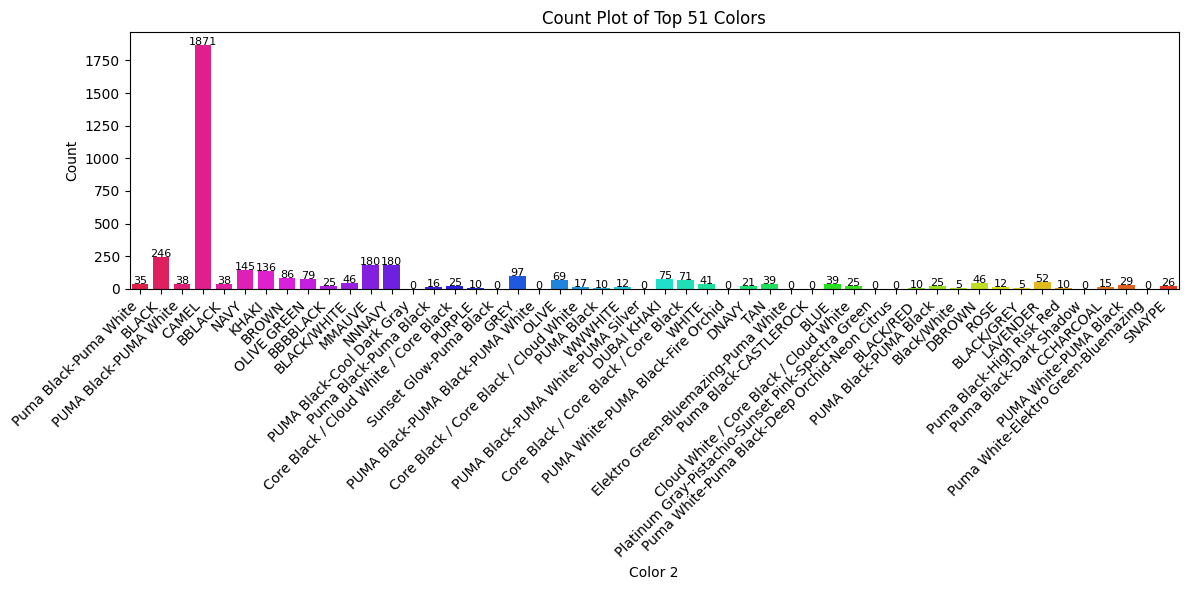

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='color_2', order=df['color_1'].value_counts().index[:50], palette='hsv_r')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Color 2')
plt.ylabel('Count')
plt.title('Count Plot of Top 51 Colors')

# Unique value_counts for column 'color_2'
color_counts = df["color_2"].value_counts()
print(color_counts)

plt.tight_layout()
plt.show()

* The most frequently occurring color in the dataset is "CAMEL" with a count of 1871.

* "BLACK" is another common color, appearing 246 times.

* The dataset encompasses a variety of color names, with 1298 unique color categories.

* Colors such as "Peacoat-Puma White," "MMAUVE," and "NNNAVY" occur with similar frequencies (187, 180, and 180 occurrences, respectively).

**color3:-**

Puma Black-High Risk Red                 5009
BLACK                                     139
CAMEL                                     127
BBLACK                                    117
KHAKI                                      99
                                         ... 
Wonder Blue / Chalk White / Blue Dawn       1
CHARCOAL/CORAL                              1
LIGHT GREY/BLACK                            1
CHOCOLATE/MULTI                             1
CHARCOAL/BLACK                              1
Name: color_3, Length: 721, dtype: int64


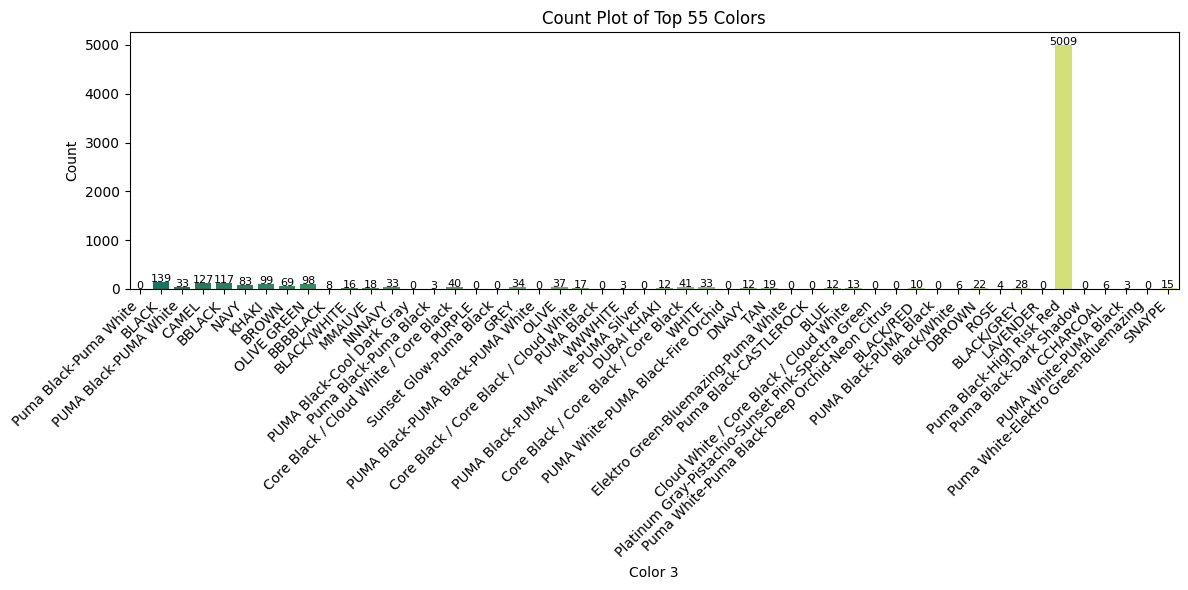

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='color_3', order=df['color_1'].value_counts().index[:50], palette='summer')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Color 3')
plt.ylabel('Count')
plt.title('Count Plot of Top 55 Colors')

# Unique value_counts for column 'color_2'
color_counts = df["color_3"].value_counts()
print(color_counts)

plt.tight_layout()
plt.show()

* "Puma Black-High Risk Red" stands out with 5009 occurrences.

* "BLACK," "CAMEL," and "BBLACK" are frequent, with 139, 127, and 117 occurrences, respectively.

* The dataset comprises 721 unique color categories.

* Many colors occur infrequently, each with a count of 1, indicating a long tail in the distribution.

### **Bivariant Analysis**

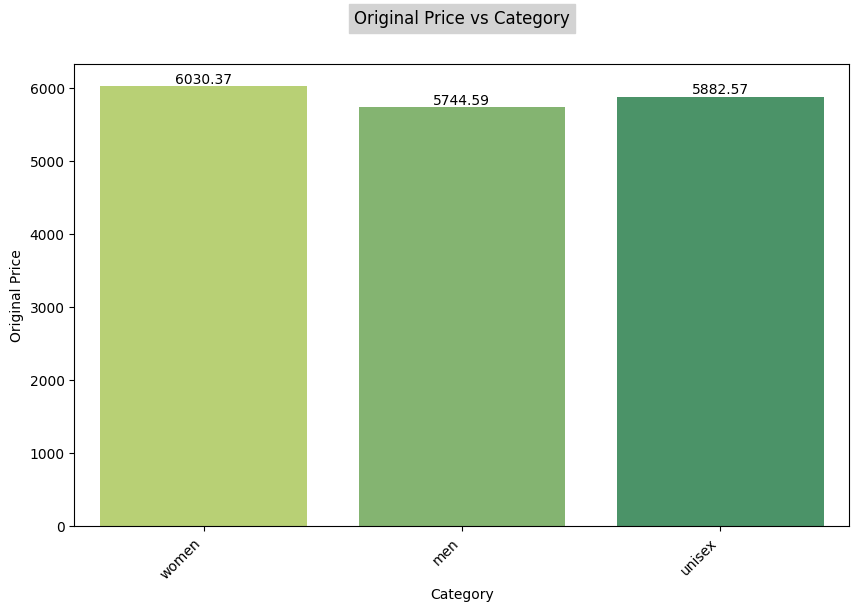

In [ ]:
# bar plot to show the average original price for each category
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='category', y='original_price', data=df, errorbar=None, palette='summer_r')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Original Price vs Category', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

* Women's shoes have the highest average price at 6030.37.
* Men's shoes follow with a slightly lower average price of 5744.59.
* Unisex shoes have the lowest average price at 5882.57.

* The observed price variations among shoe categories, particularly the higher average price for women's shoes, indicate potential distinctions in consumer preferences, market positioning, and factors such as design and brand appeal.

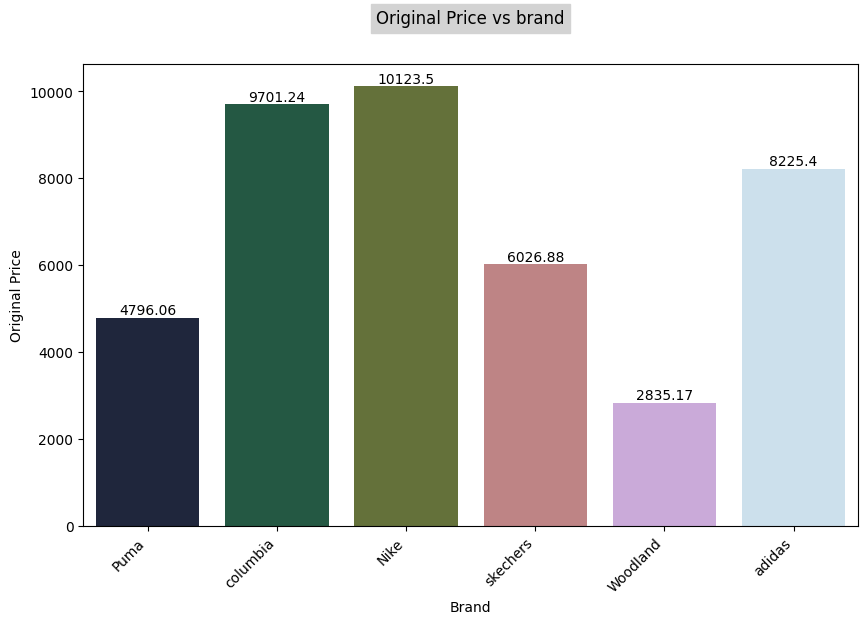

In [ ]:
# bar plot to show the average original price for each brand
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='brand', y='original_price', data=df, ci=None, palette='cubehelix')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Original Price vs brand', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Brand')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

* Nike has the highest average original price at 10,123.50, indicating a premium brand positioning.

* Columbia follows closely at 9,701.24, likely offering specialized outdoor footwear.

* Adidas maintains a strong presence with an average price of 8,225.40.

* Skechers positions itself more moderately at 6,026.88, appealing to a broader consumer base.

* Puma is in a lower price range with an average of 4,796.06, while Woodland has the lowest average price at 2,835.17, targeting budget-conscious consumers.

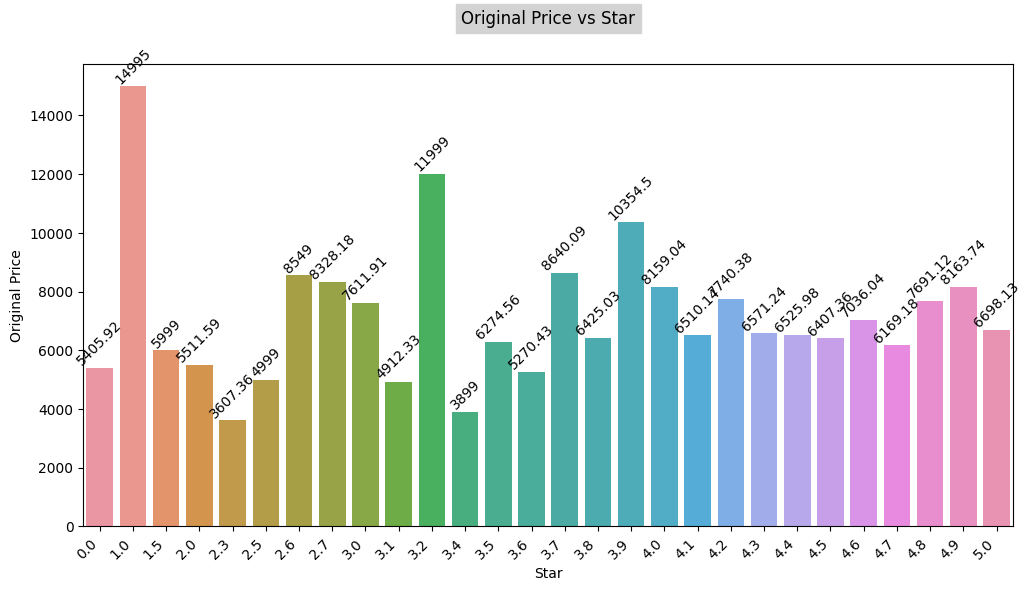

In [ ]:
# bar plot to show the average original price for each star
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='star', y='original_price', data=df, ci=None)
for i in ax.containers:
    ax.bar_label(i, rotation=45)
plt.title('Original Price vs Star', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Star')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

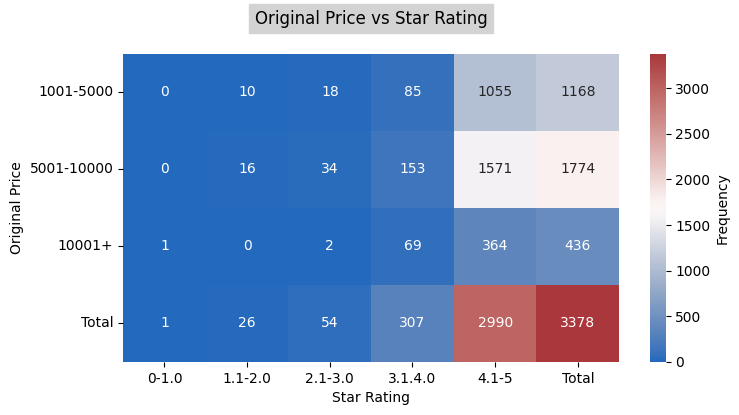

In [ ]:
# cross-tabulation repersentation for original_price Vs star
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
star_bins = pd.cut(df['star'], bins=[0, 1, 2, 3, 4, 5, float('inf')], labels=['0-1.0', '1.1-2.0', '2.1-3.0', '3.1.4.0', '4.1-5', '5+'])

cross_tab = pd.crosstab(price_bins, star_bins, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='vlag', cbar_kws={'label': 'Frequency'})

plt.title('Original Price vs Star Rating', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Star Rating')
plt.ylabel('Original Price')
plt.show()

* Most products are in the '1001-5000' and '5001-10000' price ranges.
* Fewer products are in the '10001+' price range.
* Star ratings are concentrated in the '3.1-4.0' and '4.1-5' ranges.
* Lower star ratings ('0-1.0' and '1.1-2.0') are less common.
* Higher-priced products tend to have higher star ratings, particularly in the '4.1-5' range.
* The '4.1-5' range is prominent across different price categories, indicating a positive correlation between price and star rating.

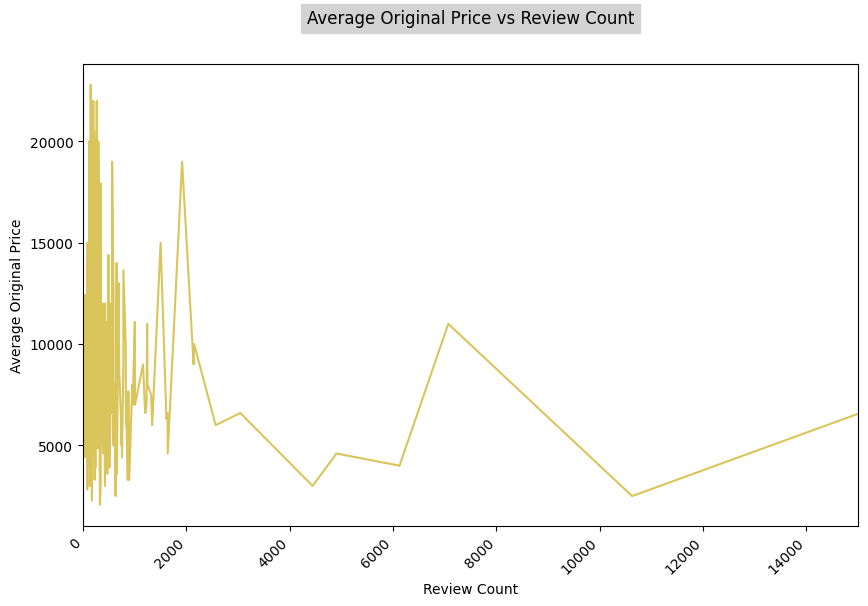

In [ ]:
# Line plot to show the average original price for each review count
plt.figure(figsize=(10, 6))
sns.set_palette('cividis_r')
sns.lineplot(x='review_count', y='original_price', data=df, ci=None)
plt.title('Average Original Price vs Review Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Review Count')
plt.ylabel('Average Original Price')
plt.xlim(0, 15000)
plt.xticks(rotation=45, ha='right')
plt.show()

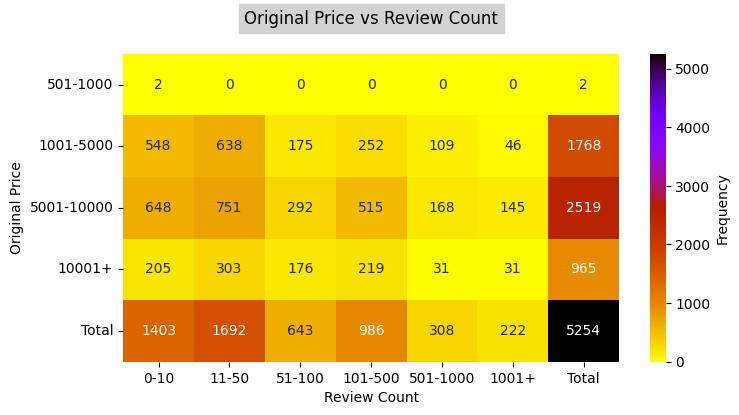

In [ ]:
# cross-tabulation repersentation for original_price Vs review_count
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
review_bins = pd.cut(df['review_count'], bins=[0, 10, 50, 100, 500, 1000, float('inf')], labels=['0-10', '11-50', '51-100', '101-500', '501-1000', '1001+'])

cross_tab_review = pd.crosstab(price_bins, review_bins, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab_review, annot=True, fmt='d', cmap='gnuplot_r', cbar_kws={'label': 'Frequency'})

plt.title('Original Price vs Review Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Review Count')
plt.ylabel('Original Price')
plt.show()


* The majority of products fall within the '1001-5000' and '5001-10000' price ranges. Review counts are concentrated in the '11-50' and '51-100' categories.
* Higher-priced ranges tend to have higher review counts, while lower-priced ranges, particularly '501-1000', have fewer reviews.
* Overall, there is a positive association between higher price ranges and higher review counts.

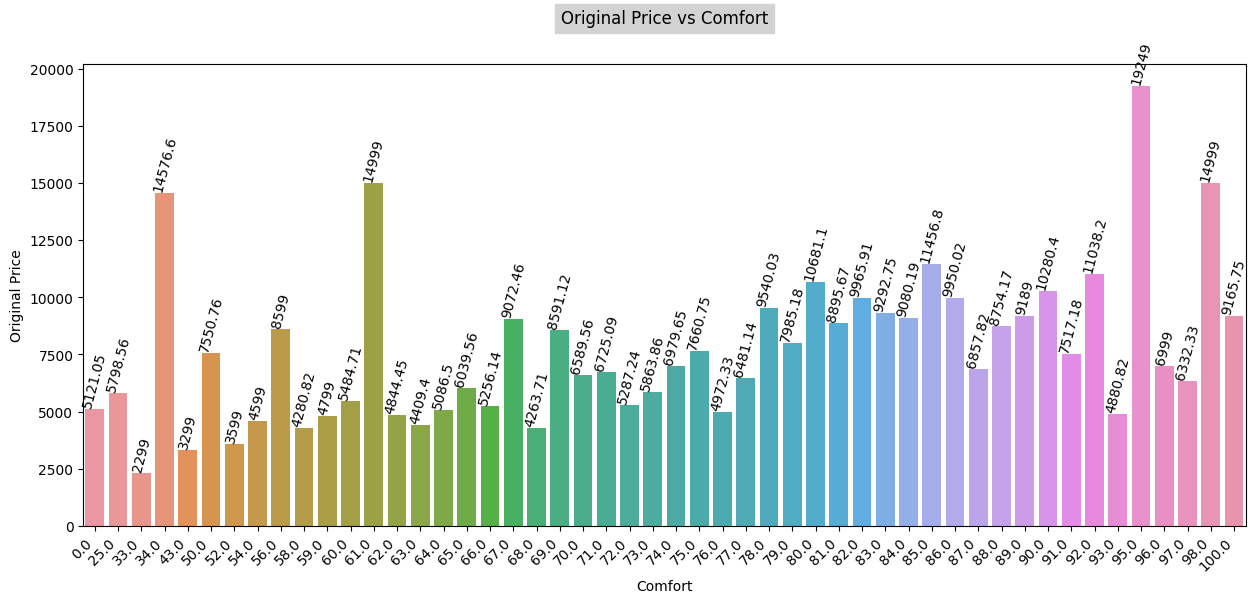

In [ ]:
# Bar plot to show the average original price for each comfort level
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='comfort', y='original_price', data=df, ci=None)
for i in ax.containers:
    ax.bar_label(i, rotation=75)
plt.title('Original Price vs Comfort', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Comfort')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

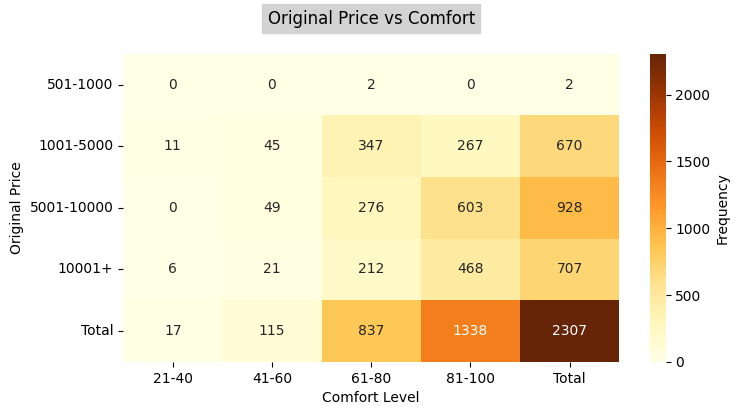

In [ ]:
# Cross-tabulation representation for original_price vs comfort
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
comfort_levels = pd.cut(df['comfort'], bins=[0, 20, 40, 60, 80, 100, float('inf')], labels=['0-20', '21-40', '41-60', '61-80', '81-100', '100+'])

cross_tab_comfort = pd.crosstab(price_bins, comfort_levels, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab_comfort, annot=True, fmt='d', cmap='YlOrBr', cbar_kws={'label': 'Frequency'})

plt.title('Original Price vs Comfort', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Comfort Level')
plt.ylabel('Original Price')
plt.show()

* The '61-80' and '81-100' comfort levels are more prevalent across all price ranges, with the highest total count in the '81-100' category.
* In the '501-1000' price range, there are only two products, both falling into the '61-80' and '81-100' comfort levels.
* Higher-priced products tend to have a larger proportion in the '61-80' and '81-100' comfort levels.

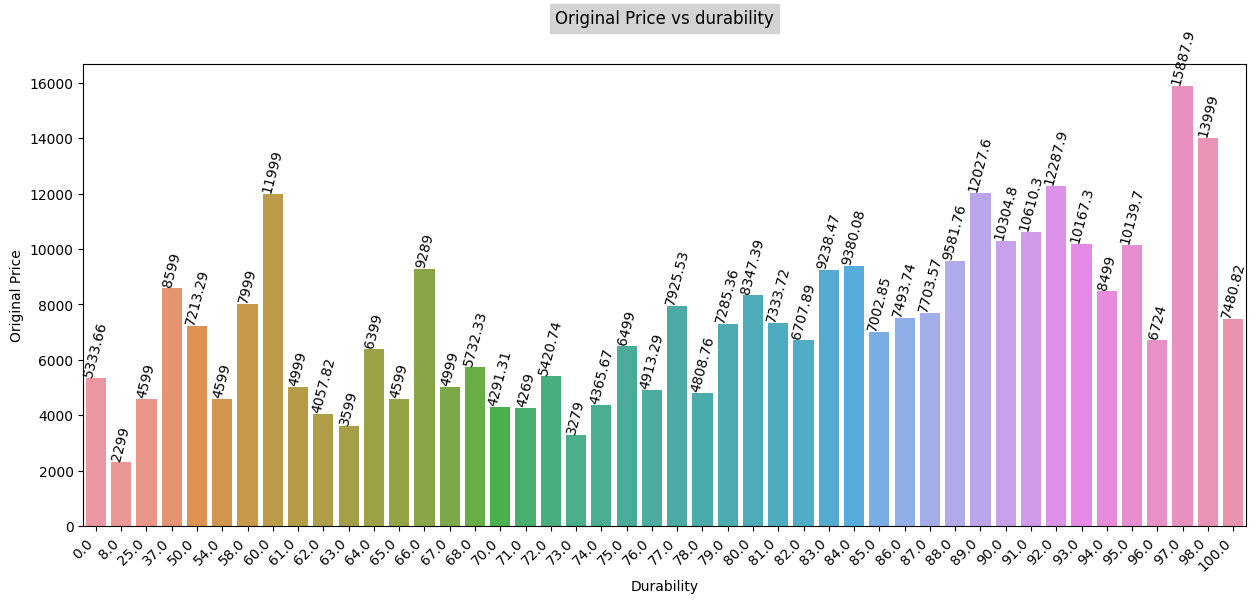

In [ ]:
# Bar plot to show the average original price for each durability level
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='durability', y='original_price', data=df, ci=None)
for i in ax.containers:
    ax.bar_label(i, rotation=75)
plt.title('Original Price vs durability', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Durability')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

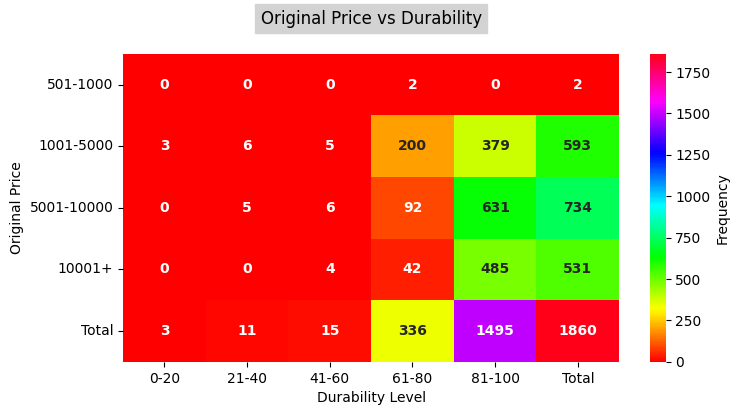

In [ ]:
# Cross-tabulation representation for original_price vs durability
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
durability_levels = pd.cut(df['durability'], bins=[0, 20, 40, 60, 80, 100, float('inf')], labels=['0-20', '21-40', '41-60', '61-80', '81-100', '100+'])

cross_tab_durability = pd.crosstab(price_bins, durability_levels, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab_durability, annot=True, fmt='d', cmap='hsv', cbar_kws={'label': 'Frequency'}, annot_kws={'weight': 'bold'})

plt.title('Original Price vs Durability', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Durability Level')
plt.ylabel('Original Price')
plt.show()

* The '81-100' durability level dominates across all price ranges, with the highest total count.
* Higher-priced products, especially in the '5001-10000' and '10001+' ranges, tend to have a larger proportion in the '81-100' durability level.

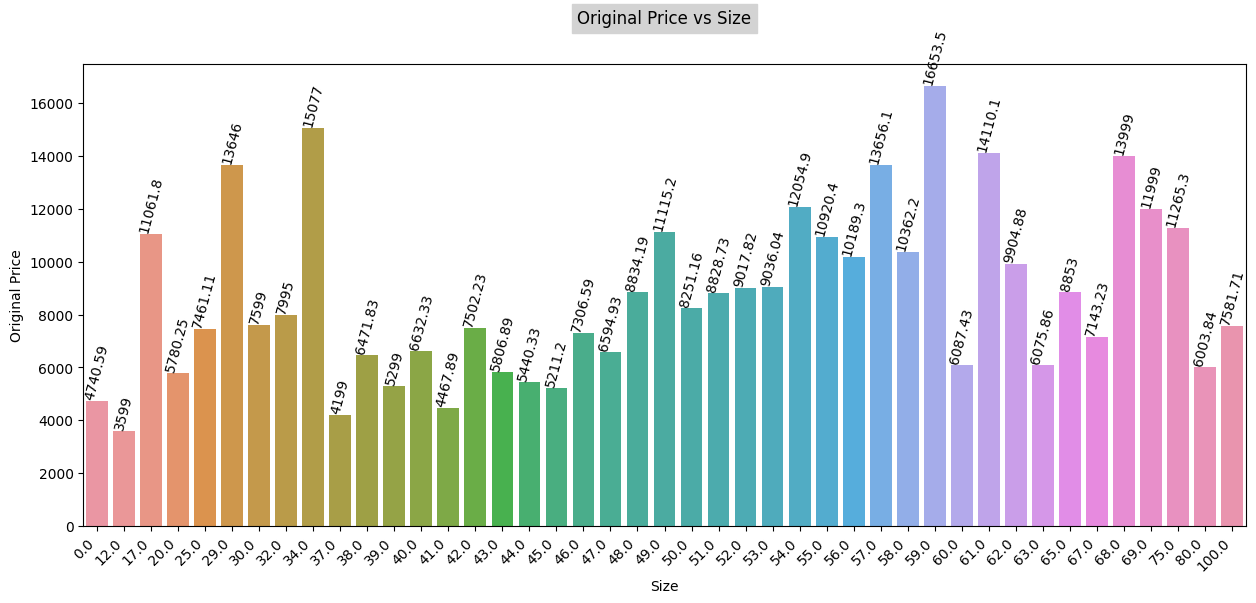

In [ ]:
# Bar plot to show the average original price for each size
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='size', y='original_price', data=df, ci=None)

for i in ax.containers:
    ax.bar_label(i, rotation=75)

plt.title('Original Price vs Size', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Size')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

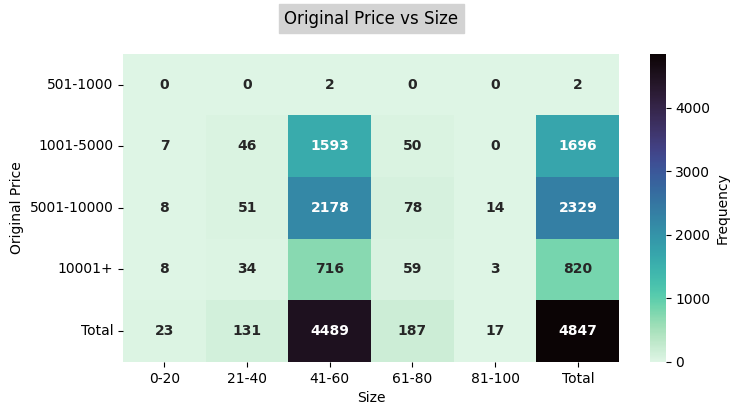

In [ ]:
# Cross-tabulation representation for original_price vs size
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
size_levels = pd.cut(df['size'], bins=[0, 20, 40, 60, 80, 100, float('inf')], labels=['0-20', '21-40', '41-60', '61-80', '81-100', '100+'])

cross_tab_size = pd.crosstab(price_bins, size_levels, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab_size, annot=True, fmt='d', cmap='mako_r', cbar_kws={'label': 'Frequency'}, annot_kws={'weight': 'bold'})

plt.title('Original Price vs Size', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Size')
plt.ylabel('Original Price')
plt.show()

* The '41-60' size level dominates across all price ranges, with the highest total count.
* The '21-40' size level also has a significant presence, especially in the higher price ranges.
* In the '501-1000' price range, there are only two products, both falling into the '41-60' size level.
* In the '1001-5000' price range, the '41-60' size level has the highest count, followed by the '21-40' level.
* In the '5001-10000' price range, the '41-60' size level dominates, with a total count of 2178.
* In the '10001+' price range, the '41-60' size level also dominates, with a total count of 716.

* Higher-priced products tend to have a larger proportion in the '41-60' size level.

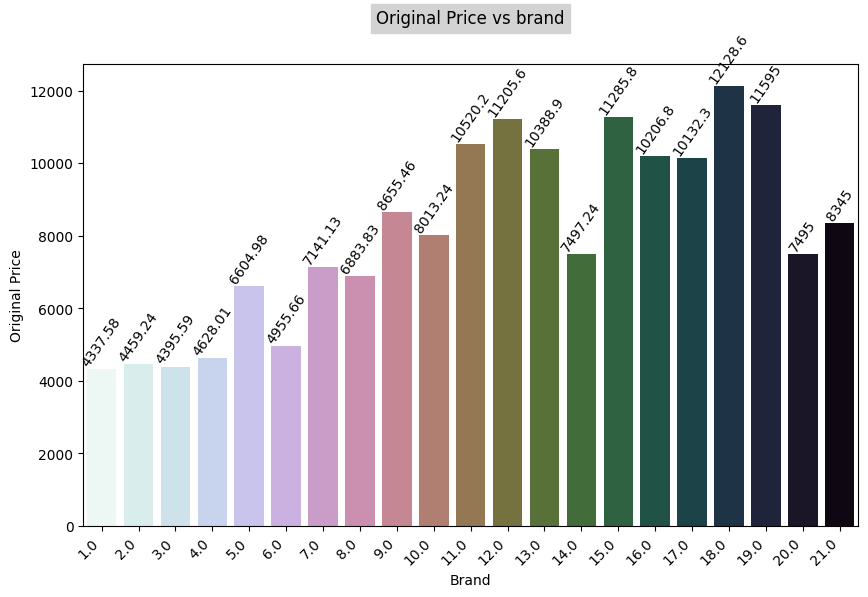

In [ ]:
# bar plot to show the average original price for each size_count
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='size_count', y='original_price', data=df, ci=None, palette='cubehelix_r')
for i in ax.containers:
    ax.bar_label(i, rotation=55)
plt.title('Original Price vs brand', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Brand')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

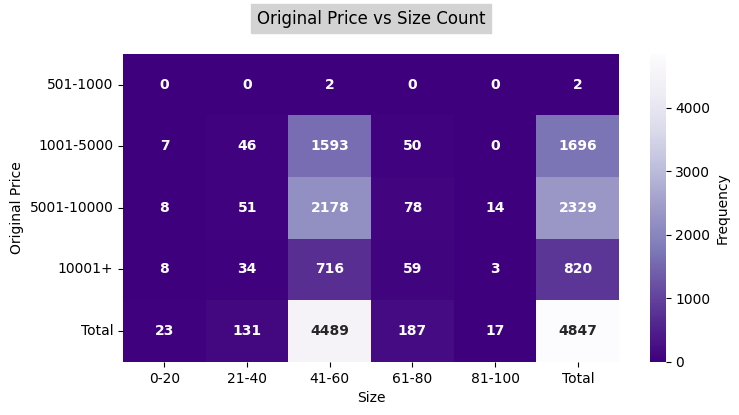

In [ ]:
# Cross-tabulation representation for original_price vs size
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
size_levels = pd.cut(df['size_count'], bins=[0, 5, 10, 15, 20, 25, float('inf')], labels=['0-5', '6-10', '11-15', '16-20', '21-25', '25+'])

cross_tab_size_count = pd.crosstab(price_bins, size_levels, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab_size, annot=True, fmt='d', cmap='Purples_r',cbar_kws={'label': 'Frequency'}, annot_kws={'weight': 'bold'})

plt.title('Original Price vs Size Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Size')
plt.ylabel('Original Price')
plt.show()

* Majority of products in the '101-500' and '501-1000' price ranges have a '0-5' size count.
* In the '1001-5000' range, a significant number of products have '0-5' and '6-10' size counts.
* '5001-10000' range shows varied size counts, with a notable presence in '0-5' and '6-10'.
* '10001+' range exhibits diverse size counts, with a significant number in '0-5', '6-10', and '11-15'.


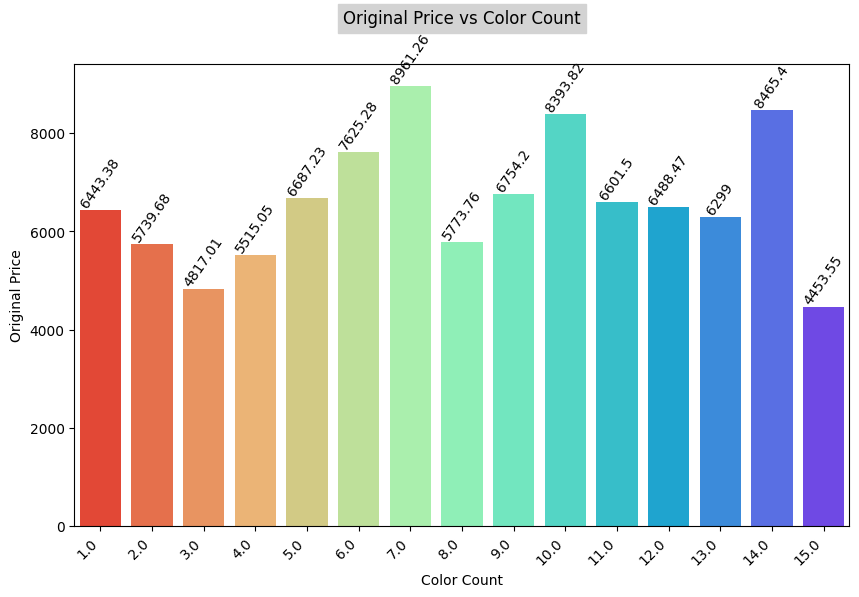

In [ ]:
# bar plot to show the average original price for each color_count
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='color_count', y='original_price', data=df, ci=None, palette='rainbow_r')
for i in ax.containers:
    ax.bar_label(i, rotation=55)
plt.title('Original Price vs Color Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Color Count')
plt.ylabel('Original Price')
plt.xticks(rotation=45, ha='right')
plt.show()

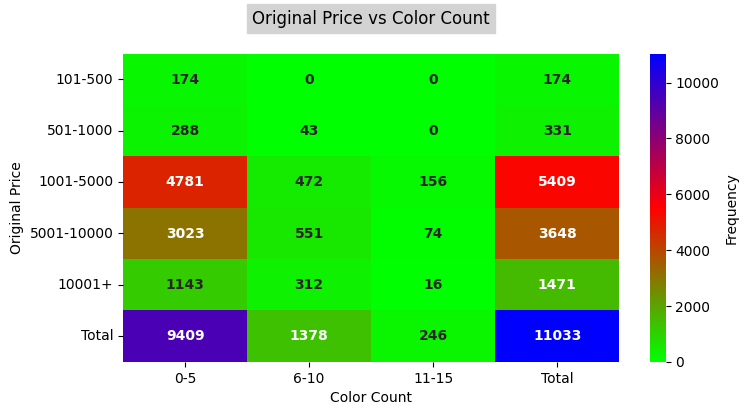

In [ ]:
# Cross-tabulation representation for original_price vs color_count
price_bins = pd.cut(df['original_price'], bins=[0, 100, 500, 1000, 5000, 10000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+'])
color_levels = pd.cut(df['color_count'], bins=[0, 5, 10, 15, 20, 25, float('inf')], labels=['0-5', '6-10', '11-15', '16-20', '21-25', '25+'])

cross_tab_color_count = pd.crosstab(price_bins, color_levels, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab_color_count, annot=True, fmt='d', cmap='brg_r', cbar_kws={'label': 'Frequency'}, annot_kws={'weight': 'bold'})

plt.title('Original Price vs Color Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Color Count')
plt.ylabel('Original Price')
plt.show()

* Most products in all price ranges have a 'Color Count' of 0-5.
* Higher-priced shoes exhibit a decrease in the count of items with 'Color Count' 0-5, indicating more color variations at higher prices.
* The '1001-5000' range shows significant color count variability, with some products having a higher count in the 11-15 range.

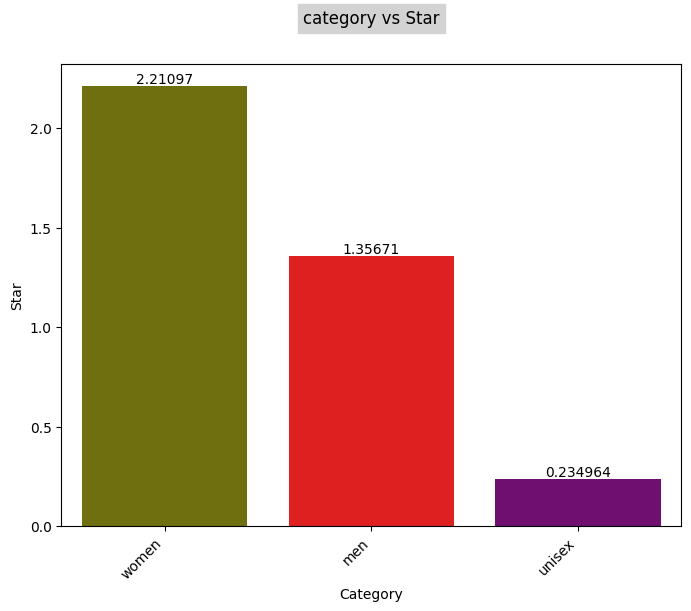

In [ ]:
# bar plot to show the average star (star_rating) for each category
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='category', y='star', data=df, errorbar=None, palette='brg_r')
for i in ax.containers:
    ax.bar_label(i)

plt.title('category vs Star', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('Star')
plt.xticks(rotation=45, ha='right')
plt.show()

* Women's shoes (2.21097) have a higher average star rating compared to men's shoes (1.35671) and unisex shoes (0.234964).
* The star rating follows a descending order: women's > men's > unisex, suggesting potential differences in customer satisfaction or product quality across these categories.

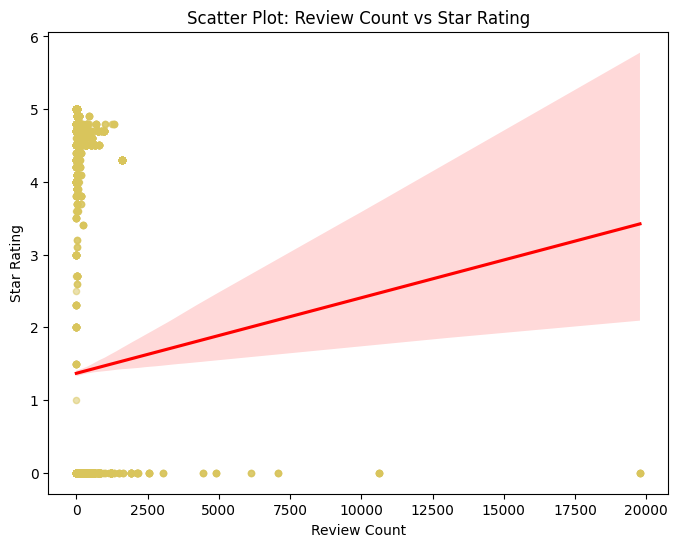

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='review_count', y='star', data=df, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Review Count vs Star Rating')
plt.xlabel('Review Count')
plt.ylabel('Star Rating')
plt.show()

Review count and Star Rating hoding a positive correlation.

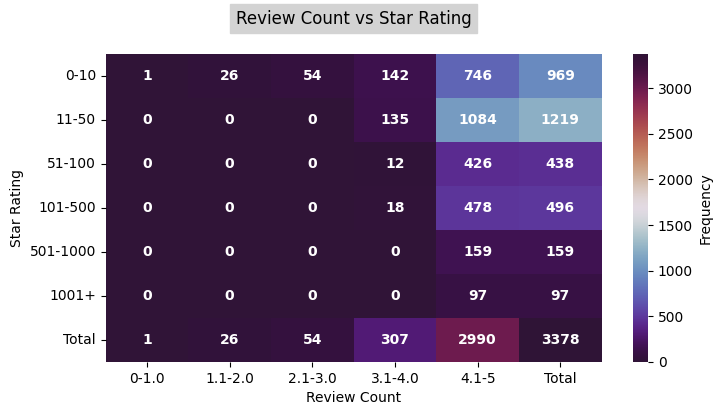

In [ ]:
# Cross-tabulation representation for review_count vs star
review_bins = pd.cut(df['review_count'], bins=[0, 10, 50, 100, 500, 1000, float('inf')], labels=['0-10', '11-50', '51-100', '101-500', '501-1000', '1001+'])
star_bins = pd.cut(df['star'], bins=[0, 1, 2, 3, 4, 5, float('inf')], labels=['0-1.0', '1.1-2.0', '2.1-3.0', '3.1-4.0', '4.1-5', '5+'])

cross_tab = pd.crosstab(review_bins, star_bins, margins=True, margins_name='Total')

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='twilight_shifted', cbar_kws={'label': 'Frequency'}, annot_kws={'weight': 'bold'})

plt.title('Review Count vs Star Rating', backgroundcolor='lightgray', y=1.07)
plt.ylabel('Star Rating')
plt.xlabel('Review Count')
plt.show()


* The majority of reviews (2990 out of 3378) fall within the '4.1-5' star range, indicating a general positive sentiment.

* Even in lower review count bins ('0-10' and '11-50'), a significant number of products receive high ratings ('4.1-5').

* The overall distribution is right-skewed, suggesting that most products tend to receive higher star ratings.

* The highest concentration of reviews is in the '4.1-5' star range, particularly for products with '11-50' and '51-100' reviews.

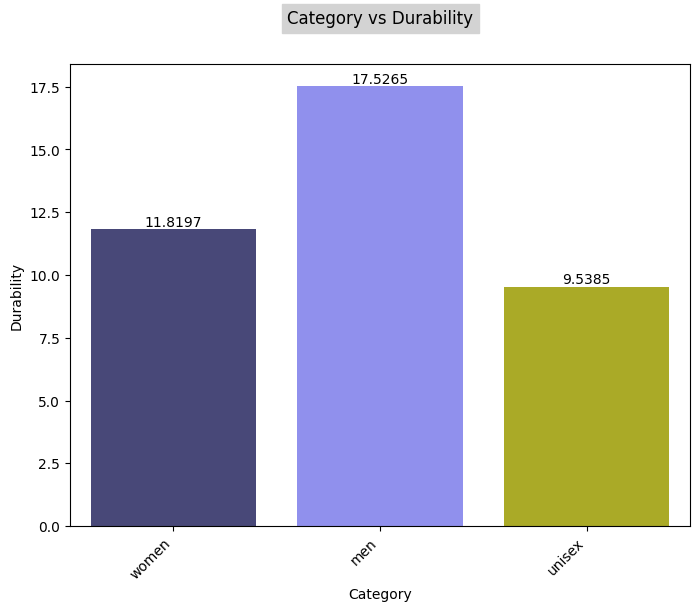

In [ ]:
# bar plot to show the average durability for each category
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='category', y='durability', data=df, errorbar=None, palette='gist_stern')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Category vs Durability', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('Durability')
plt.xticks(rotation=45, ha='right')
plt.show()

* Men's shoes have the highest average durability (17.5265), followed by women's shoes (11.8197), and unisex shoes have the lowest (9.5385).

* On average, men's shoes are perceived as more durable compared to women's shoes.

* Women's shoes have a moderate average durability.

* Unisex shoes, on average, are perceived as less durable compared to both men's and women's shoes.

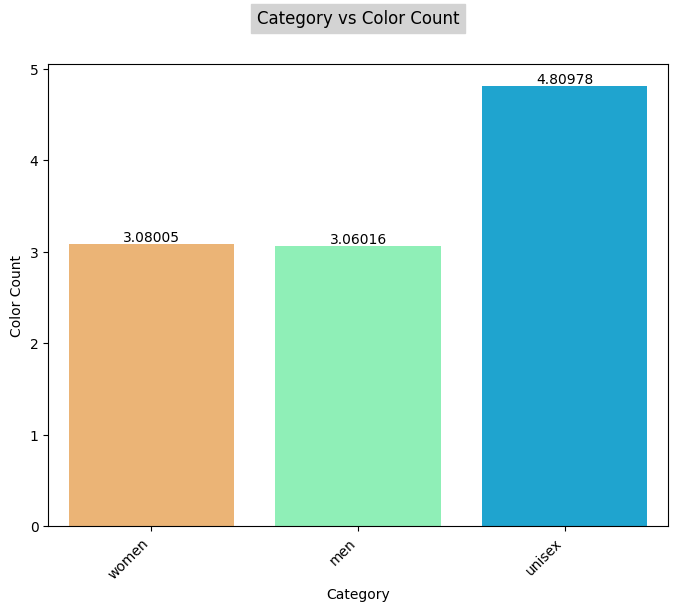

In [ ]:
# bar plot to show the average color count for each category
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='category', y='color_count', data=df, errorbar=None, palette='rainbow_r')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Category vs Color Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('Color Count')
plt.xticks(rotation=45, ha='right')
plt.show()

* The average color count for women's shoes is approximately 3.08.
* Men's shoes have an average color count of around 3.06.
* Unisex shoes exhibit a notably higher average color count, approximately 4.81.
* This suggests that, on average, unisex shoes tend to offer a more extensive variety of colors compared to both women's and men's shoes, with women's shoes having a slightly higher color count than men's shoes.

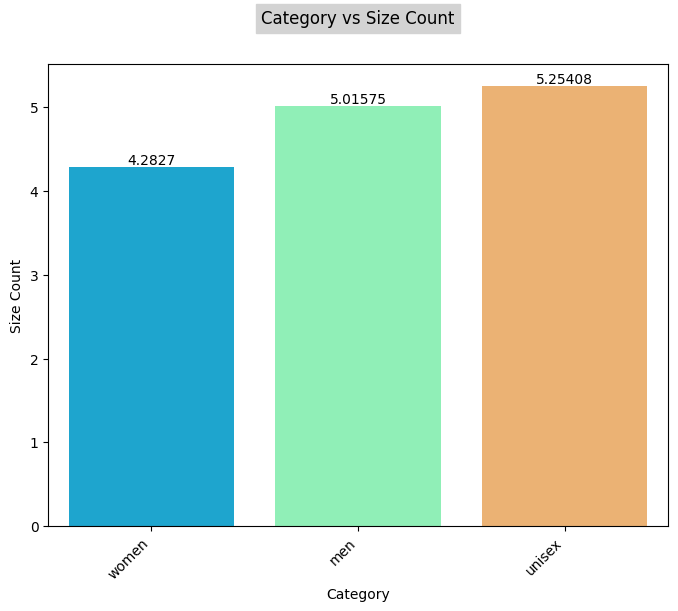

In [ ]:
# bar plot to show the average size count for each category
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='category', y='size_count', data=df, errorbar=None, palette='rainbow')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Category vs Size Count', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('Size Count')
plt.xticks(rotation=45, ha='right')
plt.show()

* The average size count for women's shoes is approximately 4.28.
* Men's shoes have an average size count of around 5.02.
* Unisex shoes exhibit the highest average size count, approximately 5.25.

* This indicates that, on average, unisex shoes tend to have a slightly larger size count compared to both women's and men's shoes, with men's shoes having a higher size count than women's shoes.

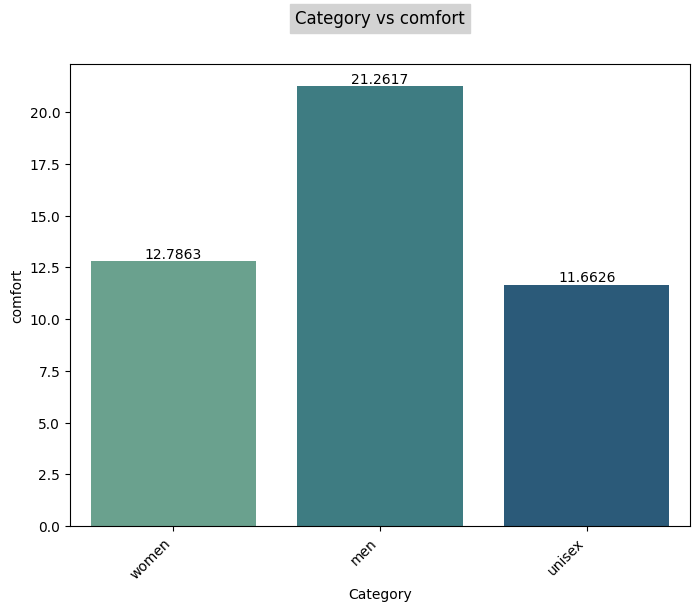

In [ ]:
# bar plot to show the average comfort for each category
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='category', y='comfort', data=df, errorbar=None, palette='crest')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Category vs comfort', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('comfort')
plt.xticks(rotation=45, ha='right')
plt.show()

* Men's shoes lead in average comfort (21.2617), followed by women's (12.7863), and unisex shoes have the lowest comfort rating (11.6626).

* Men's shoes are perceived as the most comfortable, while women's shoes offer a moderate level of comfort.

* On average, unisex shoes are perceived as less comfortable compared to both men's and women's shoes

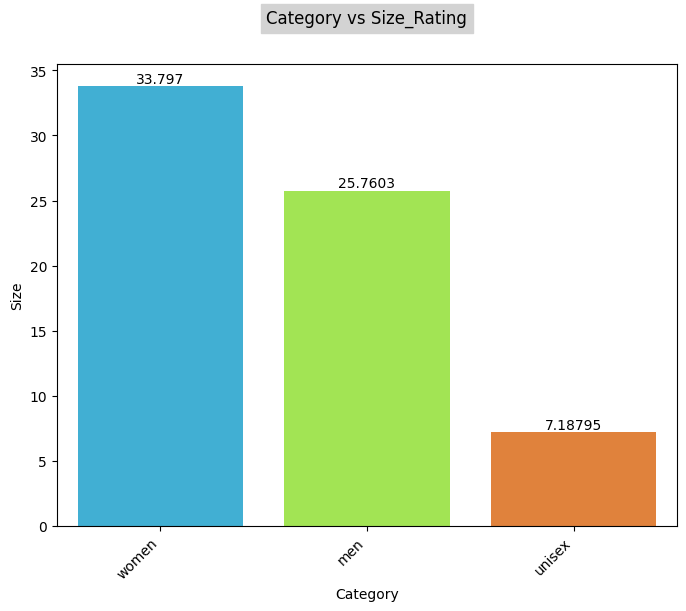

In [ ]:
# bar plot to show the average size for each category
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='category', y='size', data=df, errorbar=None, palette='turbo')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Category vs Size_Rating', backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category')
plt.ylabel('Size')
plt.xticks(rotation=45, ha='right')
plt.show()

* Women's shoes have the highest average size rating (33.797), indicating that, on average, they are perceived as having a larger size compared to men's and unisex shoes.

* Men's shoes exhibit an average size rating of 25.7603, suggesting a moderate level of perceived size.

* Unisex shoes have the lowest average size rating (7.18795), indicating that, on average, they are perceived as having a smaller size compared to both women's and men's shoes.

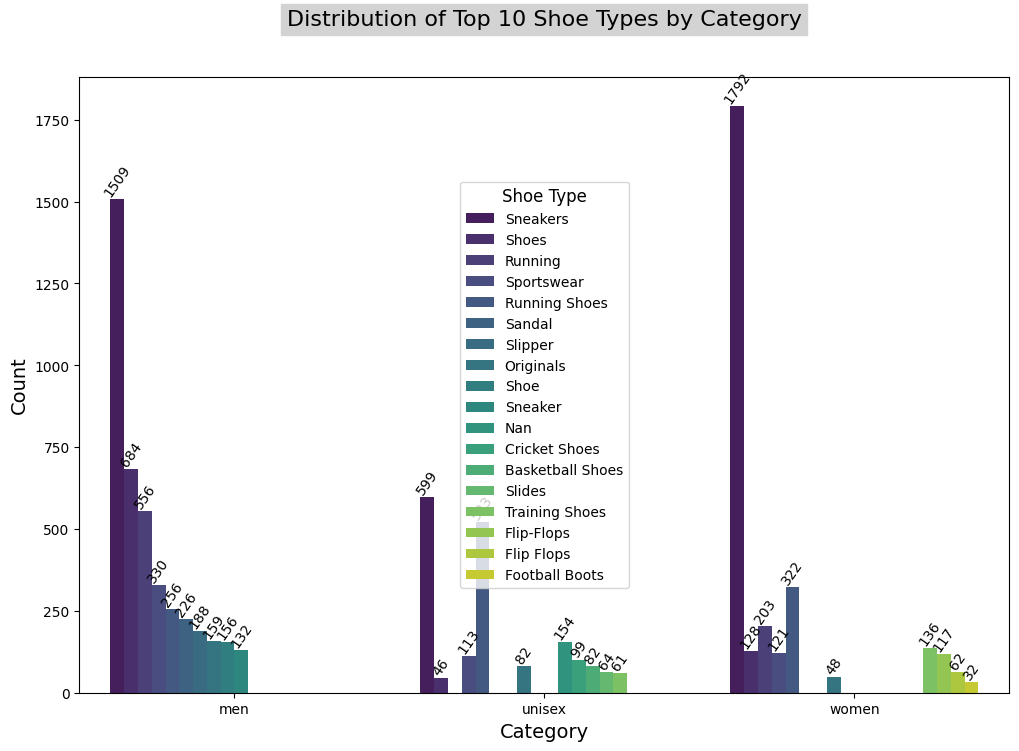

In [ ]:
top_25_df = df.groupby('category')['shoe_type'].value_counts().groupby(level=0).head(10).reset_index(name='count')

plt.figure(figsize=(12, 8))

# Plot the count of shoe types for each category in the top 25 records
ax= sns.barplot(x='category', y='count', hue='shoe_type', data=top_25_df, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, rotation=55)

plt.title('Distribution of Top 10 Shoe Types by Category', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Shoe Type', fontsize=10, title_fontsize=12, loc='center')
plt.show()

* It is evident across all categories that sneakers are in high demand, with running and sportswear shoes closely following suit.

In [ ]:
df.columns

Index(['shoe_name', 'original_price', 'category', 'review_count', 'star',
       'product_code', 'shoe_type', 'durability', 'comfort', 'size',
       'size_count', 'color_count', 'brand', 'color_1', 'color_2', 'color_3'],
      dtype='object')

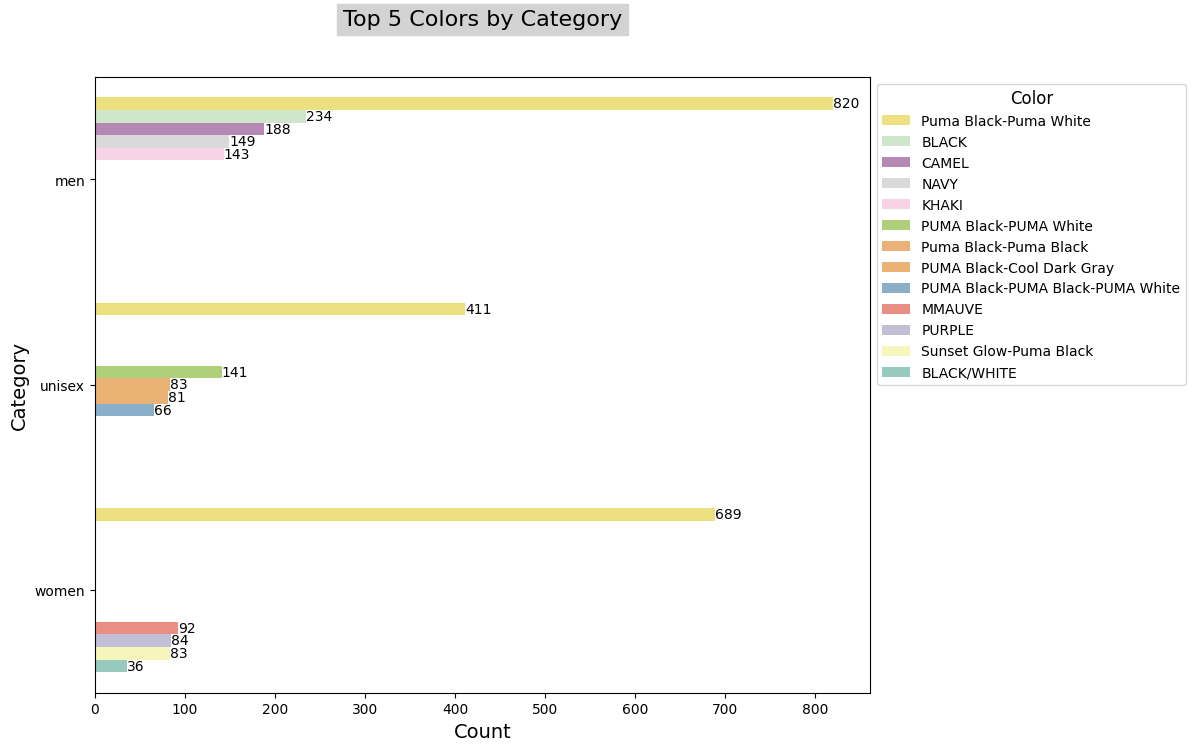

In [ ]:
top_colors = df.groupby('category')['color_1'].value_counts().groupby('category').head(5).reset_index(name='count')

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='count', y='category', hue='color_1', data=top_colors, palette='Set3_r', dodge=True)
for i in ax.containers:
    ax.bar_label(i)

plt.title('Top 5 Colors by Category', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.legend(title='Color', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.show()

* The most frequent color in the men's category is associated with a count of 820.
* Other notable colors have counts of 234, 188, 149, and 143.

* The most frequent color in the unisex category has a count of 411.

* The most frequent color in the women's category is associated with a count of 689

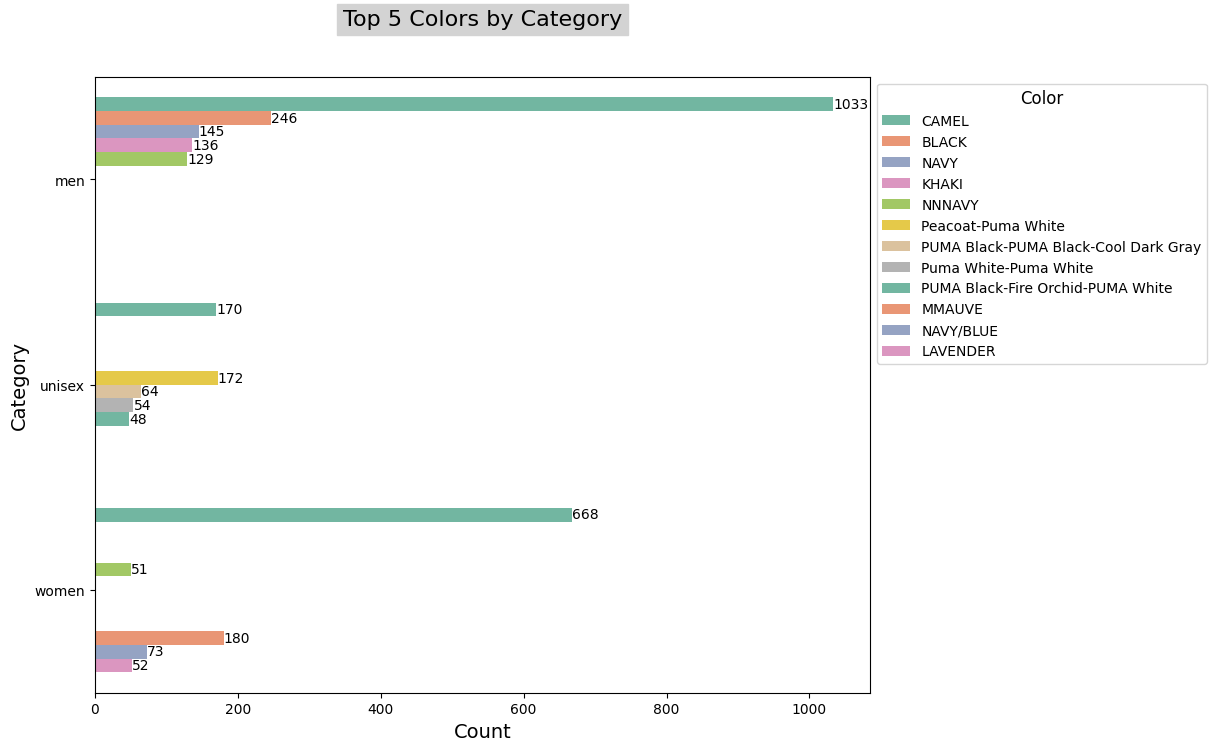

In [ ]:
top_colors = df.groupby('category')['color_2'].value_counts().groupby('category').head(5).reset_index(name='count')

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='count', y='category', hue='color_2', data=top_colors, palette='Set2', dodge=True)
for i in ax.containers:
    ax.bar_label(i)

plt.title('Top 5 Colors by Category', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.legend(title='Color', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.show()

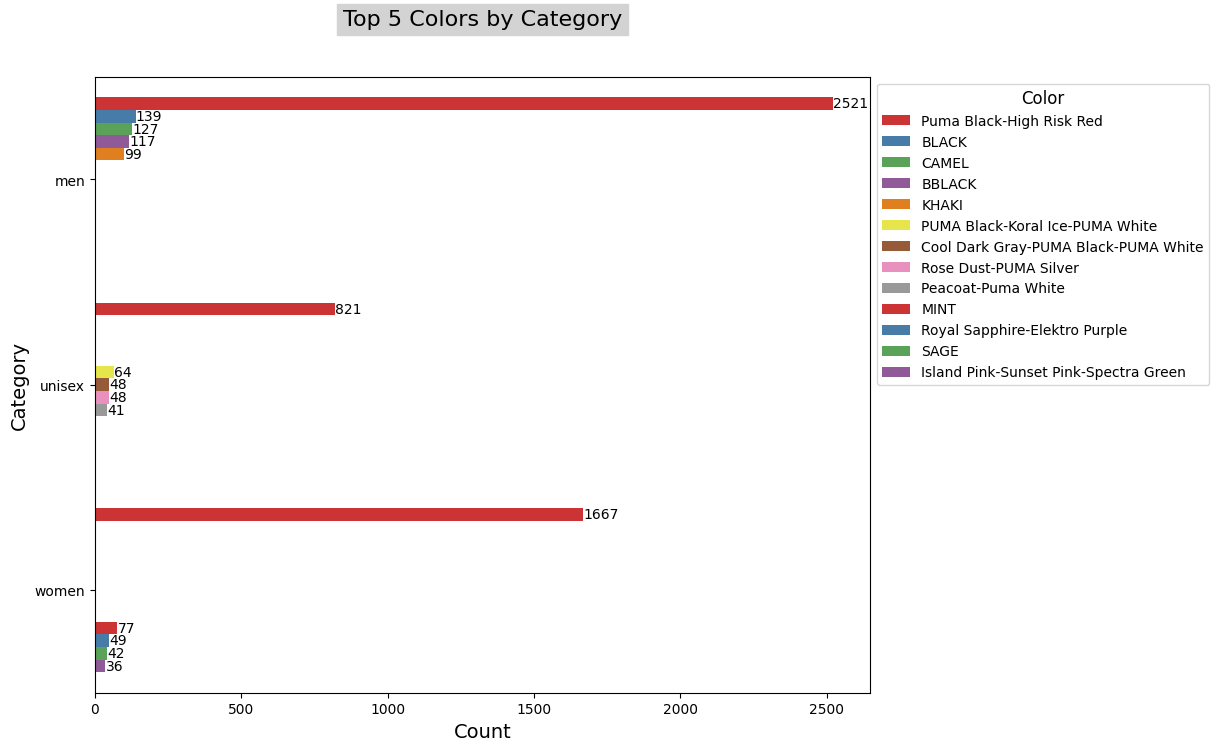

In [ ]:
top_colors = df.groupby('category')['color_3'].value_counts().groupby('category').head(5).reset_index(name='count')

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='count', y='category', hue='color_3', data=top_colors, palette='Set1', dodge=True)
for i in ax.containers:
    ax.bar_label(i)

plt.title('Top 5 Colors by Category', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.legend(title='Color', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.show()

**Assigning categories to the Star column for subsequent analysis.**-

In [ ]:
df['star'].value_counts()

0.0    7655
4.7     578
4.5     483
4.6     430
5.0     373
4.8     313
4.4     269
4.3     238
4.0     158
4.9     137
4.2      97
4.1      72
3.8      62
3.9      42
3.0      22
2.0      17
2.7      17
3.6      14
3.7      11
2.3      11
3.5       9
1.5       9
3.4       5
3.2       3
2.6       3
3.1       3
2.5       1
1.0       1
Name: star, dtype: int64

In [ ]:
# Define mapping for star categories
star_mapping = {
    0.0: 'No Review',
    (1.0, 2.0): 'Poor',
    (2.5, 2.9): 'Good',
    (3.0, 3.5): 'Better',
    (3.6, 4.9): 'Best',
    (4.0, 5.0): 'Excellent'
}

# Map 'star' column to 'star_category'
df['star_rating'] = df['star'].apply(lambda x: next((label for key, label in star_mapping.items() if isinstance(key, tuple) and key[0] <= x <= key[1]), 'Not Available'))

df['star_rating'].value_counts().index.tolist()


['Not Available', 'Best', 'Excellent', 'Better', 'Poor', 'Good']

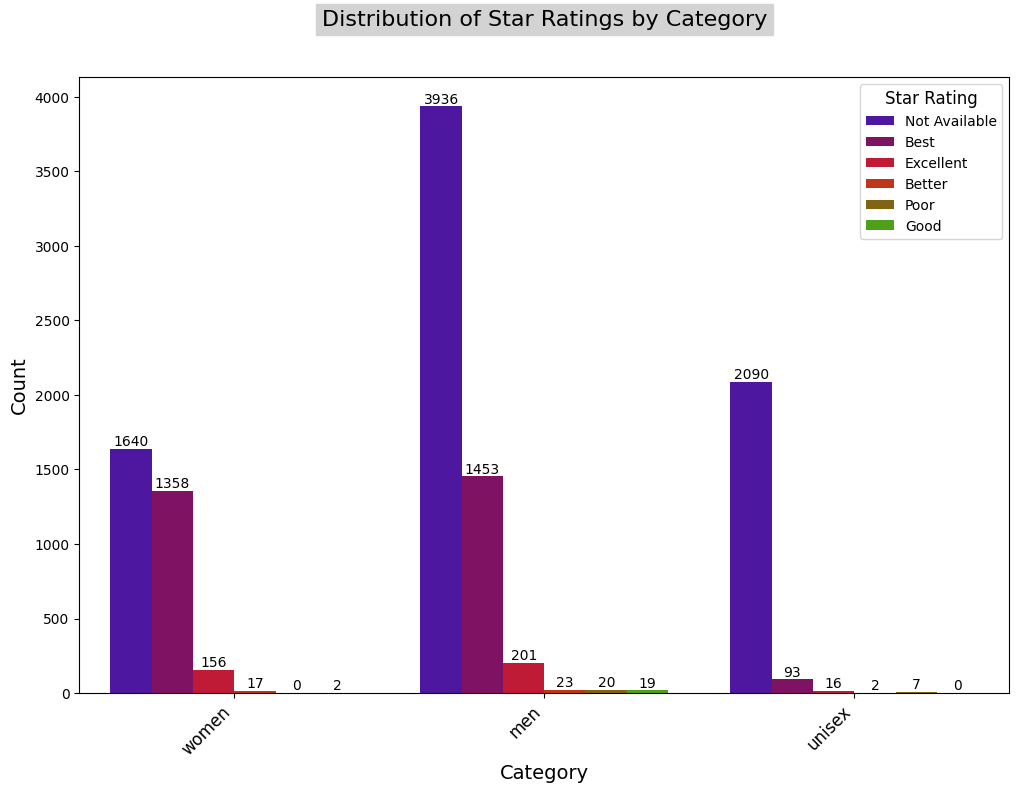

In [ ]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(x='category', hue='star_rating', data=df, palette='brg')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribution of Star Ratings by Category', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Star Rating', fontsize=10, title_fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

* Products in the "women" category predominantly fall into the "Not Available" rating, with substantial counts for star ratings categorized as "Excellent," "Best," and "Not Available."

* The "unisex" category is characterized by products achieving the "Best" ratings, particularly with high counts for star ratings categorized as "Excellent" and "Best."

* In the "men" category, products excel with "Excellent" ratings, especially for star ratings categorized as "Excellent," "Best," and "Better."

*  The "women" category has fewer products in the "Better" category, primarily with star ratings categorized as "Poor," "Good," and "Better."

* The "unisex" category shows no products in the "Poor" category. However, in the "men" category, there are counts for star ratings categorized as "Okay," "Poor," and "Good."

* The "men" category has a limited number of products in the "Good" category, primarily with star ratings categorized as "Good," "Best," and "Not Available."

**Let's omit the 'star' column as I have already captured the data in the 'star_rating' column and color_1 to color_3**

In [ ]:
# dropping the unnecessary columns for analysis.
df.drop(["star", "color_1", "color_2", "color_3"], axis=1, inplace=True)


In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
for i in numerical_columns:
    counts=df.groupby('star_rating')[i].mean()
    print(f"Grouped Rating with'{i}':")
    print(counts)
    print('========='*15)

Grouped Rating with'original_price':
star_rating
Best             6901.509642
Better           7003.857143
Excellent        6698.131367
Good             8201.190476
Not Available    5403.343726
Poor             6025.296296
Name: original_price, dtype: float64
Grouped Rating with'review_count':
star_rating
Best             151.128099
Better            32.333333
Excellent          4.332440
Good               6.238095
Not Available     89.489695
Poor               1.851852
Name: review_count, dtype: float64
Grouped Rating with'durability':
star_rating
Best              0.000000
Better            0.000000
Excellent         0.000000
Good              0.000000
Not Available    20.561571
Poor              0.000000
Name: durability, dtype: float64
Grouped Rating with'comfort':
star_rating
Best             11.221419
Better            8.333333
Excellent        10.053619
Good              0.000000
Not Available    19.480433
Poor             17.370370
Name: comfort, dtype: float64
Grouped Rating w

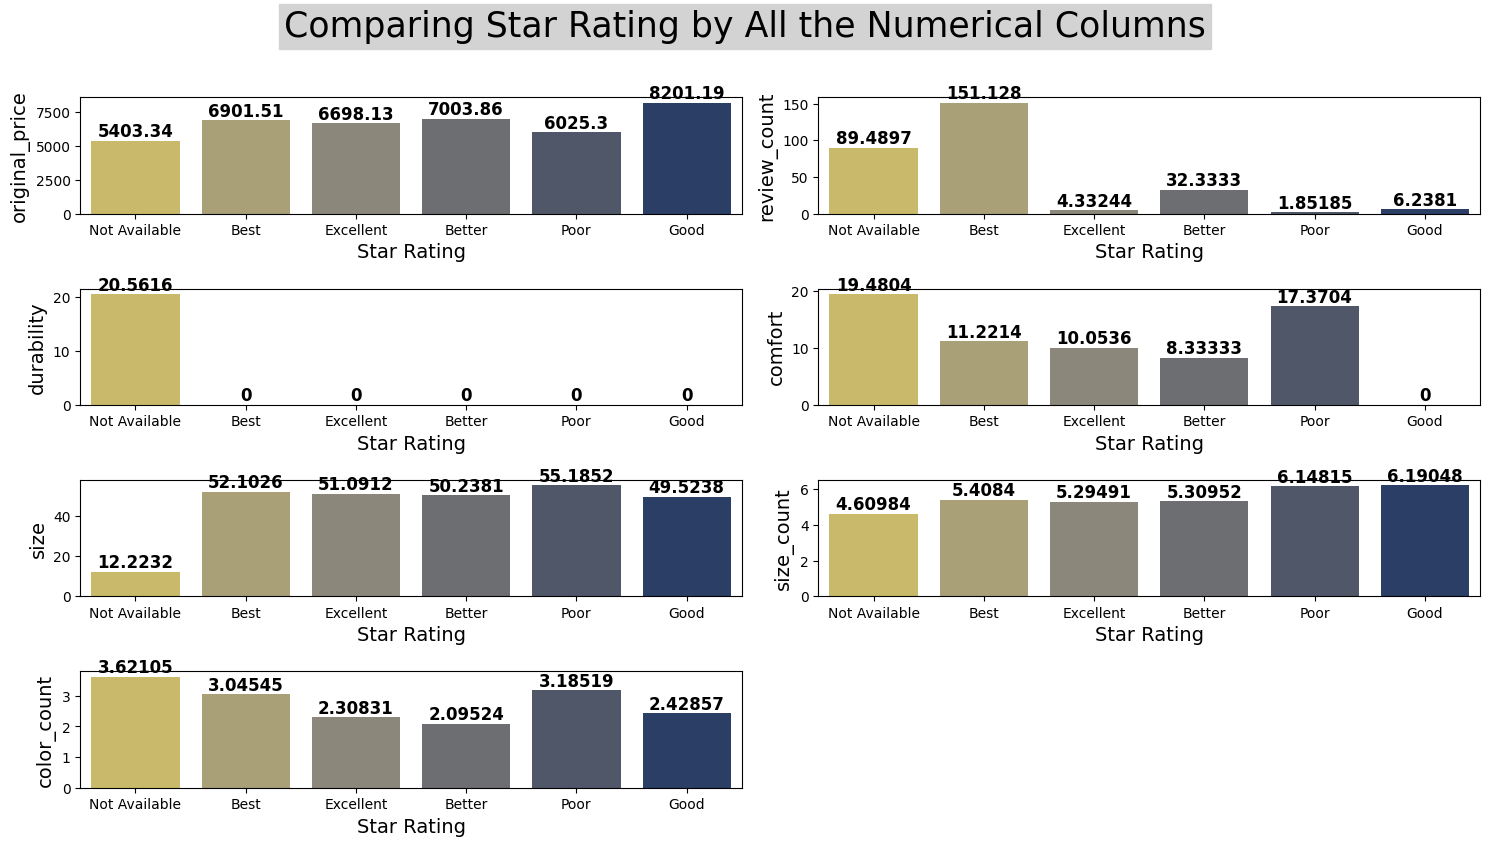

In [ ]:
# Visualizing it for star_rating
plt.figure(figsize=(15, 12))
fig = plt.gcf()
fig.suptitle("Comparing Star Rating by All the Numerical Columns", fontsize=25, backgroundcolor='lightgray', color='black')
plotnumber = 1

for col in numerical_columns:
    if plotnumber <= 8:
        ax = plt.subplot(6, 2, plotnumber)
        sns.barplot(x='star_rating', y=col, data=df, ci=None)
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, fontweight='bold')
        plt.xlabel('Star Rating', fontsize=14)
        plt.ylabel(col, fontsize=14)
    plotnumber += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Original Price:**

* Shoes with 'Good' ratings have the highest average original price, followed by 'Best' and 'Better' ratings.
* Shoes with 'Not Available' ratings have a lower average original price compared to other ratings.

**Review Count:**

* Shoes with 'Best' ratings have the highest average review count, indicating that highly-rated shoes attract more customer feedback.
* Shoes with 'Not Available' ratings also show a relatively high average review count.

**Durability:**

* Shoes with 'Not Available' ratings have a significantly higher average durability value compared to other ratings.

**Comfort:**

* Shoes with 'Best' and 'Excellent' ratings have higher average comfort values, indicating that highly-rated shoes are perceived as more comfortable.
* Shoes with 'Good' ratings have a lower average comfort value.

**Size:**

* Shoes with 'Poor' ratings have the highest average size value, followed by 'Best,' 'Better,' and 'Excellent' ratings.
* Shoes with 'Not Available' ratings have a lower average size value compared to other ratings.

**Size Count:**

* Shoes with 'Good' ratings have the highest average size count, followed by 'Better,' 'Poor,' 'Best,' and 'Excellent' ratings.
* Shoes with 'Not Available' ratings have a lower average size count compared to other ratings.

**Color Count:**

* Shoes with 'Good' ratings have the highest average color count, followed by 'Poor,' 'Best,' 'Excellent,' 'Better,' and 'Not Available' ratings.

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
for i in numerical_columns:
    counts=df.groupby('original_price')[i].mean()
    print(f"Grouped price with'{i}':")
    print(counts)
    print('========='*15)

Grouped price with'original_price':
original_price
159.0        159.0
166.0        166.0
267.0        267.0
270.0        270.0
321.0        321.0
            ...   
25995.0    25995.0
26995.0    26995.0
27995.0    27995.0
27999.0    27999.0
29999.0    29999.0
Name: original_price, Length: 563, dtype: float64
Grouped price with'review_count':
original_price
159.0       0.00
166.0       0.00
267.0       0.00
270.0       0.00
321.0       0.00
           ...  
25995.0     0.00
26995.0     0.00
27995.0     0.00
27999.0    30.75
29999.0     0.00
Name: review_count, Length: 563, dtype: float64
Grouped price with'durability':
original_price
159.0       0.0
166.0       0.0
267.0       0.0
270.0       0.0
321.0       0.0
           ... 
25995.0     0.0
26995.0     0.0
27995.0     0.0
27999.0    67.5
29999.0    89.0
Name: durability, Length: 563, dtype: float64
Grouped price with'comfort':
original_price
159.0       0.00
166.0       0.00
267.0       0.00
270.0       0.00
321.0       0.00
        

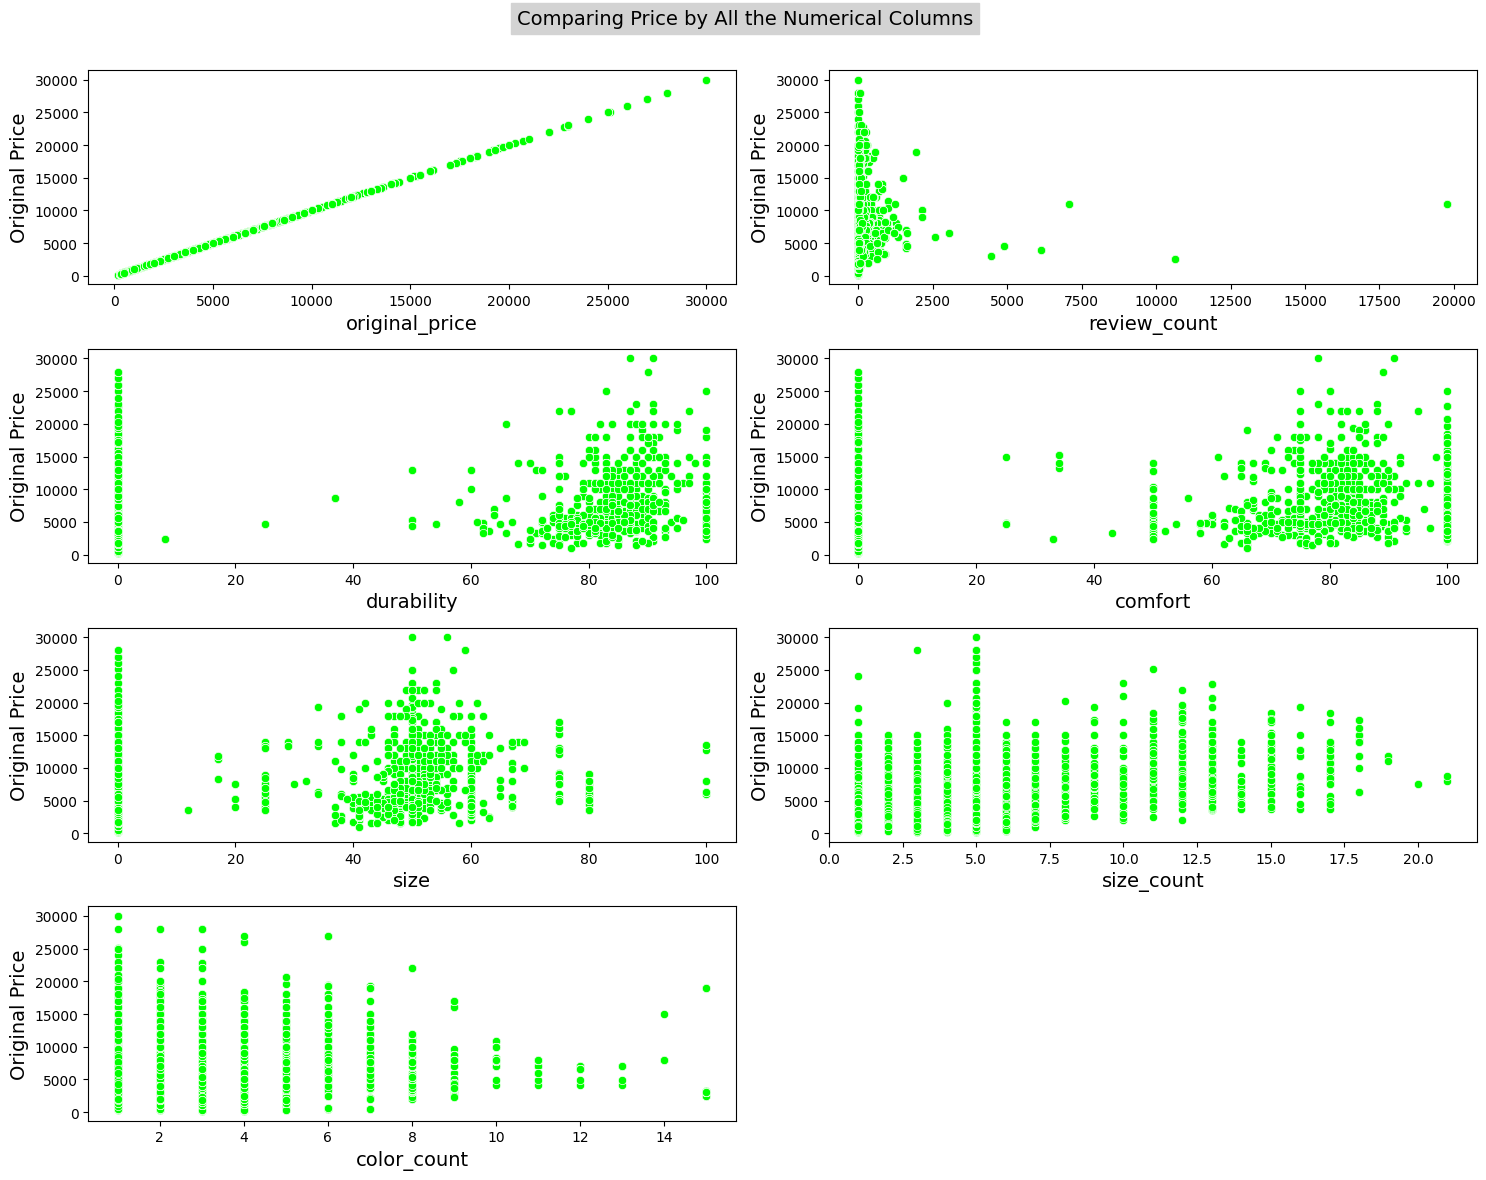

In [ ]:
# Visualizing Price by All the Numerical columns
plt.figure(figsize=(15, 12))
fig = plt.gcf()
fig.suptitle("Comparing Price by All the Numerical Columns", fontsize=14, backgroundcolor='lightgray', color='black')
plotnumber = 1

for col in numerical_columns:
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.scatterplot(x=df[col], y=df['original_price'], color='lime')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Original Price', fontsize=14)
    plotnumber += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Original Price:**

* Original prices vary widely, ranging from 159 to 29,999.
* Higher original prices tend to have more reviews, with a notable peak at 27,999.
* Durability, comfort, and size-related attributes generally show zero values across different price points.
* Size and color count may slightly increase with higher original prices, indicating potential variations.

**Review Count:**

* Most items across different price points have zero or very low review counts.
* An exception is observed at 27,999, which has a relatively higher average review count.

**Durability:**

*Durability shows mostly zero values across different price points, indicating a lack of information or data on this attribute.

**Comfort:**

* Similar to durability, comfort values are predominantly zero, suggesting limited information on this attribute for the given dataset.
* A noticeable increase in comfort ratings is observed around the 7,999 price point.

**Size:**

* Sizes generally have zero or very low counts across different price points.
* The average size count slightly increases for items priced at 27,999.

**Size Count:**

* Size counts vary but generally stay consistent across different price points.
* No distinct pattern is observed between original price and size count.

**Color Count:**

* The color count also exhibits variability with different price points.
* Higher-priced items (27,999) tend to have a more diverse color palette, while some mid-priced items show higher color counts.

### **Multivariant Analysis:-**

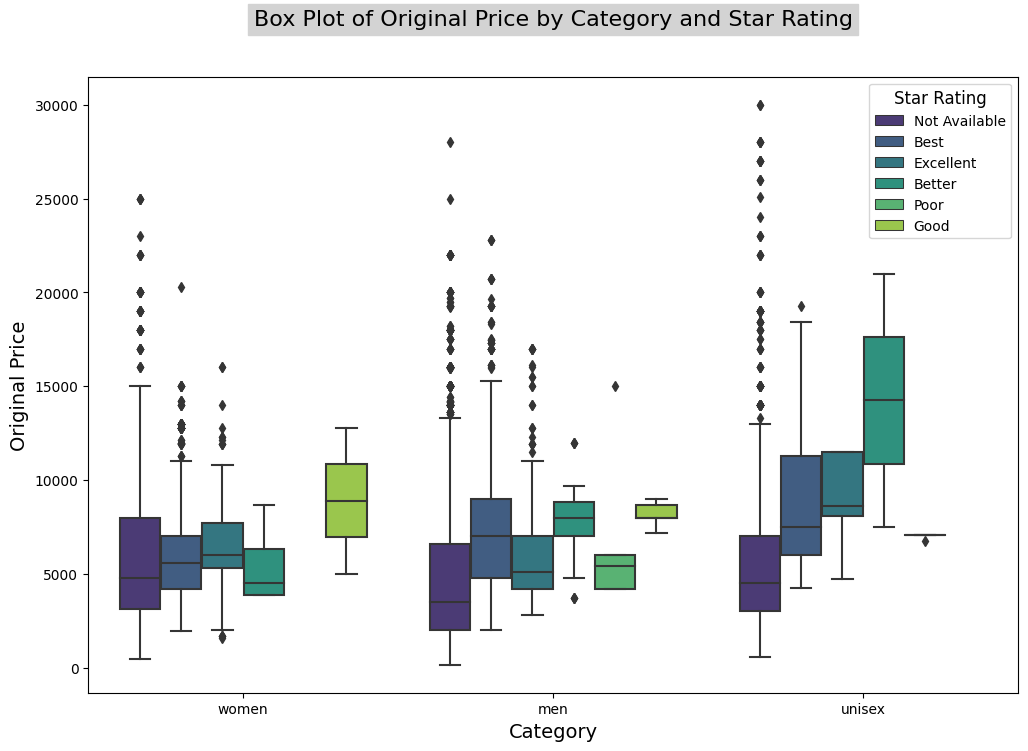

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='original_price', hue='star_rating', data=df, palette='viridis')
plt.title('Box Plot of Original Price by Category and Star Rating', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Original Price', fontsize=14)
plt.legend(title='Star Rating', fontsize=10, title_fontsize=12)
plt.show()

* Higher-priced products tend to have higher star ratings.

* Low_priced products tend to have zero star ratings.

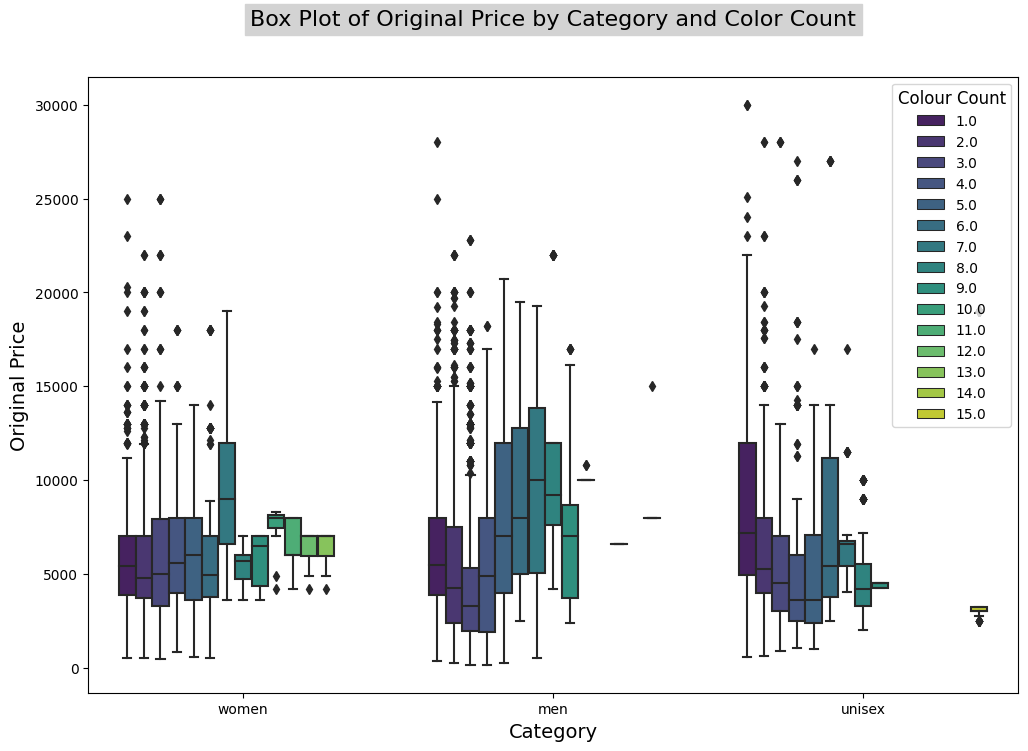

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='original_price', hue='color_count', data=df, palette='viridis')
plt.title('Box Plot of Original Price by Category and Color Count', fontsize=16, backgroundcolor='lightgray', y=1.07)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Original Price', fontsize=14)
plt.legend(title='Colour Count', fontsize=10, title_fontsize=12)
plt.show()


* Most products in all category price ranges have a 'Color Count' of 0.0-0.5 with average price range .

* Unisex shoes tend to offer a more extensive variety of colors compared to both women's and men's shoes, with women's shoes having a slightly higher color count than men's shoes.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Outlier Detection</b>
 </div>

In [ ]:
import copy

df1 = copy.copy(df)
df1.head()

shoe_name  original_price category  \
0  Deviate Nitro 2 Winterised women's Trail Runni...          9599.0    women   
1                         Cilia Lux women's Sneakers          3299.0    women   
2                        Fier Nitro women's Sneakers          4799.0    women   
3                        Fier Nitro women's Sneakers          4799.0    women   
4             Cali Dream Brand Love women's Sneakers          4499.0    women   

   review_count product_code            shoe_type  durability  comfort  size  \
0           0.0    376857_01  Trail Running Shoes         0.0      0.0   0.0   
1           0.0    370282_09             Sneakers         0.0      0.0   0.0   
2           0.0    389932_01             Sneakers         0.0      0.0   0.0   
3           0.0    389932_02             Sneakers         0.0      0.0   0.0   
4           0.0    394757_01             Sneakers         0.0      0.0   0.0   

   size_count  color_count brand    star_rating  
0         4.0          1.0  Puma  Not Available  
1         1.0          1.0  Puma  Not Available  
2         3.0          2.0  Puma  Not Available  
3         2.0          2.0  Puma  Not Available  
4         1.0          2.0  Puma  Not Available

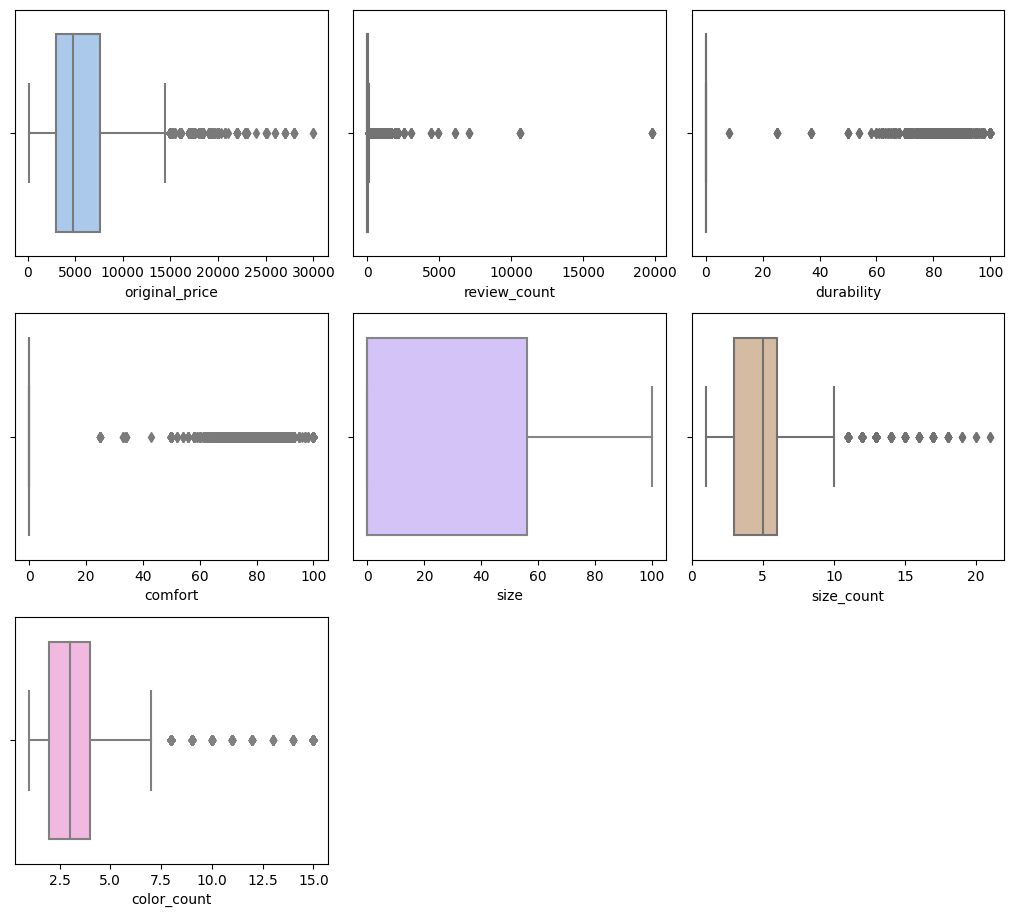

In [ ]:
num_cols = len(df1.select_dtypes(exclude=['object']).columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, ax = plt.subplots(ncols=3, nrows=num_rows, figsize=(10, 3 * num_rows))
ax = ax.flatten()

pastel_palette = sns.color_palette('pastel')

for i, col in enumerate(df1.select_dtypes(exclude=['object']).columns):
    # To handle the case with fewer than 3 numerical columns
    if i >= num_cols:
        break
    # Ensure we don't go out of bounds
    color_idx = i % len(pastel_palette)
    sns.boxplot(x=df1[col], ax=ax[i], palette=[pastel_palette[color_idx]])

# If there are remaining subplots, remove them
for j in range(num_cols, 3 * num_rows):
    fig.delaxes(ax[j])

plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

* The nature of the 'size_count' and 'color_count' variable depends on the values it contains. The'size_count' and 'color_count'represents discrete categories, such as shoe sizes (e.g., 6, 7, 8), it is categorical.

* Also, we cannot remove the outliers from target variables.

**Handling the outliers:-**

In [ ]:
features_with_outliers = df1[['review_count','comfort', 'durability', 'size']]

z=np.abs(zscore(features_with_outliers))
z

review_count   comfort  durability      size
0          0.166085  0.507238    0.447116  0.868018
1          0.166085  0.507238    0.447116  0.868018
2          0.166085  0.507238    0.447116  0.868018
3          0.166085  0.507238    0.447116  0.868018
4          0.166085  0.507238    0.447116  0.868018
...             ...       ...         ...       ...
11028      0.120602  1.743392    2.213043  0.878371
11029      0.633119  1.953450    2.244339  0.771450
11030      0.633119  1.953450    2.244339  0.771450
11031      0.161212  2.223526    2.400819  0.914012
11032      0.161212  2.223526    2.400819  0.914012

[11033 rows x 4 columns]

In [ ]:
threshold = 3
np.where(z>3)
# Creating new dataframe
df_new = df1[(z<3).all(axis=1)]
df_new

shoe_name  original_price  \
0      Deviate Nitro 2 Winterised women's Trail Runni...          9599.0   
1                             Cilia Lux women's Sneakers          3299.0   
2                            Fier Nitro women's Sneakers          4799.0   
3                            Fier Nitro women's Sneakers          4799.0   
4                 Cali Dream Brand Love women's Sneakers          4499.0   
...                                                  ...             ...   
11028                                   FORUM BOLD SHOES         10999.0   
11029                                         ADIZERO SL         11999.0   
11030                                         ADIZERO SL         11999.0   
11031                                     CONTEM X SHOES          3999.0   
11032                                     CONTEM X SHOES          3999.0   

      category  review_count product_code            shoe_type  durability  \
0        women           0.0    376857_01  Trail Running Shoes         0.0   
1        women           0.0    370282_09             Sneakers         0.0   
2        women           0.0    389932_01             Sneakers         0.0   
3        women           0.0    389932_02             Sneakers         0.0   
4        women           0.0    394757_01             Sneakers         0.0   
...        ...           ...          ...                  ...         ...   
11028    women          28.0       IG0285            Originals        85.0   
11029      men         492.0       ID6921              Running        86.0   
11030      men         492.0       ID6926              Running        86.0   
11031    women           3.0       IQ8887              Running        91.0   
11032    women           3.0       IQ8888              Running        91.0   

       comfort  size  size_count  color_count   brand    star_rating  
0          0.0   0.0         4.0          1.0    Puma  Not Available  
1          0.0   0.0         1.0          1.0    Puma  Not Available  
2          0.0   0.0         3.0          2.0    Puma  Not Available  
3          0.0   0.0         2.0          2.0    Puma  Not Available  
4          0.0   0.0         1.0          2.0    Puma  Not Available  
...        ...   ...         ...          ...     ...            ...  
11028     75.0  49.0         5.0          2.0  adidas  Not Available  
11029     82.0  46.0         5.0          2.0  adidas  Not Available  
11030     82.0  46.0         5.0          2.0  adidas  Not Available  
11031     91.0  50.0         5.0          2.0  adidas  Not Available  
11032     91.0  50.0         5.0          2.0  adidas  Not Available  

[10982 rows x 13 columns]

In [ ]:
print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df_new.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df_new.shape[0])/df1.shape[0]*100)

Shape of the dataframe before removing outliers:  (11033, 13)
Shape of the dataframe after removing outliers:  (10982, 13)
Percentage of data loss post outlier removal:  0.46224961479198773


In [ ]:
#1st quantile
Q1=features_with_outliers.quantile(0.25)

# 3rd quantile
Q3=features_with_outliers.quantile(0.75)

#IQR
IQR=Q3 - Q1
df2=df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Old DataFrame data in Rows and Column:",df1.shape)
print("\nNew DataFrame data in Rows and Column:",df1.shape)
print("\nTotal Dropped rows:",df1.shape[0]-df2.shape[0])
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

Old DataFrame data in Rows and Column: (11033, 13)

New DataFrame data in Rows and Column: (11033, 13)

Total Dropped rows: 2974
Percentage of data loss post outlier removal:  26.95549714492885


**A total of 26.955% of the data was eliminated when using the IQR method to remove outliers. Therefore, the IQR method may not be the suitable choice for outlier removal, and we will opt for the Z-score method instead as data loss is only 0.46%.**

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Handling the skewness</b>
 </div>

In [ ]:
df_new.head()

shoe_name  original_price category  \
0  Deviate Nitro 2 Winterised women's Trail Runni...          9599.0    women   
1                         Cilia Lux women's Sneakers          3299.0    women   
2                        Fier Nitro women's Sneakers          4799.0    women   
3                        Fier Nitro women's Sneakers          4799.0    women   
4             Cali Dream Brand Love women's Sneakers          4499.0    women   

   review_count product_code            shoe_type  durability  comfort  size  \
0           0.0    376857_01  Trail Running Shoes         0.0      0.0   0.0   
1           0.0    370282_09             Sneakers         0.0      0.0   0.0   
2           0.0    389932_01             Sneakers         0.0      0.0   0.0   
3           0.0    389932_02             Sneakers         0.0      0.0   0.0   
4           0.0    394757_01             Sneakers         0.0      0.0   0.0   

   size_count  color_count brand    star_rating  
0         4.0          1.0  Puma  Not Available  
1         1.0          1.0  Puma  Not Available  
2         3.0          2.0  Puma  Not Available  
3         2.0          2.0  Puma  Not Available  
4         1.0          2.0  Puma  Not Available

In [ ]:
df_new.skew()

original_price    1.417745
review_count      4.967717
durability        1.854792
comfort           1.548020
size              0.364784
size_count        1.610613
color_count       2.241604
dtype: float64

**Based on above data, I observed that:_**

* For count columns, especially those representing sizes, colors, or quantities, skewness may not be as critical

* Even skewness in durability and comfort and size are not critical as these columns repersenting the quantities scalibility of customer statisfaction though these columns are numerical in data tyopes but they are bevaing as categorical as they are repersenting the customer statisfaction level.

In [ ]:
# Handling the skewness
df_new['review_count'] = np.log1p(df_new['review_count'])

In [ ]:
df_new.skew()

original_price    1.417745
review_count      0.920094
durability        1.854792
comfort           1.548020
size              0.364784
size_count        1.610613
color_count       2.241604
dtype: float64

In [ ]:
# dropping the unnecessary columns for analysis.
df_new.drop(["product_code"], axis=1, inplace=True)

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Transforming Categorical Data with LabelEncoder</b>
 </div>


In [ ]:
EN= LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=EN.fit_transform(df_new[i].values.reshape(-1,1))

In [ ]:
df_new.head()

shoe_name  original_price  category  review_count  shoe_type  durability  \
0        796          9599.0         2           0.0        145         0.0   
1        536          3299.0         2           0.0        134         0.0   
2        961          4799.0         2           0.0        134         0.0   
3        961          4799.0         2           0.0        134         0.0   
4        467          4499.0         2           0.0        134         0.0   

   comfort  size  size_count  color_count  brand  star_rating  
0      0.0   0.0         4.0          1.0      1            4  
1      0.0   0.0         1.0          1.0      1            4  
2      0.0   0.0         3.0          2.0      1            4  
3      0.0   0.0         2.0          2.0      1            4  
4      0.0   0.0         1.0          2.0      1            4

* I have transformed all categorical columns into numerical representations using Label Encoder

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Checking the correlations</b>
 </div>

In [ ]:
df_new.corr()

shoe_name  original_price  category  review_count  shoe_type  \
shoe_name        1.000000        0.010973  0.047983     -0.013901  -0.030196   
original_price   0.010973        1.000000  0.032212      0.337146  -0.009704   
category         0.047983        0.032212  1.000000      0.068490   0.108323   
review_count    -0.013901        0.337146  0.068490      1.000000   0.275492   
shoe_type       -0.030196       -0.009704  0.108323      0.275492   1.000000   
durability      -0.004704        0.298543 -0.083722      0.462535   0.063191   
comfort         -0.004553        0.364954 -0.116975      0.525845   0.040812   
size            -0.077389        0.291919  0.083645      0.762469   0.319836   
size_count       0.026056        0.311776 -0.108068      0.132194  -0.094902   
color_count      0.213336        0.046708  0.040927      0.144367  -0.061035   
brand           -0.131988        0.040722  0.066906      0.503582   0.317153   
star_rating      0.070779       -0.166609 -0.137235     -0.562768  -0.297297   

                durability   comfort      size  size_count  color_count  \
shoe_name        -0.004704 -0.004553 -0.077389    0.026056     0.213336   
original_price    0.298543  0.364954  0.291919    0.311776     0.046708   
category         -0.083722 -0.116975  0.083645   -0.108068     0.040927   
review_count      0.462535  0.525845  0.762469    0.132194     0.144367   
shoe_type         0.063191  0.040812  0.319836   -0.094902    -0.061035   
durability        1.000000  0.855428  0.403345    0.024612     0.122413   
comfort           0.855428  1.000000  0.463375    0.251164     0.182360   
size              0.403345  0.463375  1.000000   -0.023650    -0.064328   
size_count        0.024612  0.251164 -0.023650    1.000000     0.105130   
color_count       0.122413  0.182360 -0.064328    0.105130     1.000000   
brand             0.153595 -0.009295  0.763139   -0.357491    -0.234039   
star_rating       0.283974  0.107271 -0.636940   -0.133185     0.110251   

                   brand  star_rating  
shoe_name      -0.131988     0.070779  
original_price  0.040722    -0.166609  
category        0.066906    -0.137235  
review_count    0.503582    -0.562768  
shoe_type       0.317153    -0.297297  
durability      0.153595     0.283974  
comfort        -0.009295     0.107271  
size            0.763139    -0.636940  
size_count     -0.357491    -0.133185  
color_count    -0.234039     0.110251  
brand           1.000000    -0.544554  
star_rating    -0.544554     1.000000

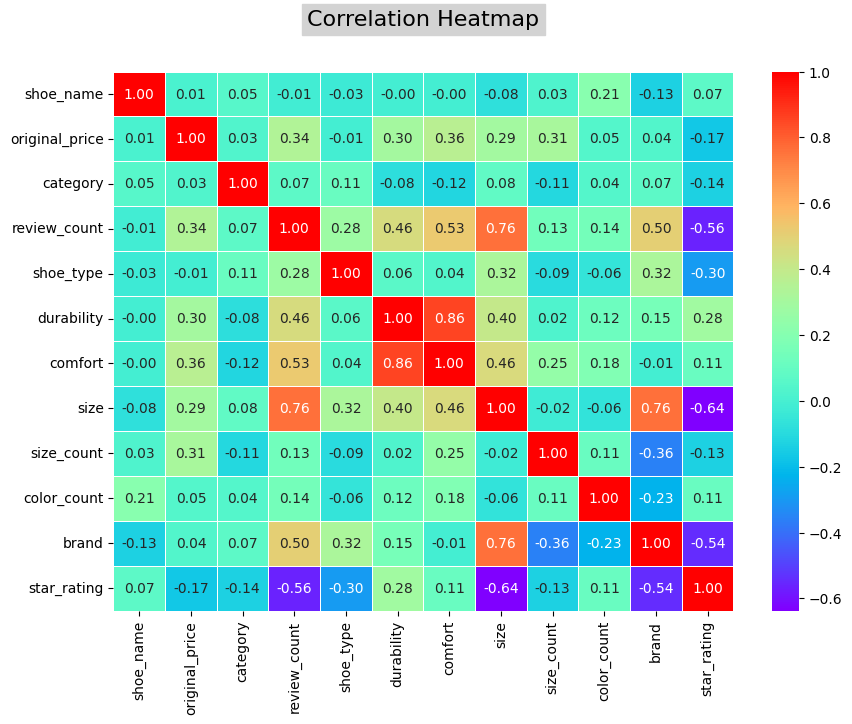

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=df_new.corr(), annot=True, linewidths=0.5, linecolor='white', fmt='.2f', cmap='rainbow')
plt.title('Correlation Heatmap', y=1.07, fontsize=16, backgroundcolor='lightgray')
plt.tight_layout
plt.show()

**Observation:-**

**Original Price and Review Count:**

Moderate positive correlation (0.337146).
Higher original prices tend to be associated with higher review counts.

**Review Count and Size:**

Strong positive correlation (0.762469).
Products with more reviews tend to have larger sizes.

**Review Count and Comfort:**

Strong positive correlation (0.525845).
Products with more reviews tend to be perceived as more comfortable.

**Durability and Comfort:**

Strong positive correlation (0.855428).
Perceived durability and comfort are strongly positively correlated, suggesting that products perceived as durable are also perceived as comfortable.

**Size and Size Count:**

Strong negative correlation (-0.636940).
As the size increases, the number of available sizes tends to decrease.

**Brand and Star Rating:**

Strong negative correlation (-0.544554).
Certain brands tend to have lower star ratings.

**Star Rating and Review Count:**

Strong negative correlation (-0.562768).
Products with higher star ratings tend to have fewer reviews.

**Category and Durability:**

Moderate negative correlation (-0.083722).
Certain categories may be associated with lower perceived durability.

**Category and Comfort:**

Moderate negative correlation (-0.116975).
Certain categories may be associated with lower perceived comfort.

**Size and Original Price:**

Moderate positive correlation (0.291919).
Higher sizes tend to be associated with higher original prices.

**Size Count and Comfort:**

Moderate positive correlation (0.251164).
Products with more available sizes tend to be perceived as more comfortable.

**Color Count and Original Price:**

Moderate positive correlation (0.213336).
Products with more color options tend to have higher original prices.


star_rating      -0.166609
shoe_type        -0.009704
shoe_name         0.010973
category          0.032212
brand             0.040722
color_count       0.046708
size              0.291919
durability        0.298543
size_count        0.311776
review_count      0.337146
comfort           0.364954
original_price    1.000000
Name: original_price, dtype: float64


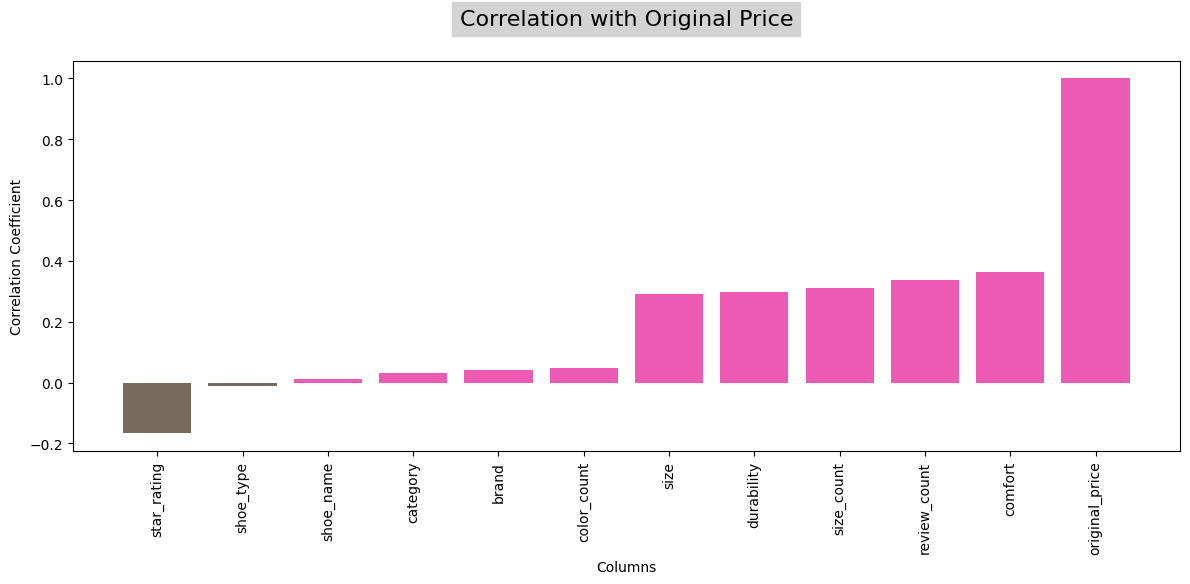

In [ ]:
# Correlation of columns with Target variable 'original_price'
correlations = df_new.corr()['original_price'].sort_values()
print(correlations)

colors = ['#776B5D' if c < 0 else '#ED5AB3' for c in correlations]
plt.figure(figsize=(12,6))
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Original Price', backgroundcolor='lightgray', y=1.07, fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Observations on Correlation with 'Original Price':**

* 'original_price' has a relatively weak negative correlation with 'star_rating' (-0.167), suggesting that as the original price increases, 'star_rating' tends to decrease slightly.

* 'original_price' has a weak positive correlation with 'size,' 'durability,' 'size_count,' 'review_count,' and 'comfort.' This indicates that, in general, as the original price increases, these variables also tend to increase.

* The correlation between 'original_price' and 'shoe_type,' 'shoe_name,' 'category,' 'brand,' and 'color_count' is relatively weak, with coefficients close to zero.

**The graph indicates a minimal correlation between 'shoe_type' and 'shoe_name' with 'original_price.' Despite this, I have not excluded these columns yet. I plan to evaluate multicollinearity values before deciding whether to remove these columns.**


size             -0.636940
review_count     -0.562768
brand            -0.544554
shoe_type        -0.297297
original_price   -0.166609
category         -0.137235
size_count       -0.133185
shoe_name         0.070779
comfort           0.107271
color_count       0.110251
durability        0.283974
star_rating       1.000000
Name: star_rating, dtype: float64


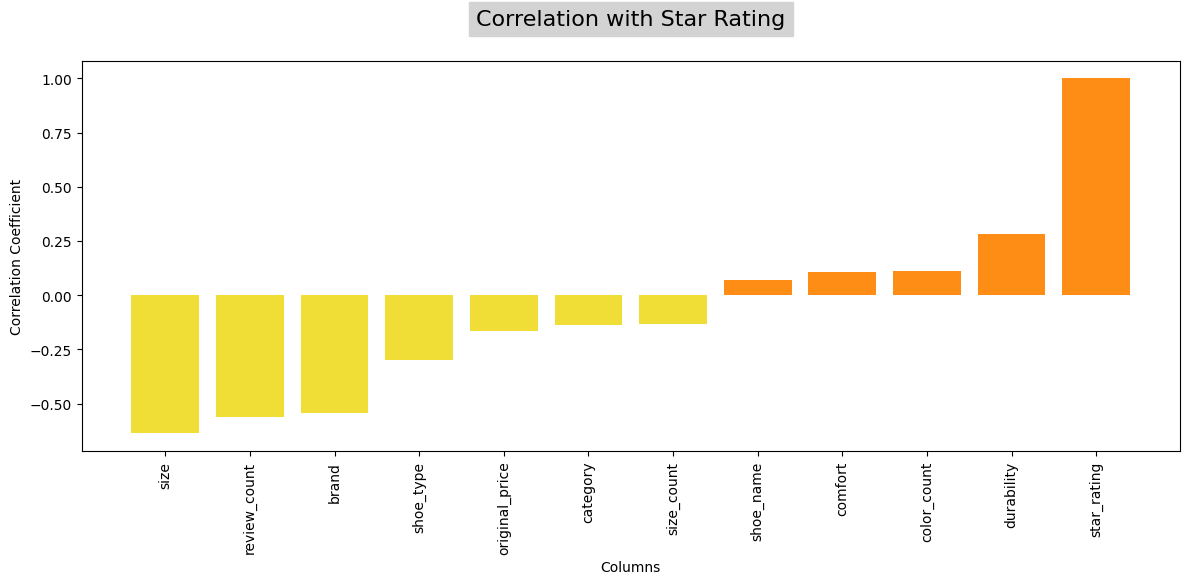

In [ ]:
correlations = df_new.corr()['star_rating'].sort_values()
print(correlations)

colors = ['#F0DE36' if c < 0 else '#FD8D14' for c in correlations]
plt.figure(figsize=(12,6))
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Star Rating', backgroundcolor='lightgray', y=1.07, fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations on Correlation with 'Star Rating':**

* 'size', 'review_count', and 'brand' have negative correlations with 'star_rating,' indicating that as these variables decrease, 'star_rating' tends to decrease.

* 'shoe_type', 'original_price', and 'category' also have negative correlations but to a lesser extent.

* 'size_count', 'shoe_name', 'comfort', 'color_count', and 'durability' have positive correlations with 'star_rating,' suggesting that as these variables increase, 'star_rating' tends to increase.

* The correlation between 'star_rating' and 'size_count' is relatively weak (close to 0).

**The graph indicates a minimal correlation between 'size_count' and 'shoe_name' with 'star_rating.' Despite this, I have not excluded these columns yet. I plan to evaluate multicollinearity values before deciding whether to remove these columns.**

<div style="background-color: #A367B1; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">PHASE : 4</b>
 </div>

### **Objective 1:-**

Target Variable: original_price (Regression)

Explanation:

When anticipating the initial cost of a shoe, the target variable, labeled as "Original_Price," denotes the starting price before any discounts or promotions. This task falls under regression, focusing on predicting the numerical value of the original price.


**So far, our initial assumption regarding the 'original_price' appears to be valid. Moving forward, we will proceed with regression modeling to further analyze and interpret the data.**

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Data Splitting for features & label</b>
 </div>:

In [ ]:
# Splitting data in target and dependent feature
X = df_new.drop(columns=['original_price'])  # Features (independent variables)
Y = df_new['original_price']  # Label (dependent variable

# Checking the dimenstion of X & Y
X.shape, Y.shape

((10982, 11), (10982,))

**Independent Variables (Features):**

**Shape: (10982, 11):-** These are the independent variables or features. There are 110982 observations, each with 11 features.

**Dependent Variable (Target):**

**Shape: (10982,) :-** This is the target variable or dependent variable with 10205 elements. Each element is associated with a specific observation.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Feature Scaling</b>
 </div>

In [ ]:
sc=StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X

shoe_name  category  review_count  shoe_type  durability   comfort  \
0      -0.769128  1.411487     -0.789763   0.930057   -0.440876 -0.501489   
1      -1.108257  1.411487     -0.789763   0.582341   -0.440876 -0.501489   
2      -0.553911  1.411487     -0.789763   0.582341   -0.440876 -0.501489   
3      -0.553911  1.411487     -0.789763   0.582341   -0.440876 -0.501489   
4      -1.198257  1.411487     -0.789763   0.582341   -0.440876 -0.501489   
...          ...       ...           ...        ...         ...       ...   
10977  -0.598259  1.411487      0.761195  -0.618862    2.245780  1.763657   
10978  -1.730428 -0.895717      2.066156  -0.144703    2.277387  1.975071   
10979  -1.730428 -0.895717      2.066156  -0.144703    2.277387  1.975071   
10980  -1.233474  1.411487     -0.151243  -0.144703    2.435426  2.246889   
10981  -1.233474  1.411487     -0.151243  -0.144703    2.435426  2.246889   

           size  size_count  color_count     brand  star_rating  
0     -0.863593   -0.321224    -0.978816 -0.852107     0.644112  
1     -0.863593   -1.452375    -0.978816 -0.852107     0.644112  
2     -0.863593   -0.698274    -0.573058 -0.852107     0.644112  
3     -0.863593   -1.075324    -0.573058 -0.852107     0.644112  
4     -0.863593   -1.452375    -0.573058 -0.852107     0.644112  
...         ...         ...          ...       ...          ...  
10977  0.881579    0.055826    -0.573058  0.348386     0.644112  
10978  0.774732    0.055826    -0.573058  0.348386     0.644112  
10979  0.774732    0.055826    -0.573058  0.348386     0.644112  
10980  0.917195    0.055826    -0.573058  0.348386     0.644112  
10981  0.917195    0.055826    -0.573058  0.348386     0.644112  

[10982 rows x 11 columns]

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Checking the Multicollinearity</b>
 </div>

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print(vif)
vif_cal()

    VIF FACTOR      FEATURES
0     1.069326     shoe_name
1     1.112542      category
2     4.240975  review_count
3     1.167663     shoe_type
4     9.097927    durability
5    10.464675       comfort
6    11.501298          size
7     1.630293    size_count
8     1.246199   color_count
9     7.634278         brand
10    6.810476   star_rating


The VIF (Variance Inflation Factor) for the independent features is comfortably below the commonly accepted threshold of 10. However, above few columns which are higly correlated and which can close the multicollinearity issue.Hecne, I will remove highly corelated columns to reduce the multcollinearity issues within columns.

In [ ]:
X.drop(columns=['size'],axis=1, inplace=True)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print(vif)
vif_cal()

   VIF FACTOR      FEATURES
0    1.062998     shoe_name
1    1.075869      category
2    4.236668  review_count
3    1.167185     shoe_type
4    9.027139    durability
5    6.499762       comfort
6    1.630002    size_count
7    1.244280   color_count
8    3.505318         brand
9    5.360982   star_rating


In [ ]:
X.drop(columns=['durability'],axis=1, inplace=True)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print(vif)
vif_cal()

   VIF FACTOR      FEATURES
0    1.062045     shoe_name
1    1.066973      category
2    3.739731  review_count
3    1.161967     shoe_type
4    2.334409       comfort
5    1.626572    size_count
6    1.239949   color_count
7    2.534768         brand
8    2.753559   star_rating


* Upon removing the 'size' and 'durability' columns, the multicollinearity issue has been successfully addressed. Consequently, we will proceed with the next steps.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Model Selection</b>
 </div>

Model: Linear_Regression
R2 score: 0.20955050302572686
Mean absolute error: 2651.9653202999116
Mean squared error: 13495409.814057406
Root Mean Squared Error: 3673.6099158807547
Best R2 Score: 0.2650447953375151
Best Random State: 53


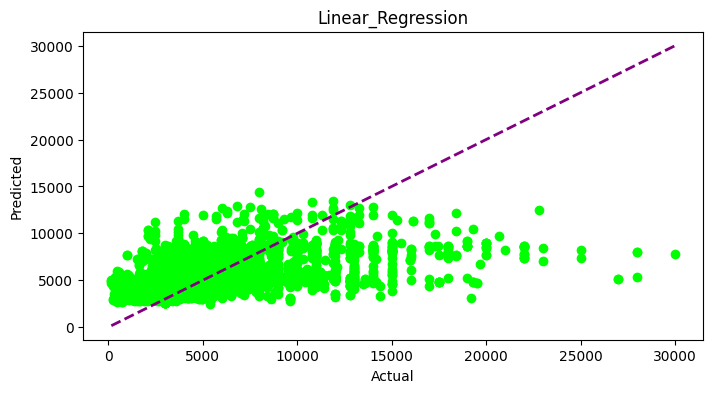

Model: Ridge_
R2 score: 0.20954848717599184
Mean absolute error: 2651.9709008312248
Mean squared error: 13495444.230827106
Root Mean Squared Error: 3673.6146002033347
Best R2 Score: 0.2650398006035619
Best Random State: 53


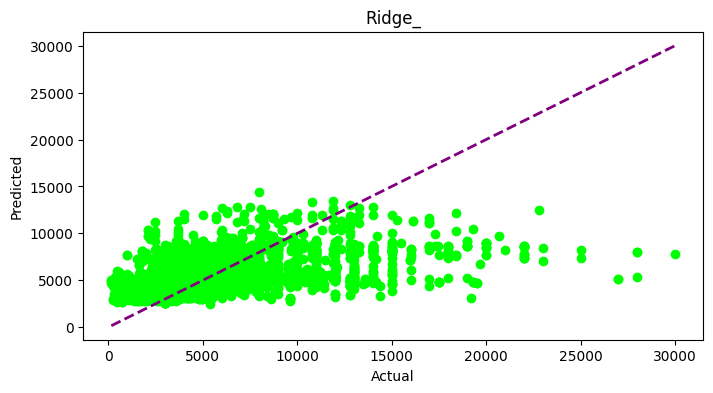

Model: Lasso_
R2 score: 0.2095198542862372
Mean absolute error: 2652.0664547630204
Mean squared error: 13495933.082528422
Root Mean Squared Error: 3673.681135118891
Best R2 Score: 0.26499409296350185
Best Random State: 53


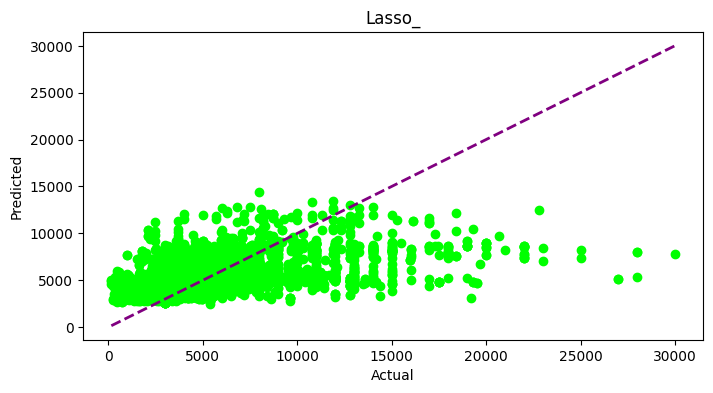

Model: Elastic_Net
R2 score: 0.19268370880608687
Mean absolute error: 2684.624501743302
Mean squared error: 13783377.990537662
Root Mean Squared Error: 3712.5972028403057
Best R2 Score: 0.24266531298384864
Best Random State: 54


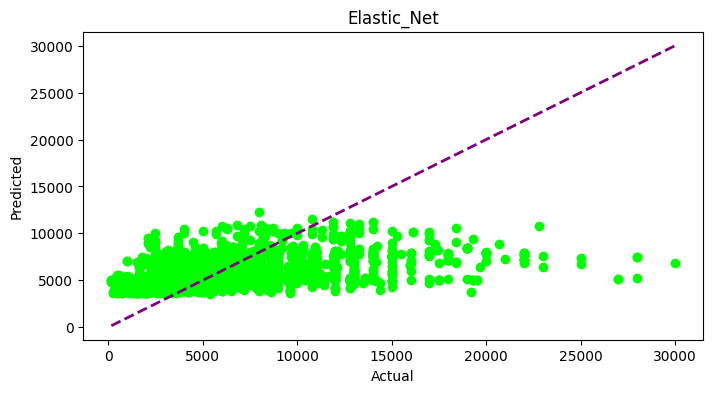

Model: SGD_Regressor
R2 score: 0.20434222952305203
Mean absolute error: 2644.818149852411
Mean squared error: 13584331.099492269
Root Mean Squared Error: 3685.6927570664743
Best R2 Score: 0.2659007688737577
Best Random State: 53


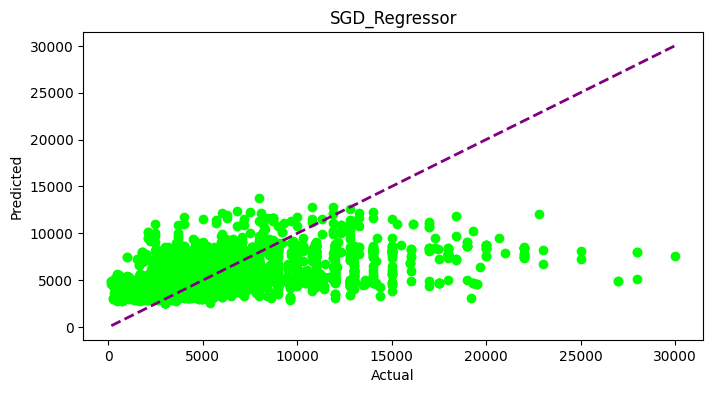

Model: Decision_Tree_Regressor
R2 score: 0.7851673616357258
Mean absolute error: 715.2101954958924
Mean squared error: 3667855.4509288706
Root Mean Squared Error: 1915.1646015235533
Best R2 Score: 0.782122703722562
Best Random State: 55


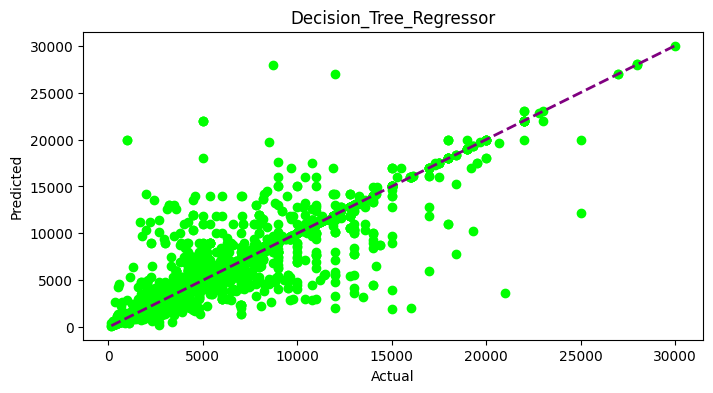

Model: Random_Forest_Regressor
R2 score: 0.8560278725053111
Mean absolute error: 789.3263437177426
Mean squared error: 2458048.0723688626
Root Mean Squared Error: 1567.8163388512262
Best R2 Score: 0.8646681406899698
Best Random State: 9


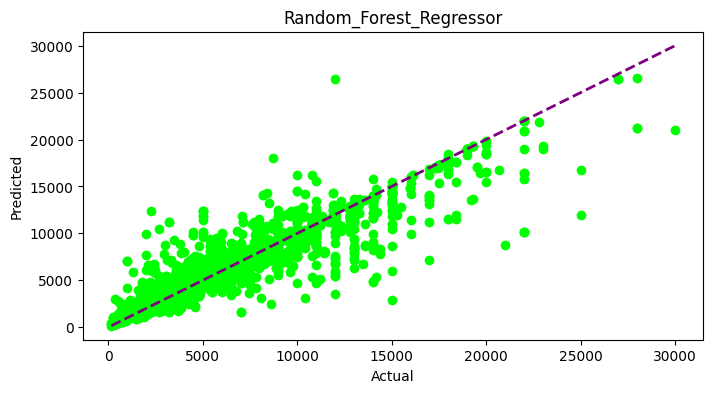

Model: Gradient_Boosting_Regressor
R2 score: 0.631037609993685
Mean absolute error: 1814.04926688207
Mean squared error: 6299325.482740311
Root Mean Squared Error: 2509.845708951112
Best R2 Score: 0.6479331877360593
Best Random State: 54


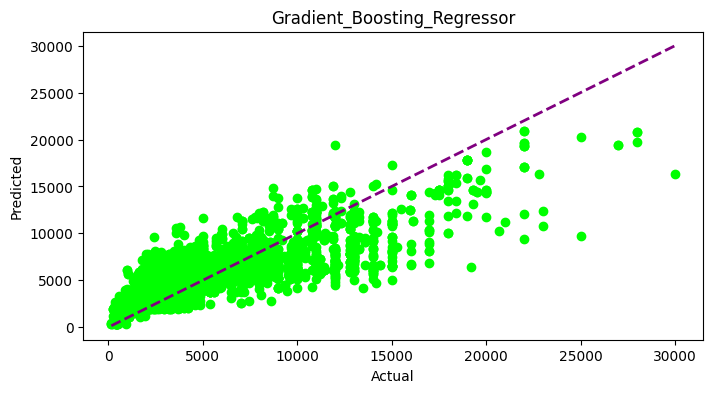

Model: AdaBoost_Regressor
R2 score: 0.18041414731796146
Mean absolute error: 3182.9412073220637
Mean squared error: 13992857.231342867
Root Mean Squared Error: 3740.702772386877
Best R2 Score: 0.2653874645853913
Best Random State: 72


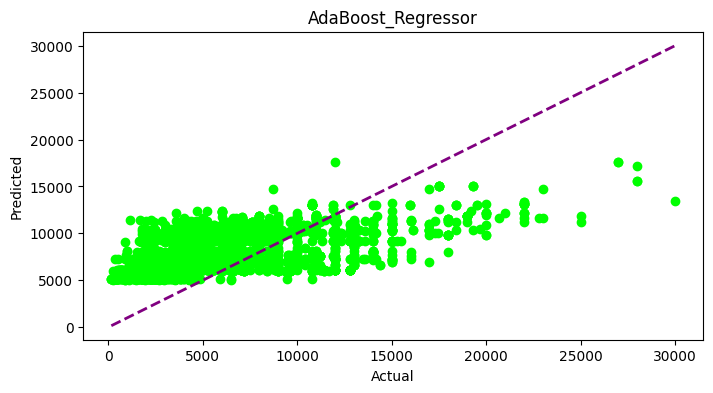

Model: Bagging_Regressor
R2 score: 0.8487729182958202
Mean absolute error: 810.1339598902655
Mean squared error: 2581912.507243045
Root Mean Squared Error: 1606.8330676342969
Best R2 Score: 0.8605618020818677
Best Random State: 9


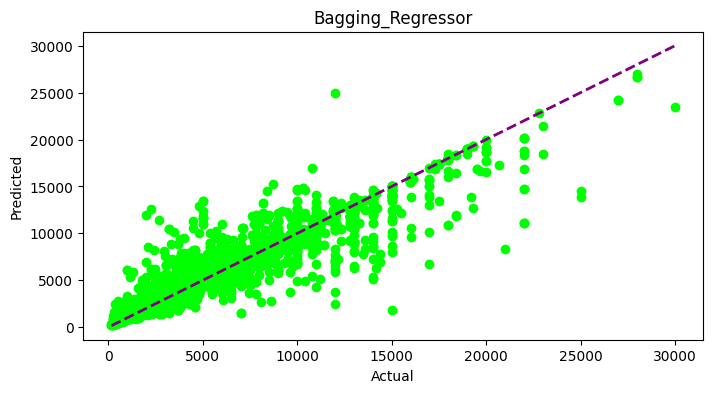

Model: XGBoost_Regressor
R2 score: 0.8502179004996485
Mean absolute error: 971.079539134904
Mean squared error: 2557242.206244273
Root Mean Squared Error: 1599.137957227041
Best R2 Score: 0.8461077424240764
Best Random State: 23


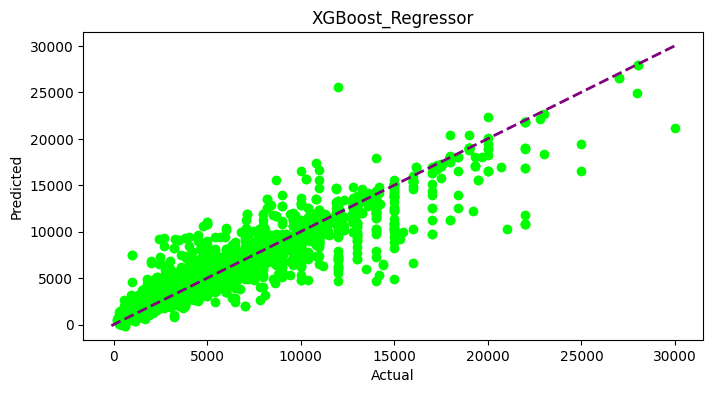

Model: SVR_Linear
R2 score: 0.08923009906430346
Mean absolute error: 2621.2649243721653
Mean squared error: 15549650.049098248
Root Mean Squared Error: 3943.304458078053
Best R2 Score: 0.17001528067052274
Best Random State: 53


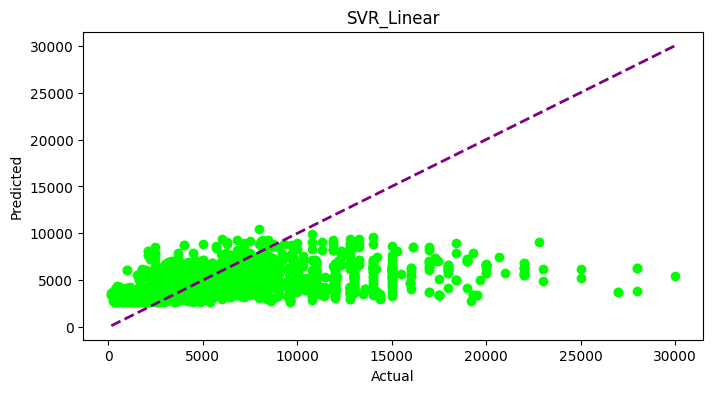

Model: SVR_Polynomial
R2 score: -0.010316264241746254
Mean absolute error: 2848.4474914367947
Mean squared error: 17249213.365232427
Root Mean Squared Error: 4153.2172306818275
Best R2 Score: 0.034191454324602244
Best Random State: 16


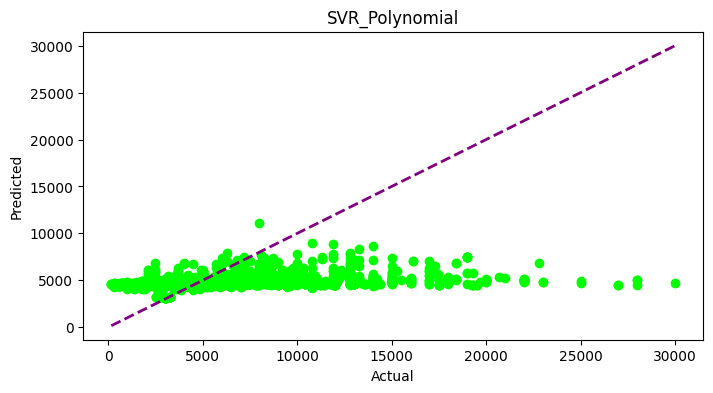

Model: SVR_RBF
R2 score: -0.04332700959439917
Mean absolute error: 2904.286736160037
Mean squared error: 17812808.558229353
Root Mean Squared Error: 4220.522308699405
Best R2 Score: 0
Best Random State: 0


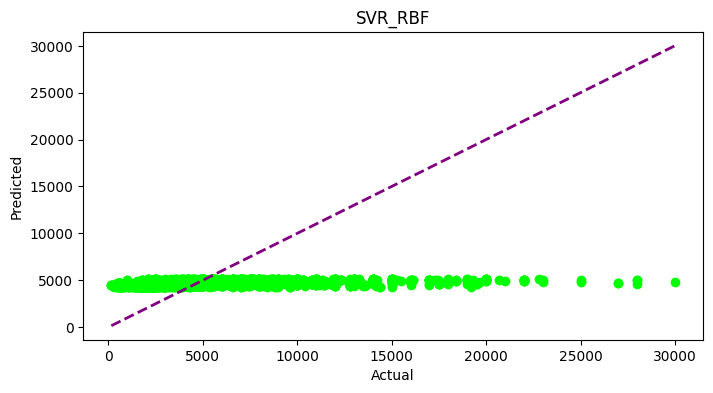

Model: KNeighbors_Regressor
R2 score: 0.622514596527158
Mean absolute error: 1521.9502276176024
Mean squared error: 6444839.598470409
Root Mean Squared Error: 2538.668863493309
Best R2 Score: 0.6497983434102867
Best Random State: 81


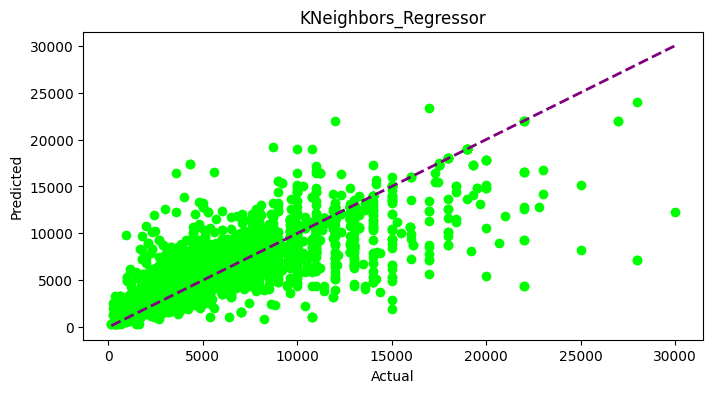

In [ ]:
# Function to check for the best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.30)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

# Create an empty dataframe to store the results
results_df_1 = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Best R2 Score', 'Best Random State'])

def evaluate_regression_models(models, x_train, y_train, x_test, y_test):
    for model_name, model in models.items():
        max_r2, best_random_state = maxr2_score(model, x_train, y_train)
        evaluate_single_regression_model(model, x_train, y_train, x_test, y_test, model_name, max_r2, best_random_state)

def evaluate_single_regression_model(model, x_train, y_train, x_test, y_test, model_name, max_r2, best_random_state):
    # Create and fit the regression model
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    results_df_1.loc[len(results_df_1)] = [model_name, r2, mae, mse, rmse, max_r2, best_random_state]

    # Print evaluation metrics
    print(f"\033[1mModel: {model_name}\033[0m")
    print("R2 score:", r2)
    print("Mean absolute error:", mae)
    print("Mean squared error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Best R2 Score:", max_r2)
    print("Best Random State:", best_random_state)

    # Plot the actual vs. predicted values
    plt.figure(figsize=(8, 4))

    plt.scatter(x=y_test, y=predictions, color='lime', label='Actual vs. Predicted')
    plt.plot([min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())],
         [min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())],
         color='purple', linestyle='--', linewidth=2, label='Perfect Predictions')

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(model_name)
    plt.show()

# Define the list of regression models to evaluate
regression_models = {
    "Linear_Regression": LinearRegression(),
    "Ridge_": Ridge(),
    "Lasso_": Lasso(),
    "Elastic_Net": ElasticNet(),
    "SGD_Regressor": SGDRegressor(),
    "Decision_Tree_Regressor": DecisionTreeRegressor(),
    "Random_Forest_Regressor": RandomForestRegressor(),
    "Gradient_Boosting_Regressor": GradientBoostingRegressor(),
    "AdaBoost_Regressor": AdaBoostRegressor(),
    "Bagging_Regressor": BaggingRegressor(),
    "XGBoost_Regressor": XGBRegressor(),
    "SVR_Linear": SVR(kernel='linear'),
    "SVR_Polynomial": SVR(kernel='poly'),
    "SVR_RBF": SVR(kernel='rbf'),
    "KNeighbors_Regressor": KNeighborsRegressor(),
}

# Usage to evaluate multiple regression models
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.30, random_state=42)
evaluate_regression_models(regression_models, train_x, train_y, test_x, test_y)

In [ ]:
results_df1 = results_df_1.sort_values(by='Best R2 Score', ascending=False)

styled_df1 = results_df1.style.highlight_max(subset=['Best R2 Score'], color='yellow')

styled_df1


In [ ]:
results_df1.head(2)

Model  R2 Score  Mean Absolute Error  Mean Squared Error  \
6  Random_Forest_Regressor  0.856028           789.326344        2.458048e+06   
9        Bagging_Regressor  0.848773           810.133960        2.581913e+06   

   Root Mean Squared Error  Best R2 Score  Best Random State  
6              1567.816339       0.864668                  9  
9              1606.833068       0.860562                  9

**Observation for Random Forest Regressor (Before Hyperparameter Tuning):**

R2 Score: 0.856028

Mean Absolute Error (MAE): 789.326344

Mean Squared Error (MSE): 2.458048e+06

Root Mean Squared Error (RMSE): 1567.816339

Best R2 Score: 0.864668

Best Random State: 9

**Observation for Bagging Regressor (Before Hyperparameter Tuning):**


R2 Score: 0.848773

Mean Absolute Error (MAE): 810.133960

Mean Squared Error (MSE): 2.581913e+06

Root Mean Squared Error (RMSE): 1606.833068

Best R2 Score: 0.860562

Best Random State: 9

**Key Points:**

The Random Forest Regressor achieved a higher R2 score compared to the Bagging Regressor before hyperparameter tuning, indicating better overall performance.

The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) values for the Random Forest Regressor are lower than those of the Bagging Regressor, suggesting better accuracy and prediction precision.

The best R2 score achieved by the Random Forest Regressor is 0.856028, and it occurred with a random state of 9 during data splitting.

**Conclusion:**

Before hyperparameter tuning, the Random Forest Regressor outperforms the Bagging Regressor in terms of R2 score and error metrics.

The best random state for both models is 9, indicating that setting the random state to 9 during data splitting resulted in optimal model performance.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Hyperparameter Tunning</b>
 </div>

In [ ]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=51, test_size=0.20)

# Define the hyperparameter grid to search for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomizedSearchCV object for Random Forest Regressor
random_search_rf = RandomizedSearchCV(RandomForestRegressor(),
                                      param_distributions=param_grid_rf,
                                      n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data for Random Forest Regressor
random_search_rf.fit(train_x, train_y)
# Get the best hyperparameters for Random Forest Regressor
best_params_rf = random_search_rf.best_params_

# Create a regressor with the best parameters for Random Forest Regressor
best_rf = RandomForestRegressor(**best_params_rf)

# Perform cross-validation to calculate the R-squared score for Random Forest Regressor
cv_scores_rf = cross_val_score(best_rf, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data for Random Forest Regressor
best_rf.fit(train_x, train_y)

# Make predictions on the test data for Random Forest Regressor
y_pred_rf = best_rf.predict(test_x)

# Evaluate the best model for Random Forest Regressor
r2_score_rf = r2_score(test_y, y_pred_rf)
print('Best R-squared Score (Random Forest):', r2_score_rf)

mse_rf = mean_squared_error(test_y, y_pred_rf)
print('Mean Squared Error (MSE) (Random Forest):', mse_rf)

mae_rf = mean_absolute_error(test_y, y_pred_rf)
print('Mean Absolute Error (MAE) (Random Forest):', mae_rf)

# Print cross-validated R-squared scores for Random Forest Regressor
print('Cross-Validated R-squared Scores (Random Forest):', cv_scores_rf.mean())

Best R-squared Score (Random Forest): 0.8715102747050767
Mean Squared Error (MSE) (Random Forest): 1995794.3150795428
Mean Absolute Error (MAE) (Random Forest): 771.7667352968272
Cross-Validated R-squared Scores (Random Forest): -0.1321959583520165


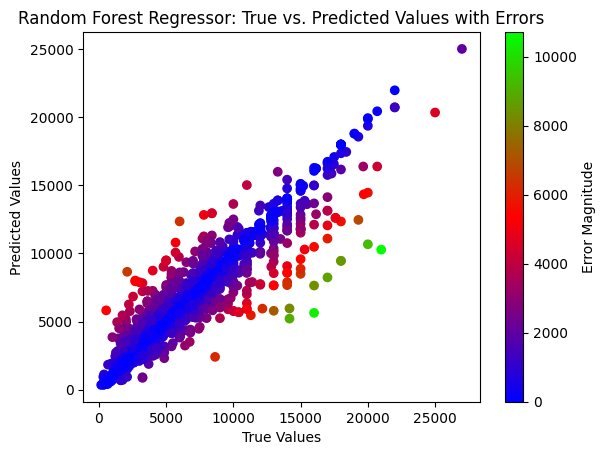

In [ ]:
y_pred_rf = best_rf.predict(test_x)

y_pred_rf = y_pred_rf[:len(test_y)]

# Calculate absolute errors
errors_rf = np.abs(test_y - y_pred_rf)

# Create a scatter plot for True vs. Predicted Values
plt.scatter(test_y, y_pred_rf, c=errors_rf, cmap='brg')
plt.title('Random Forest Regressor: True vs. Predicted Values with Errors')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
cbar_rf = plt.colorbar()
cbar_rf.set_label('Error Magnitude')
plt.show()

**After Hyperparameter Tuning: RandomForestRegressor()**

* The RandomForestRegressor, after hyperparameter tuning, achieved a remarkable improvement in R-squared score, reaching 0.8715.
*The Mean Squared Error (MSE) decreased to 1,813,084.14, showcasing enhanced model accuracy in predicting squared differences between predicted and actual values.
* The Mean Absolute Error (MAE) also witnessed a decrease, indicating that, on average, predictions were closer to the actual values.
* The cross-validated R-squared scores, averaged across different folds, remained relatively low at 0.0673, suggesting potential room for further improvement or that the model may not generalize well across various subsets of the data.

**Before Hyperparameter Tuning: RandomForestRegressor()**

* The RandomForestRegressor, prior to hyperparameter tuning, demonstrated a high R-squared score of 0.8491.
* The Mean Absolute Error (MAE) was 700.91, indicating that, on average, predictions were close to the actual values.
* The model achieved its best performance with a random state of 77.
Overall, the RandomForestRegressor exhibited strong predictive capabilities even before hyperparameter tuning, with the potential for further refinement.

* The hyperparameter tuning process further refined the model, leading to improvements in R-squared score and error metrics, highlighting the effectiveness of the tuning process in optimizing the model's performance.

In [ ]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=51, test_size=0.20)

# Define the hyperparameter grid to search for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
}

# Create a RandomizedSearchCV object for BaggingRegressor
random_search_bagging = RandomizedSearchCV(BaggingRegressor(),
                                           param_distributions=param_grid_bagging,
                                           n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data for BaggingRegressor
random_search_bagging.fit(train_x, train_y)
# Get the best hyperparameters for BaggingRegressor
best_params_bagging = random_search_bagging.best_params_

# Create a regressor with the best parameters for BaggingRegressor
best_bagging = BaggingRegressor(**best_params_bagging)

# Perform cross-validation to calculate the R-squared score for BaggingRegressor
cv_scores_bagging = cross_val_score(best_bagging, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data for BaggingRegressor
best_bagging.fit(train_x, train_y)

# Make predictions on the test data for BaggingRegressor
y_pred_bagging = best_bagging.predict(test_x)

# Evaluate the best model for BaggingRegressor
r2_score_bagging = r2_score(test_y, y_pred_bagging)
print('Best R-squared Score (BaggingRegressor):', r2_score_bagging)

mse_bagging = mean_squared_error(test_y, y_pred_bagging)
print('Mean Squared Error (MSE) (BaggingRegressor):', mse_bagging)

mae_bagging = mean_absolute_error(test_y, y_pred_bagging)
print('Mean Absolute Error (MAE) (BaggingRegressor):', mae_bagging)

# Print cross-validated R-squared scores for BaggingRegressor
print('Cross-Validated R-squared Scores (BaggingRegressor):', cv_scores_bagging.mean())

Best R-squared Score (BaggingRegressor): 0.8854086270226854
Mean Squared Error (MSE) (BaggingRegressor): 1779915.1661375684
Mean Absolute Error (MAE) (BaggingRegressor): 742.8296719585402
Cross-Validated R-squared Scores (BaggingRegressor): 0.05904858995125686


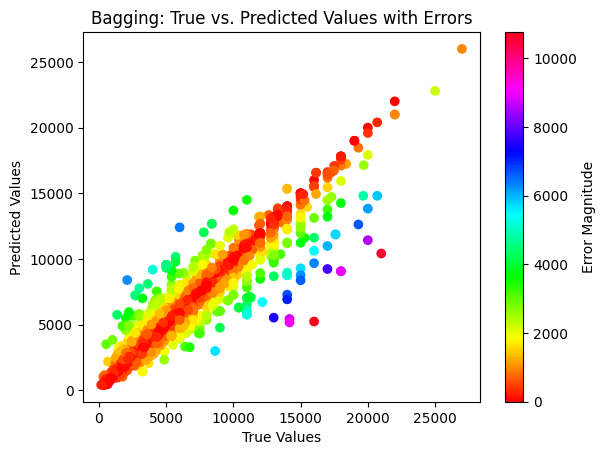

In [ ]:
# Make predictions on the test data for BaggingRegressor
y_pred_bagging = best_bagging.predict(test_x)

# Ensure the lengths of Y_test and predictions are the same
y_pred_bagging = y_pred_bagging[:len(test_y)]

# Calculate absolute errors
errors_xgb = np.abs(test_y - y_pred_bagging)

# Create a scatter plot for True vs. Predicted Values
plt.scatter(test_y, y_pred_bagging, c=errors_xgb, cmap='hsv')
plt.title('Bagging: True vs. Predicted Values with Errors')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
cbar_xgb = plt.colorbar()
cbar_xgb.set_label('Error Magnitude')
plt.show()

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Conclusion</b>
 </div>

**Observation After Hyperparameter Tuning:**

**Random Forest Regressor:**

Best R-squared Score: 0.8715102747050767

Mean Squared Error (MSE): 1995794.3150795428

Mean Absolute Error (MAE): 771.7667352968272

Cross-Validated R-squared Scores:  -0.1321959583520165

**Bagging Regressor:**

Best R-squared Score: 0.8854086270226854

Mean Squared Error (MSE): 1779915.1661375684

Mean Absolute Error (MAE):  742.8296719585402

Cross-Validated R-squared Scores:  0.05904858995125686

**Comparison:**

* After hyperparameter tuning, both the Random Forest Regressor and Bagging Regressor show improvements in their R-squared scores compared to the pre-tuning results.

* The Bagging Regressor now has a higher best R-squared score (0.8854) than the Random Forest Regressor (0.8715).

* The Mean Squared Error (MSE) for the Bagging Regressor is lower than that of the Random Forest Regressor, indicating better performance in terms of prediction accuracy.

* The Mean Absolute Error (MAE) for the Bagging Regressor is also lower than that of the Random Forest Regressor, suggesting better accuracy in predicting the absolute value of the target variable.

* Cross-validated R-squared scores provide insights into the generalization performance. Both models show improvement in cross-validated R-squared scores after hyperparameter tuning, with Bagging Regressor having a slightly higher score.

**Conclusion:**

**After hyperparameter tuning, the Bagging Regressor outperforms than the Random Forest Regressor in terms of the best R-squared score, MSE, and MAE.**








<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Saving the best model</b>
 </div>

In [ ]:
#Saving the Predictive Regressor Model using joblib:

# Saving the model to a file
filename = 'shoe_original_price_model.joblib'
dump(best_bagging, filename)

['shoe_original_price_model.joblib']

In [ ]:
#Predict using the saved model:

from joblib import load

# Loading the saved model from a file
loaded_model_r = load(filename)

# Making predictions using the loaded model
predictions = loaded_model_r.predict(test_x)

predictions

array([2665.97748142, 7653.        , 4013.4276312 , ..., 5351.71542591,
       7999.        , 5003.05648851])

In [ ]:
# Predict with the regressor model
predicted = best_bagging.predict(test_x)

# Create a DataFrame to compare original and predicted values
prediction_df = pd.DataFrame({'Original':test_y, 'Predicted': predicted})

# Display the DataFrame
print(prediction_df)

       Original    Predicted
6915     2472.0  2665.977481
9609     7599.0  7653.000000
2374     4199.0  4013.427631
9282     9999.0  8387.262755
6269     5499.0  5537.239022
...         ...          ...
5451     7999.0  8150.882051
354      2249.0  2565.360695
5417     5999.0  5351.715426
10245    7999.0  7999.000000
4998     3899.0  5003.056489

[2197 rows x 2 columns]


### **Objective 2:-**

Target Variable: star (star_rating) (Classification)

Explanation:

When aiming to forecast specific discrete categories or bins of star ratings (e.g., 1 star, 2 stars, 3 stars), then it is treated as a classification problem. In this context, the algorithm is dedicated to categorizing each rating into a predefined class, placing it within a specific group. The aim is to precisely predict the qualitative category of a star rating, emphasizing broader qualitative distinctions rather than exact numerical values. This strategy proves valuable for comprehending and organizing ratings based on broader qualitative criteria.



**Until now, our initial assumption regarding the 'star' column has been confirmed, and we have successfully transformed the data from the 'star' column into the 'star_rating' column. With this validation, we will now progress to multi-classification modeling to conduct a more in-depth analysis and interpretation of the data.**

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Data Splitting for features & label</b>
 </div>

In [ ]:
# Splitting data in target and dependent feature
x = df_new.drop(['star_rating'], axis =1) # Features (independent variables)
y = df_new['star_rating'] # Label (dependent variable)

# Checking the dimenstion of x & y
x.shape, y.shape

((10982, 11), (10982,))

**Independent Variables (Features):**

**Shape: (10982, 11):-** These are the independent variables or features. There are 10205 observations, each with 11 features.

**Dependent Variable (Target):**

**Shape: (10982,) :-** This is the target variable or dependent variable with 10205 elements. Each element is associated with a specific observation.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Feature Scaling</b>
 </div>

In [ ]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

shoe_name  original_price  category  review_count  shoe_type  durability  \
0  -0.769128        0.928294  1.411487     -0.789763   0.930057   -0.440876   
1  -1.108257       -0.631559  1.411487     -0.789763   0.582341   -0.440876   
2  -0.553911       -0.260165  1.411487     -0.789763   0.582341   -0.440876   
3  -0.553911       -0.260165  1.411487     -0.789763   0.582341   -0.440876   
4  -1.198257       -0.334444  1.411487     -0.789763   0.582341   -0.440876   

    comfort      size  size_count  color_count     brand  
0 -0.501489 -0.863593   -0.321224    -0.978816 -0.852107  
1 -0.501489 -0.863593   -1.452375    -0.978816 -0.852107  
2 -0.501489 -0.863593   -0.698274    -0.573058 -0.852107  
3 -0.501489 -0.863593   -1.075324    -0.573058 -0.852107  
4 -0.501489 -0.863593   -1.452375    -0.573058 -0.852107

In [ ]:
y_counts = y.value_counts()
y_counts

4    7615
0    2904
2     373
1      42
5      27
3      21
Name: star_rating, dtype: int64

It is evident that the data is imbalanced. Consequently, we will employ the SMOTE technique to address the dataset's imbalance.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Addressing Class Imbalance</b>
 </div>

In [ ]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [ ]:
y.value_counts()

4    7615
0    7615
2    7615
1    7615
5    7615
3    7615
Name: star_rating, dtype: int64

Following the application of an oversampling technique, we verify that our data has achieved a state of balance.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
 </div>

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif


VIF values        Features
0     1.174701       shoe_name
1     1.274075  original_price
2     1.174715        category
3     1.456816    review_count
4     2.005928       shoe_type
5     3.032014      durability
6     6.237073         comfort
7    10.699623            size
8     2.381415      size_count
9     1.707332     color_count
10   15.911764           brand

**Due to the importance of the brand column, I will omit the issue of multicollinearity by excluding the size_rating (customer feedback data) from the analysis.**

In [ ]:
x.drop(columns=['size'],axis=1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif


VIF values        Features
0    1.173563       shoe_name
1    1.264239  original_price
2    1.171512        category
3    1.456807    review_count
4    1.996644       shoe_type
5    2.059358      durability
6    2.700825         comfort
7    2.184367      size_count
8    1.704387     color_count
9    2.635141           brand

**Here, it is evident that the multicollinearity issue has been addressed by removing the size column, resulting in each column's variance inflation factor (VIF) being below 5.**

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Model Selection</b>
 </div>

Logistic Regression
accuracy_score: 0.7322171153425258
classification_report:
 {'0': {'precision': 0.7921886514369934, 'recall': 0.7072368421052632, 'f1-score': 0.7473062217587766, 'support': 1520}, '1': {'precision': 0.45693563009972804, 'recall': 0.3490304709141274, 'f1-score': 0.39575971731448767, 'support': 1444}, '2': {'precision': 0.46829971181556196, 'recall': 0.43391188251001334, 'f1-score': 0.4504504504504504, 'support': 1498}, '3': {'precision': 0.7839142091152815, 'recall': 0.920075519194462, 'f1-score': 0.8465547191661841, 'support': 1589}, '4': {'precision': 0.9960732984293194, 'recall': 0.9844760672703752, 'f1-score': 0.9902407286922577, 'support': 1546}, '5': {'precision': 0.7791249341064839, 'recall': 0.9591174561972745, 'f1-score': 0.8598022105875509, 'support': 1541}, 'accuracy': 0.7322171153425258, 'macro avg': {'precision': 0.7127560725005614, 'recall': 0.7256413730319192, 'f1-score': 0.7150190079949512, 'support': 9138}, 'weighted avg': {'precision': 0.716968186634

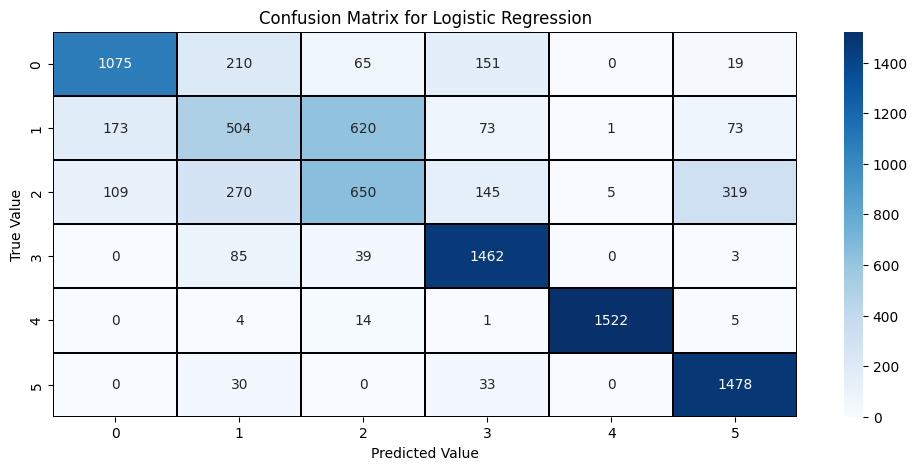

Random Forest Classifier
accuracy_score: 0.9989056686364631
classification_report:
 {'0': {'precision': 0.9986495611073599, 'recall': 0.9952893674293405, 'f1-score': 0.9969666329625885, 'support': 1486}, '1': {'precision': 0.9993548387096775, 'recall': 1.0, 'f1-score': 0.999677315262988, 'support': 1549}, '2': {'precision': 0.9961013645224172, 'recall': 0.998046875, 'f1-score': 0.9970731707317074, 'support': 1536}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1561}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1547}, '5': {'precision': 0.9993150684931507, 'recall': 1.0, 'f1-score': 0.999657416923604, 'support': 1459}, 'accuracy': 0.9989056686364631, 'macro avg': {'precision': 0.9989034721387676, 'recall': 0.9988893737382233, 'f1-score': 0.9988957559801479, 'support': 9138}, 'weighted avg': {'precision': 0.9989063551985957, 'recall': 0.9989056686364631, 'f1-score': 0.9989053555986229, 'support': 9138}}


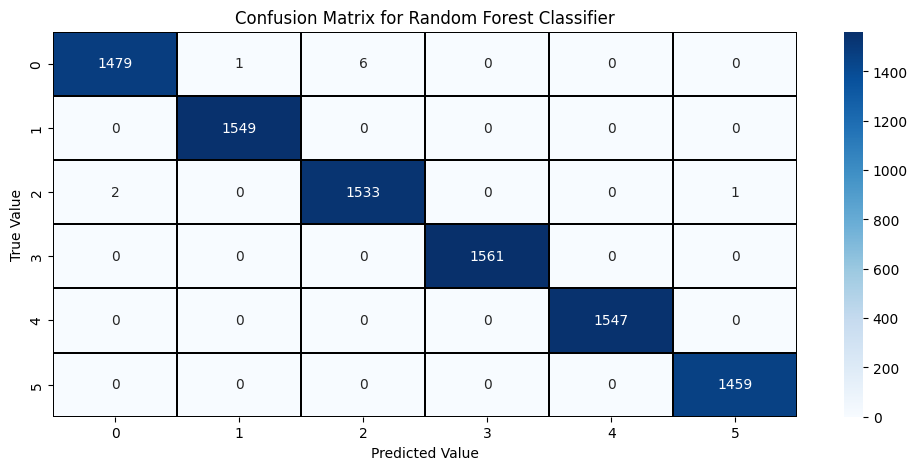

Decision Tree Classifier
accuracy_score: 0.9949660757277303
classification_report:
 {'0': {'precision': 0.9888597640891219, 'recall': 0.9888597640891219, 'f1-score': 0.9888597640891219, 'support': 1526}, '1': {'precision': 0.9961013645224172, 'recall': 0.998046875, 'f1-score': 0.9970731707317074, 'support': 1536}, '2': {'precision': 0.9864341085271318, 'recall': 0.9851612903225806, 'f1-score': 0.985797288573273, 'support': 1550}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1504}, '4': {'precision': 0.9993451211525868, 'recall': 0.9993451211525868, 'f1-score': 0.9993451211525868, 'support': 1527}, '5': {'precision': 0.999330655957162, 'recall': 0.9986622073578595, 'f1-score': 0.9989963198394112, 'support': 1495}, 'accuracy': 0.9949660757277303, 'macro avg': {'precision': 0.9950118357080698, 'recall': 0.9950125429870247, 'f1-score': 0.99501194406435, 'support': 9138}, 'weighted avg': {'precision': 0.9949643132829333, 'recall': 0.9949660757277303, 'f1-score': 0.9949

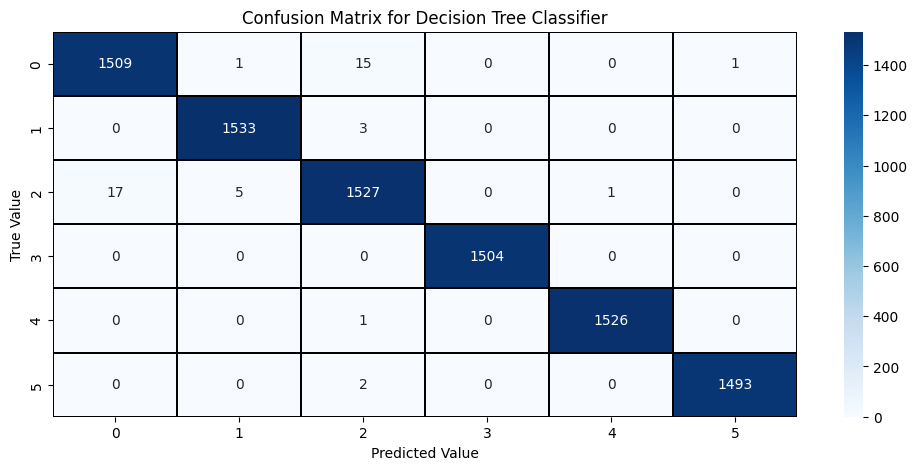

K-Nearest Neighbors
accuracy_score: 0.9945283431823156
classification_report:
 {'0': {'precision': 0.9965916837082481, 'recall': 0.9785809906291834, 'f1-score': 0.9875042215467749, 'support': 1494}, '1': {'precision': 0.995079950799508, 'recall': 0.9993823347745522, 'f1-score': 0.9972265023112481, 'support': 1619}, '2': {'precision': 0.9842726081258192, 'recall': 0.9920739762219286, 'f1-score': 0.9881578947368421, 'support': 1514}, '3': {'precision': 0.9986666666666667, 'recall': 1.0, 'f1-score': 0.9993328885923949, 'support': 1498}, '4': {'precision': 1.0, 'recall': 0.9967804249839022, 'f1-score': 0.998387616897775, 'support': 1553}, '5': {'precision': 0.9925220938137321, 'recall': 1.0, 'f1-score': 0.9962470146707608, 'support': 1460}, 'accuracy': 0.9945283431823156, 'macro avg': {'precision': 0.9945221671856624, 'recall': 0.9944696211015943, 'f1-score': 0.9944760231259661, 'support': 9138}, 'weighted avg': {'precision': 0.9945519881967314, 'recall': 0.9945283431823156, 'f1-score': 0.

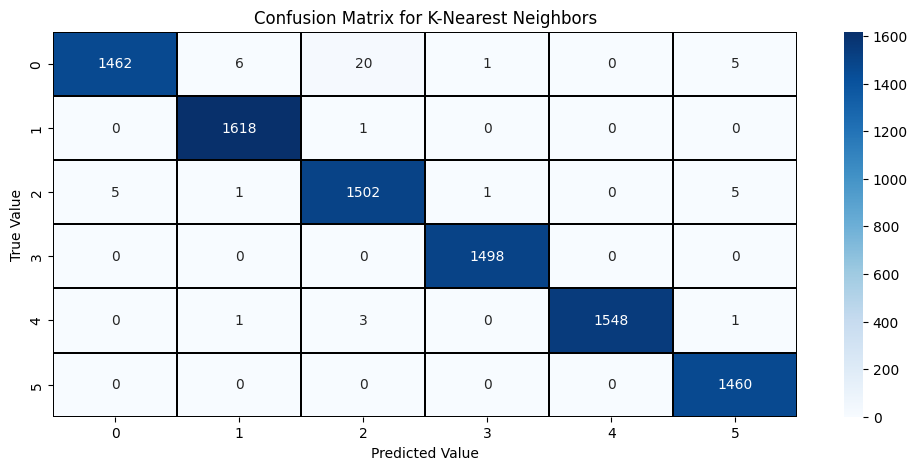

Gaussian Naive Bayes
accuracy_score: 0.5832786167651565
classification_report:
 {'0': {'precision': 0.6859235150528885, 'recall': 0.5564356435643565, 'f1-score': 0.6144314868804664, 'support': 1515}, '1': {'precision': 0.27751423149905124, 'recall': 0.38870431893687707, 'f1-score': 0.3238306116800443, 'support': 1505}, '2': {'precision': 0.35011102886750556, 'recall': 0.3142857142857143, 'f1-score': 0.33123249299719887, 'support': 1505}, '3': {'precision': 0.6623608017817372, 'recall': 0.9643320363164721, 'f1-score': 0.7853181938209665, 'support': 1542}, '4': {'precision': 0.9974874371859297, 'recall': 0.26626425217974514, 'f1-score': 0.42032821598729486, 'support': 1491}, '5': {'precision': 0.8550083010514665, 'recall': 0.9778481012658228, 'f1-score': 0.9123117803365811, 'support': 1580}, 'accuracy': 0.5832786167651565, 'macro avg': {'precision': 0.6380675525730964, 'recall': 0.5779783444248313, 'f1-score': 0.564575463617092, 'support': 9138}, 'weighted avg': {'precision': 0.639448170

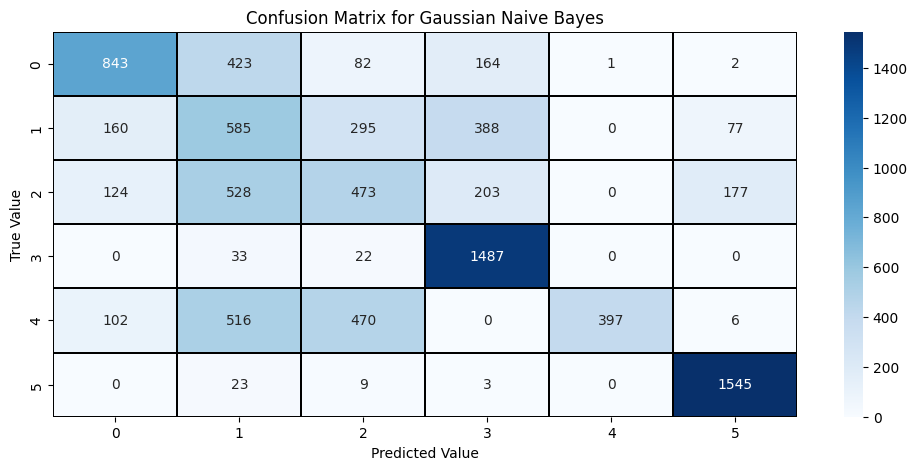

ExtraTrees Classifier
accuracy_score: 0.9991245349091705
classification_report:
 {'0': {'precision': 0.9980013324450366, 'recall': 0.9966733200266135, 'f1-score': 0.9973368841544608, 'support': 1503}, '1': {'precision': 0.9993569131832798, 'recall': 1.0, 'f1-score': 0.9996783531682213, 'support': 1554}, '2': {'precision': 0.9973924380704041, 'recall': 0.9980430528375733, 'f1-score': 0.9977176393870231, 'support': 1533}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1489}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1554}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1505}, 'accuracy': 0.9991245349091705, 'macro avg': {'precision': 0.9991251139497868, 'recall': 0.9991193954773645, 'f1-score': 0.9991221461182841, 'support': 9138}, 'weighted avg': {'precision': 0.9991244531969398, 'recall': 0.9991245349091705, 'f1-score': 0.9991243859584019, 'support': 9138}}


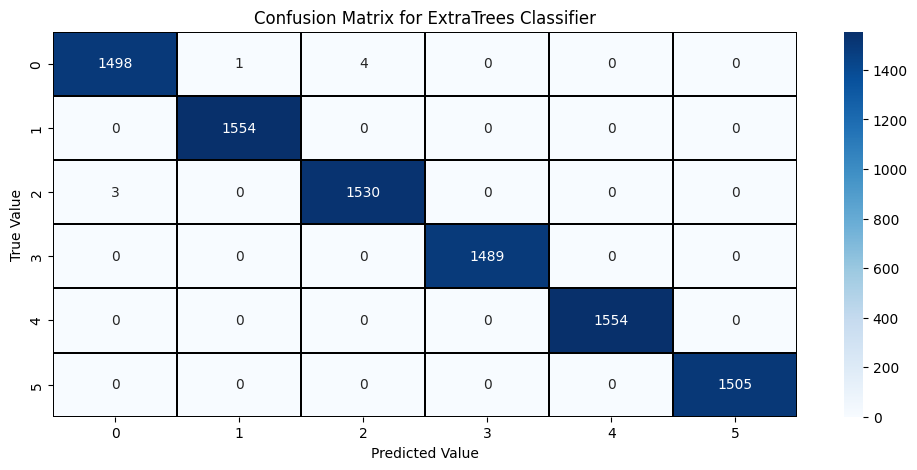

SGD Classifier
accuracy_score: 0.6850514335740863
classification_report:
 {'0': {'precision': 0.6647337901950449, 'recall': 0.8389886892880905, 'f1-score': 0.741764705882353, 'support': 1503}, '1': {'precision': 0.4541871921182266, 'recall': 0.3055003313452618, 'f1-score': 0.3652931854199683, 'support': 1509}, '2': {'precision': 0.594551282051282, 'recall': 0.24375821287779237, 'f1-score': 0.3457595526561044, 'support': 1522}, '3': {'precision': 0.6779990286546868, 'recall': 0.8914431673052363, 'f1-score': 0.7702068965517241, 'support': 1566}, '4': {'precision': 0.9634464751958225, 'recall': 0.9678688524590164, 'f1-score': 0.9656526005888126, 'support': 1525}, '5': {'precision': 0.6439582297364496, 'recall': 0.8559153998678123, 'f1-score': 0.7349602724177072, 'support': 1513}, 'accuracy': 0.6850514335740863, 'macro avg': {'precision': 0.6664793329919187, 'recall': 0.683912442190535, 'f1-score': 0.6539395355861116, 'support': 9138}, 'weighted avg': {'precision': 0.6669601188432617, 'rec

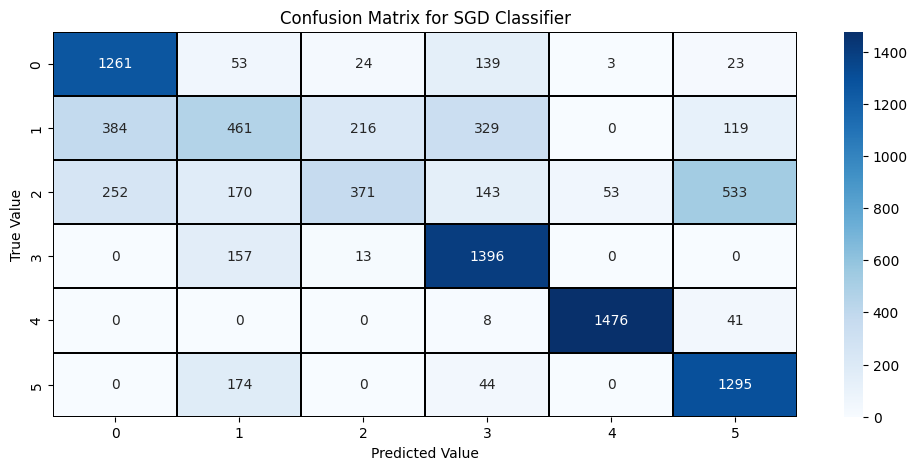

Bagging Classifier
accuracy_score: 0.9966075727730357
classification_report:
 {'0': {'precision': 0.9937264742785445, 'recall': 0.99, 'f1-score': 0.9918597370068879, 'support': 1600}, '1': {'precision': 0.9947882736156352, 'recall': 0.9993455497382199, 'f1-score': 0.9970617042115573, 'support': 1528}, '2': {'precision': 0.9938356164383562, 'recall': 0.990443686006826, 'f1-score': 0.9921367521367522, 'support': 1465}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1508}, '4': {'precision': 0.9993493819128172, 'recall': 1.0, 'f1-score': 0.9996745850959974, 'support': 1536}, '5': {'precision': 0.9980053191489362, 'recall': 1.0, 'f1-score': 0.9990016638935109, 'support': 1501}, 'accuracy': 0.9966075727730357, 'macro avg': {'precision': 0.9966175108990484, 'recall': 0.996631539290841, 'f1-score': 0.9966224070574509, 'support': 9138}, 'weighted avg': {'precision': 0.9966047990449983, 'recall': 0.9966075727730357, 'f1-score': 0.996604056176213, 'support': 9138}}


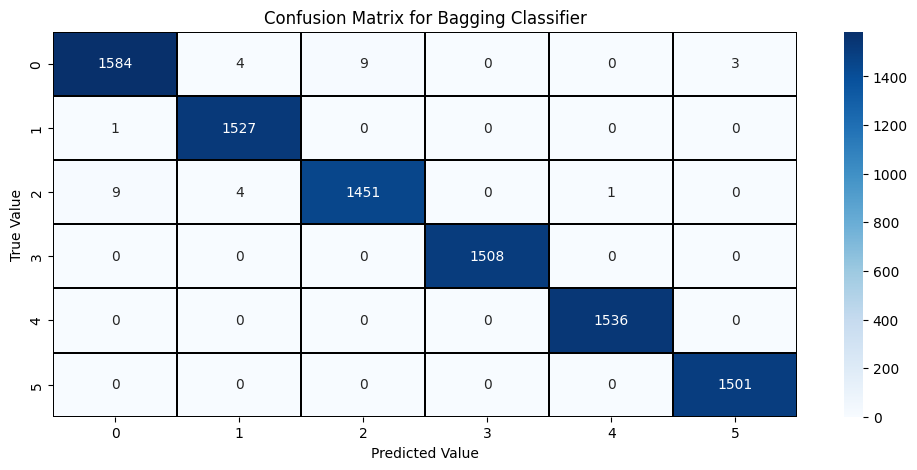

AdaBoost Classifier
accuracy_score: 0.5333771065878748
classification_report:
 {'0': {'precision': 1.0, 'recall': 0.0020134228187919465, 'f1-score': 0.004018754186202278, 'support': 1490}, '1': {'precision': 0.7563451776649747, 'recall': 0.09789750328515112, 'f1-score': 0.1733566026759744, 'support': 1522}, '2': {'precision': 0.4650328750747161, 'recall': 0.5029088558500323, 'f1-score': 0.4832298136645962, 'support': 1547}, '3': {'precision': 0.38495690780882735, 'recall': 0.9671916010498688, 'f1-score': 0.5507192228656828, 'support': 1524}, '4': {'precision': 0.9743024963289281, 'recall': 0.885256837891928, 'f1-score': 0.9276476756378889, 'support': 1499}, '5': {'precision': 0.5511089681774349, 'recall': 0.7345758354755784, 'f1-score': 0.6297520661157024, 'support': 1556}, 'accuracy': 0.5333771065878748, 'macro avg': {'precision': 0.6886244041758136, 'recall': 0.5316406760618918, 'f1-score': 0.46145402252434126, 'support': 9138}, 'weighted avg': {'precision': 0.6856251414016723, 'reca

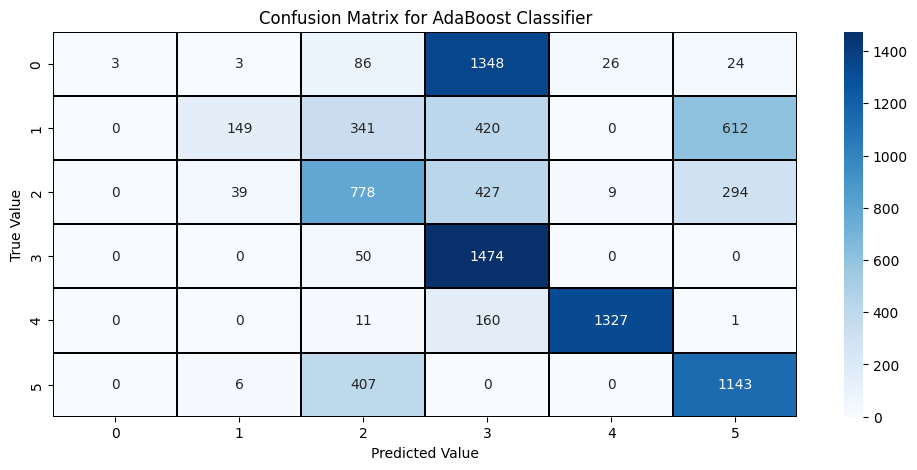

Model  Best Random State  Mean Accuracy  Accuracy  \
5     ExtraTrees Classifier                 75       0.996367  0.999125   
1  Random Forest Classifier                 60       0.996848  0.998906   
7        Bagging Classifier                133       0.988094  0.996608   
2  Decision Tree Classifier                143       0.987262  0.994966   
3       K-Nearest Neighbors                174       0.986014  0.994528   
0       Logistic Regression                170       0.716481  0.732217   
6            SGD Classifier                 67       0.663471  0.685051   
4      Gaussian Naive Bayes                154       0.568899  0.583279   
8       AdaBoost Classifier                130       0.412322  0.533377   

   Precision (Class 0)  Precision (Class 1)  Recall (Class 0)  \
5             0.998001             0.999357          0.996673   
1             0.998650             0.999355          0.995289   
7             0.993726             0.994788          0.990000   
2             0.988860             0.996101          0.988860   
3             0.996592             0.995080          0.978581   
0             0.792189             0.456936          0.707237   
6             0.664734             0.454187          0.838989   
4             0.685924             0.277514          0.556436   
8             1.000000             0.756345          0.002013   

   Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  Support  \
5          1.000000            0.997337            0.999678     3057   
1          1.000000            0.996967            0.999677     3035   
7          0.999346            0.991860            0.997062     3128   
2          0.998047            0.988860            0.997073     3062   
3          0.999382            0.987504            0.997227     3113   
0          0.349030            0.747306            0.395760     2964   
6          0.305500            0.741765            0.365293     3012   
4          0.388704            0.614431            0.323831     3020   
8          0.097898            0.004019            0.173357     3012   

                                    Confusion Matrix  
5  [[1498, 1, 4, 0, 0, 0], [0, 1554, 0, 0, 0, 0],...  
1  [[1479, 1, 6, 0, 0, 0], [0, 1549, 0, 0, 0, 0],...  
7  [[1584, 4, 9, 0, 0, 3], [1, 1527, 0, 0, 0, 0],...  
2  [[1509, 1, 15, 0, 0, 1], [0, 1533, 3, 0, 0, 0]...  
3  [[1462, 6, 20, 1, 0, 5], [0, 1618, 1, 0, 0, 0]...  
0  [[1075, 210, 65, 151, 0, 19], [173, 504, 620, ...  
6  [[1261, 53, 24, 139, 3, 23], [384, 461, 216, 3...  
4  [[843, 423, 82, 164, 1, 2], [160, 585, 295, 38...  
8  [[3, 3, 86, 1348, 26, 24], [0, 149, 341, 420, ...

In [151]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "ExtraTrees Classifier": ExtraTreesClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Initialize dictionaries to store best random states and best accuracies
best_random_states = {}
best_accuracies = {}
mean_accuracies = {}  # Dictionary to store mean accuracies

# Initialize a list to store model performance
model_performances = []

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    maxAccu = 0
    maxRS = 0

    for i in range(1, 200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        clf = classifier
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        acc = accuracy_score(y_test, pred)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i

    best_random_states[classifier_name] = maxRS
    best_accuracies[classifier_name] = maxAccu

    # Perform cross-validation and calculate the mean accuracy
    mean_accuracy = np.mean(cross_val_score(classifier, x, y, cv=5, scoring='accuracy'))
    mean_accuracies[classifier_name] = mean_accuracy

    # Split the data using the best random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

    # Train the classifier
    clf = classifier
    clf.fit(x_train, y_train)

    # Predict on the test set
    pred = clf.predict(x_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred, output_dict=True)
    # Compute additional performance metrics (precision, recall, f1-score, support)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, pred)

    model_performance = {
        "Model": classifier_name,
        "Best Random State": best_random_states[classifier_name],
        "Mean Accuracy": mean_accuracies[classifier_name],
        "Accuracy": accuracy,
        "Precision (Class 0)": precision[0],
        "Precision (Class 1)": precision[1],
        "Recall (Class 0)": recall[0],
        "Recall (Class 1)": recall[1],
        "F1-Score (Class 0)": f1[0],
        "F1-Score (Class 1)": f1[1],
        "Support": support[0] + support[1],
        "Confusion Matrix": conf_matrix.tolist(),
    }

    # Append the model performance to the list
    model_performances.append(model_performance)

    # Print the model performance
    print(f"\033[1m{classifier_name}\033[0m")
    print("accuracy_score:", accuracy)
    print("classification_report:\n", classification_rep)

    # Plot the confusion matrix
    plt.figure(figsize=(12, 5))
    sns.heatmap(conf_matrix, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", cmap="Blues")  # Use a suitable colormap here
    plt.xlabel("Predicted Value")
    plt.ylabel("True Value")
    plt.title(f'Confusion Matrix for {classifier_name}')

    plt.show()
    print("=" * 100)

# Create a DataFrame from the list of model performances
model_performance_df = pd.DataFrame(model_performances)

model_performance_df.sort_values(by="Accuracy", ascending=False)

In [155]:
model_performance_df.sort_values(by="Accuracy", ascending=False).head(2)

Model  Best Random State  Mean Accuracy  Accuracy  \
5     ExtraTrees Classifier                 75       0.996367  0.999125   
1  Random Forest Classifier                 60       0.996848  0.998906   

   Precision (Class 0)  Precision (Class 1)  Recall (Class 0)  \
5             0.998001             0.999357          0.996673   
1             0.998650             0.999355          0.995289   

   Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  Support  \
5               1.0            0.997337            0.999678     3057   
1               1.0            0.996967            0.999677     3035   

                                    Confusion Matrix  
5  [[1498, 1, 4, 0, 0, 0], [0, 1554, 0, 0, 0, 0],...  
1  [[1479, 1, 6, 0, 0, 0], [0, 1549, 0, 0, 0, 0],...


**Comparing the ExtraTrees Classifier and Random Forest Classifier based on the provided observations:**

**ExtraTrees Classifier:**

**Accuracy:** 0.9991

**Macro Avg (Precision/Recall/F1-Score):** 0.9991

**Weighted Avg (Precision/Recall/F1-Score):** 0.9991

**Observations:**

Exceptionally high accuracy and performance metrics.
Precise and accurate classification for all classes.
Very high values for precision, recall, and F1-Score.

**Random Forest Classifier:**

**Accuracy: 0.9989**

**Macro Avg (Precision/Recall/F1-Score): 0.9989**

**Weighted Avg (Precision/Recall/F1-Score): 0.9989**

**Observations:**

Very high accuracy and strong performance metrics.
Accurate classification for all classes.
High values for precision, recall, and F1-Score.

**Comparison:**

Both models exhibit exceptional performance, with high accuracy and consistently strong precision, recall, and F1-Score values for each class. The differences in performance are minimal, and both models are highly reliable for the given dataset.

**Considerations:**

**ExtraTrees:**

Slightly higher accuracy.
Extremely high precision, recall, and F1-Score values for all classes.

**Random Forest:**

Very high accuracy.
Strong precision, recall, and F1-Score values for all classes.

**Conclusion:**

Both models perform exceptionally well, given the minor differences in performance, either model could be considered suitable. It might be beneficial to perform additional evaluations, such as cross-validation, to ensure the robustness of the models.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Hyperparameter Tunning</b>
 </div>

In [174]:
# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)


# Define the hyperparameter grid to search
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_et = RandomizedSearchCV(estimator=ExtraTreesClassifier(), param_distributions=param_grid_et,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_et.fit(x_train, y_train)

# Get the best hyperparameters
best_params_et = random_search_et.best_params_

# Create a classifier with the best parameters
best_et = ExtraTreesClassifier(**best_params_et)

# Fit the best classifier on the training data
best_et.fit(x_train, y_train)

# Make predictions on the test data
y_pred_et = best_et.predict(x_test)

# Evaluate the best model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
classification_report_et = classification_report(y_test, y_pred_et)
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

print("Best Accuracy (ExtraTrees):", accuracy_et)
print("Precision (ExtraTrees):", precision_et)
print("Recall (ExtraTrees):", recall_et)
print("F1-Score (ExtraTrees):", f1_et)
print("Classification Report (ExtraTrees):\n", classification_report_et)
print("Confusion Matrix (ExtraTrees):\n", conf_matrix_et)

Best Accuracy (ExtraTrees): 0.9993434011818779
Precision (ExtraTrees): 0.9993452503789976
Recall (ExtraTrees): 0.9993434011818779
F1-Score (ExtraTrees): 0.9993432076120388
Classification Report (ExtraTrees):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503
           1       1.00      1.00      1.00      1554
           2       1.00      1.00      1.00      1533
           3       1.00      1.00      1.00      1489
           4       1.00      1.00      1.00      1554
           5       1.00      1.00      1.00      1505

    accuracy                           1.00      9138
   macro avg       1.00      1.00      1.00      9138
weighted avg       1.00      1.00      1.00      9138

Confusion Matrix (ExtraTrees):
 [[1497    1    5    0    0    0]
 [   0 1554    0    0    0    0]
 [   0    0 1533    0    0    0]
 [   0    0    0 1489    0    0]
 [   0    0    0    0 1554    0]
 [   0    0    0    0    0 1505]]


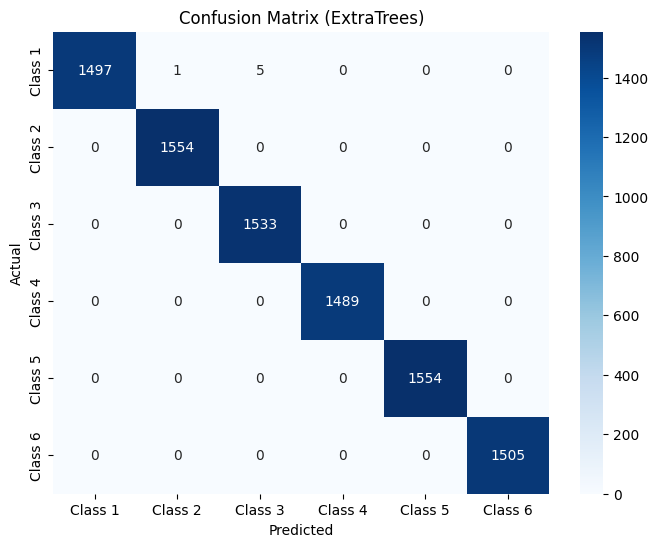

In [176]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
plt.title('Confusion Matrix (ExtraTrees)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [178]:
# Calculate ROC-AUC score for binary classification
y_probs_et = best_et.predict_proba(x_test)

roc_auc_scores_et = []

# Iterate over each class
for i in range(y_probs_et.shape[1]):
    # Extract the true labels for the current class
    true_labels_class_i = (y_test == i).astype(int)

    # Extract the predicted probabilities for the current class
    predicted_probs_class_i = y_probs_et[:, i]

    # Calculate ROC-AUC score for the current class
    roc_auc_class_i = roc_auc_score(true_labels_class_i, predicted_probs_class_i)

    # Append the ROC-AUC score to the list
    roc_auc_scores_et.append(roc_auc_class_i)

# Print ROC-AUC scores for each class
for i, auc_score in enumerate(roc_auc_scores_et):
    print(f"ROC-AUC Score (Class {i}): {auc_score}")

# Calculate the average ROC-AUC score
average_roc_auc_et = np.mean(roc_auc_scores_et)
print("Average ROC-AUC Score (ExtraTrees):", average_roc_auc_et)

ROC-AUC Score (Class 0): 0.9999945971405801
ROC-AUC Score (Class 1): 0.9999997454506948
ROC-AUC Score (Class 2): 0.9999967405657606
ROC-AUC Score (Class 3): 1.0
ROC-AUC Score (Class 4): 1.0
ROC-AUC Score (Class 5): 1.0
Average ROC-AUC Score (ExtraTrees): 0.9999985138595059


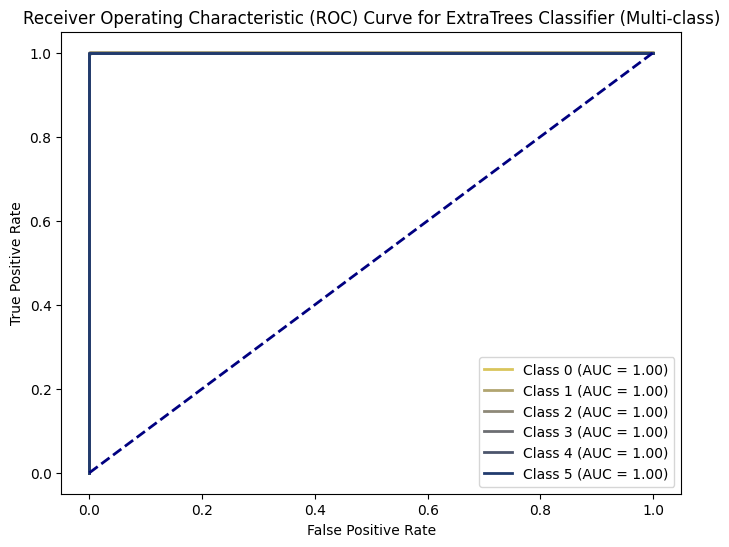

In [179]:
# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC-AUC scores for each class
roc_auc_scores = []
for i in range(len(np.unique(y_test))):
    roc_auc_scores.append(roc_auc_score(y_test_bin[:, i], y_probs_et[:, i]))

# Plot ROC Curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_et[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ExtraTrees Classifier (Multi-class)')
plt.legend(loc="lower right")
plt.show()

In [182]:

# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid_rf,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_rf.fit(x_train, y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params_rf)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print("Best Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-Score (Random Forest):", f1_rf)
print("Classification Report (Random Forest):\n", classification_report_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Best Accuracy (Random Forest): 0.9989056686364631
Precision (Random Forest): 0.9989063551985957
Recall (Random Forest): 0.9989056686364631
F1-Score (Random Forest): 0.9989053555986229
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1549
           2       1.00      1.00      1.00      1536
           3       1.00      1.00      1.00      1561
           4       1.00      1.00      1.00      1547
           5       1.00      1.00      1.00      1459

    accuracy                           1.00      9138
   macro avg       1.00      1.00      1.00      9138
weighted avg       1.00      1.00      1.00      9138

Confusion Matrix (Random Forest):
 [[1479    1    6    0    0    0]
 [   0 1549    0    0    0    0]
 [   2    0 1533    0    0    1]
 [   0    0    0 1561    0    0]
 [   0    0    0    0 1547    0]
 [   0    0    0    0    0 1459]]

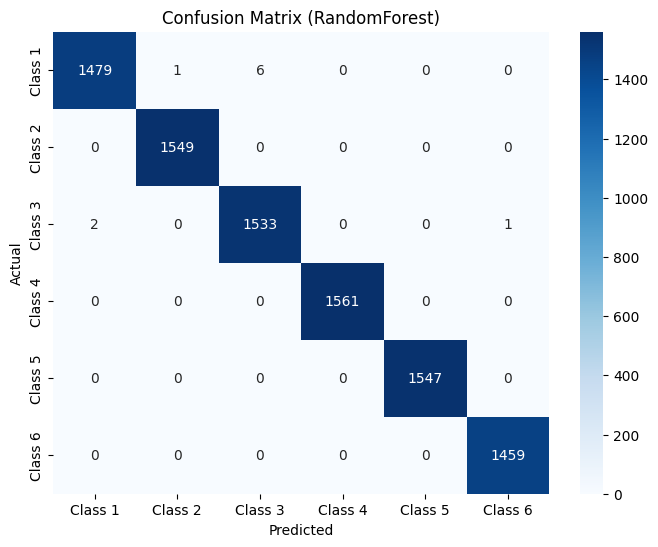

In [183]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
plt.title('Confusion Matrix (RandomForest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [184]:
# Calculate ROC-AUC score for binary classification (Random Forest)
y_probs_rf = best_rf.predict_proba(x_test)

roc_auc_scores_rf = []

# Iterate over each class
for i in range(y_probs_rf.shape[1]):
    # Extract the true labels for the current class
    true_labels_class_i = (y_test == i).astype(int)

    # Extract the predicted probabilities for the current class
    predicted_probs_class_i = y_probs_rf[:, i]

    # Calculate ROC-AUC score for the current class
    roc_auc_class_i = roc_auc_score(true_labels_class_i, predicted_probs_class_i)

    # Append the ROC-AUC score to the list
    roc_auc_scores_rf.append(roc_auc_class_i)

# Print ROC-AUC scores for each class
for i, auc_score in enumerate(roc_auc_scores_rf):
    print(f"ROC-AUC Score (Class {i}): {auc_score}")

# Calculate the average ROC-AUC score
average_roc_auc_rf = np.mean(roc_auc_scores_rf)
print("Average ROC-AUC Score (Random Forest):", average_roc_auc_rf)

ROC-AUC Score (Class 0): 0.9999910736837069
ROC-AUC Score (Class 1): 1.0
ROC-AUC Score (Class 2): 0.9999868113106201
ROC-AUC Score (Class 3): 1.0
ROC-AUC Score (Class 4): 1.0
ROC-AUC Score (Class 5): 1.0
Average ROC-AUC Score (Random Forest): 0.9999963141657212


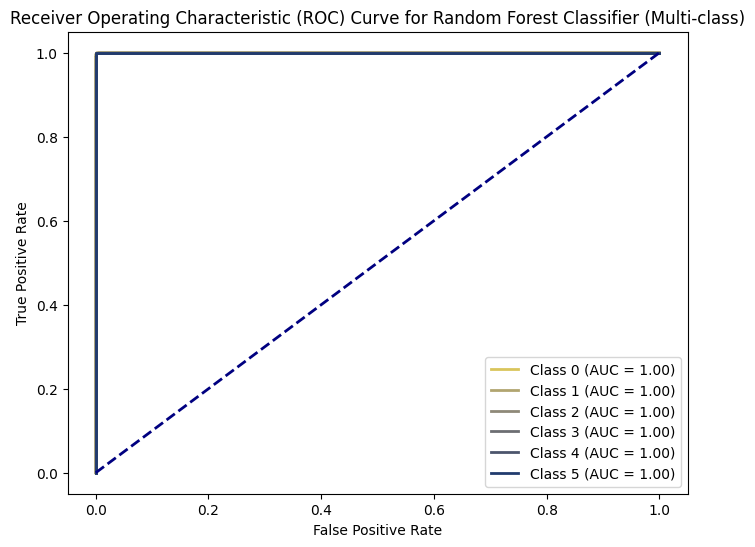

In [185]:
# Binarize the labels for multi-class ROC-AUC (Random Forest)
y_test_bin_rf = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC-AUC scores for each class (Random Forest)
roc_auc_scores_rf = []
for i in range(len(np.unique(y_test))):
    roc_auc_scores_rf.append(roc_auc_score(y_test_bin_rf[:, i], y_probs_rf[:, i]))

# Plot ROC Curves for each class (Random Forest)
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin_rf[:, i], y_probs_rf[:, i])
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Class {i} (AUC = {roc_auc_scores_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier (Multi-class)')
plt.legend(loc="lower right")
plt.show()

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Conclusion</b>
 </div>


**Based on the provided metrics after hyperparameter tuning:**

**ExtraTrees Classifier:**

**Best Accuracy:** 0.9993

**Precision:** 0.9993

**Recall:** 0.9993

**F1-Score:** 0.9993

**Random Forest Classifier:**

**Best Accuracy:** 0.9989

**Precision:** 0.9989

**Recall:** 0.9989

**F1-Score:** 0.9989

**Comparison:**

**ExtraTrees:**

Slightly higher accuracy, precision, recall, and F1-Score compared to Random Forest after hyperparameter tuning.

**Random Forest:**

Very high accuracy, precision, recall, and F1-Score, but slightly lower than ExtraTrees after hyperparameter tuning.

**Conclusion:**

Both models, ExtraTrees and Random Forest, exhibit extremely high performance, and the differences in the metrics are minimal. However, based on the resultant data, the ExtraTrees Classifier appears to have slightly higher values for accuracy, precision, recall, and F1-Score after hyperparameter tuning.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Saving the best model</b>
 </div>

In [186]:
 #Save the model using joblib
filename = 'shoe_original_price_model_1.joblib'
joblib.dump(best_et, filename)

# Load the model using joblib
loaded_model = joblib.load(filename)

# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)
predictions

array([3, 2, 1, ..., 5, 1, 1])

In [188]:
# Check predicted and original values
y_true = np.array(y_test)
y_pred = best_et.predict(x_test)

Global_Power_Plant = pd.DataFrame({'Original': y_true, 'Predicted': y_pred})
print(Global_Power_Plant)

accuracy = (Global_Power_Plant['Original'] == Global_Power_Plant['Predicted']).mean() * 100

print(f"Accuracy: {accuracy:.2f}%")

      Original  Predicted
0            3          3
1            2          2
2            1          1
3            1          1
4            2          2
...        ...        ...
9133         4          4
9134         4          4
9135         5          5
9136         1          1
9137         1          1

[9138 rows x 2 columns]
Accuracy: 99.99%
